# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



# **General  methods and tools**

In [ ]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
#colors:
#pastels: colors = ["#DDA0DD", "#90EE90", "#FFB6C1", "#ADD8E6"]
#Gender color palette: ['skyblue', '#FC8EAC']

#For printing headers
def print_header(heading, border_char="=", width=100):
    black = "\033[30m"
    bold = "\033[1m"
    reset = "\033[0m"

    print()
    print(border_char * width)
    print(f"{bold}{black}{heading.center(width)}{reset}")
    print(border_char * width)

#For subheaders
def print_dashed_heading(heading, border_char="=", text_color="\033[30m", border_color="\033[35m"):
    print()
    border = border_color + border_char * (len(heading) + 25) + "\033[0m"
    print(border)
    print(f"{border_color}{text_color}      {heading} \033[0m{border_color}\033[0m")
    print(border)


#For results
def print_heading_3(heading, text_color="\033[35m", border_char="-"):
    print(f"{text_color}{heading}\033[0m")  # Print the heading in dark blue
    print(border_char * len(heading))  # Dash line just below the heading



# Load data

In [ ]:
#Load all data
try:
    patients = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/patients.csv")
    vitals = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/vitals.csv")
    drugs = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/drugs.csv")
    hospitals = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/hospitals.csv")
    hospital_patient = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/hospital_patient.csv")
    medical_tests = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/medical_tests.csv")
    medical_parameters = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/medical_parameters.csv")
    allergies = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/allergies.csv")
    drug_records = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/drug_records.csv")
    drug_patient = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/drug_patient.csv")
    medical_results = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/medical_results.csv")
    surgeries = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/surgeries.csv")
    users = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/users.csv")
    devices = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/devices.csv")
    doctors = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/doctors.csv")
    doctor_hospital = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/doctor_hospital.csv")
    appointments = pd.read_csv("/content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data/appointments.csv")
except Exception as e:
    print(e)
else:
  print_header("Data Loaded Successfully")


                                      Data Loaded Successfully                                      


# **Randomize the values in the Dataset**

In [ ]:
#!/usr/bin/env python3
"""
Enhanced Synthetic Medical Data Generator for Training Enhancement - Google Colab Version
- Expands existing medical CSVs with realistic synthetic records
- Now generates surgeries and medical tests with doctor assignments
- Increased generation for existing categories
- Preserves relationships between patients, drugs, tests, hospitals, doctors
- Handles drug_patient (ongoing regimens) and drug_records (prescriptions) separately
- Handles missing 'id' columns gracefully
- NEW: Generates 1 row of realistic vitals for each new patient

"""

import os
import math
import random
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from typing import List, Dict
import uuid

# Configuration
SEED = 42
SCALE_PATIENTS = 25.0
SCALE_TESTS = 9.0
SCALE_DRUG_PATIENT = 8.0 # Ongoing medication regimens
SCALE_DRUG_RECORDS = 100.0 # Prescription/administration events
SCALE_SURGERIES = 15.0
SCALE_APPOINTMENTS = 55.0
SCALE_HOSPITAL_PATIENTS = 53.0
MIN_DOCTORS = 18  # Minimum number of doctors to generate

# Google Drive paths
BASE_DIR = '/content/drive/MyDrive/Xpertnurse Project'
CSV_DIR = os.path.join(BASE_DIR, 'csv_files')
SYNTHETIC_DIR = os.path.join(BASE_DIR, 'synthetic_medical_data')

random.seed(SEED)
np.random.seed(SEED)

# Medical data generators
FIRST_NAMES_M = ['Ahmad', 'Mohammad', 'Ali', 'Omar', 'Khalil', 'Hassan', 'Ibrahim', 'Yusuf', 'Mahmoud', 'Samir', 'Fadi', 'Nabil', 'Rami', 'Tarek', 'Marwan']
FIRST_NAMES_F = ['Fatima', 'Aisha', 'Maryam', 'Khadija', 'Zaynab', 'Hiba', 'Lana', 'Reem', 'Nour', 'Sara', 'Dina', 'Maya', 'Rana', 'Layla', 'Yasmin']
LAST_NAMES = ['Ahmad', 'Mahmoud', 'Hassan', 'Ali', 'Mohammad', 'Khalil', 'Yusuf', 'Omar', 'Fleifel', 'Itani', 'Marwani', 'Issa', 'Nabulsi', 'Hammoud', 'Badran']

# Surgery types by specialty
SURGERY_TYPES = {
    'Cardiology': [
        ('Pacemaker Implantation', 'Implantation of permanent cardiac pacemaker for bradycardia or heart block.'),
        ('Coronary Angioplasty', 'Percutaneous coronary intervention with balloon catheter and stent placement.'),
        ('Cardiac Catheterization', 'Diagnostic procedure to evaluate coronary arteries and heart function.'),
        ('ICD Implantation', 'Implantable cardioverter-defibrillator placement for arrhythmia prevention.')
    ],
    'Cardiac Surgery': [
        ('Coronary Artery Bypass Grafting', 'Surgical bypass of blocked coronary arteries using vein grafts.'),
        ('Heart Valve Replacement', 'Surgical replacement of damaged heart valve with prosthetic valve.'),
        ('Aortic Aneurysm Repair', 'Surgical repair of enlarged aortic vessel to prevent rupture.'),
        ('Mitral Valve Repair', 'Surgical correction of mitral valve regurgitation or stenosis.')
    ],
    'General Surgery': [
        ('Laparoscopic Cholecystectomy', 'Minimally invasive removal of gallbladder due to gallstones.'),
        ('Appendectomy', 'Surgical removal of inflamed appendix to prevent rupture.'),
        ('Hernia Repair', 'Surgical correction of abdominal wall hernia with mesh reinforcement.'),
        ('Thyroidectomy', 'Surgical removal of thyroid gland due to cancer or hyperthyroidism.'),
        ('Colon Resection', 'Surgical removal of diseased portion of large intestine.'),
        ('Gastric Sleeve', 'Bariatric surgery for weight loss by reducing stomach size.')
    ],
    'Endocrinology': [
        ('Thyroid Biopsy', 'Needle biopsy of thyroid nodules for cancer screening.'),
        ('Insulin Pump Insertion', 'Subcutaneous placement of continuous insulin delivery system.')
    ],
    'Internal Medicine': [
        ('Endoscopy', 'Upper gastrointestinal endoscopic examination and biopsy.'),
        ('Colonoscopy', 'Lower gastrointestinal endoscopic screening and polyp removal.'),
        ('Bone Marrow Biopsy', 'Diagnostic procedure for blood disorders and malignancies.')
    ],
    'Orthopedics': [
        ('Knee Replacement', 'Total knee joint replacement for severe arthritis.'),
        ('Hip Replacement', 'Total hip joint replacement surgery.'),
        ('Fracture Repair', 'Surgical fixation of bone fractures with plates and screws.'),
        ('Arthroscopy', 'Minimally invasive joint surgery using arthroscope.')
    ],
    'Neurology': [
        ('Brain Biopsy', 'Stereotactic brain tissue biopsy for diagnosis.'),
        ('Deep Brain Stimulation', 'Implantation of DBS device for movement disorders.')
    ],
    'Ophthalmology': [
        ('Cataract Surgery', 'Surgical removal of clouded lens from the eye.'),
        ('Retinal Surgery', 'Surgical repair of retinal detachment.')
    ],
    'Dermatology': [
        ('Skin Biopsy', 'Surgical removal of skin lesion for pathological examination.'),
        ('Mohs Surgery', 'Precise surgical removal of skin cancer.')
    ],
    'Urology': [
        ('Prostatectomy', 'Surgical removal of prostate gland.'),
        ('Kidney Stone Removal', 'Surgical extraction of kidney stones.')
    ]
}

def safe_get_max_id(df: pd.DataFrame, id_column: str = 'id') -> int:
    """Safely get maximum ID from DataFrame, handling missing columns"""
    if len(df) == 0 or id_column not in df.columns:
        return 0
    try:
        return df[id_column].max()
    except:
        return 0

def safe_get_ids(df: pd.DataFrame, id_column: str = 'id') -> List[int]:
    """Safely get list of IDs from DataFrame"""
    if len(df) == 0 or id_column not in df.columns:
        return [1]  # Default fallback
    try:
        ids = df[id_column].tolist()
        return ids if ids else [1]
    except:
        return [1]

def generate_realistic_vitals():
    """Generate realistic vital signs mimicking hospital scenarios"""
    # Determine patient condition (70% normal, 20% mild, 10% concerning)
    condition = random.choices(['normal', 'mild', 'concerning'], weights=[70, 20, 10])[0]

    if condition == 'normal':
        # Normal vitals
        temperature = round(random.uniform(36.1, 37.2), 1)
        systolic = random.randint(110, 135)
        diastolic = random.randint(60, 85)
        heartbeat = random.randint(60, 90)
        oxygen = random.randint(95, 100)
        glucose = random.randint(80, 140)

    elif condition == 'mild':
        # Mild abnormalities
        temperature = round(random.choice([
            random.uniform(35.5, 36.0),  # Mild hypothermia
            random.uniform(37.3, 38.2)   # Mild fever
        ]), 1)
        systolic = random.choice([
            random.randint(90, 109),      # Mild low
            random.randint(136, 159)      # Mild high
        ])
        diastolic = random.choice([
            random.randint(50, 59),       # Mild low
            random.randint(86, 99)        # Mild high
        ])
        heartbeat = random.choice([
            random.randint(50, 59),       # Mild bradycardia
            random.randint(91, 110)       # Mild tachycardia
        ])
        oxygen = random.randint(90, 94)   # Mild hypoxemia
        glucose = random.choice([
            random.randint(60, 79),       # Mild hypoglycemia
            random.randint(141, 180)      # Mild hyperglycemia
        ])

    else:  # concerning
        # Concerning vitals
        temperature = round(random.choice([
            random.uniform(34.0, 35.4),  # Hypothermia
            random.uniform(38.3, 40.5)   # High fever
        ]), 1)
        systolic = random.choice([
            random.randint(70, 89),       # Hypotension
            random.randint(160, 200)      # Hypertension
        ])
        diastolic = random.choice([
            random.randint(40, 49),       # Low diastolic
            random.randint(100, 120)      # High diastolic
        ])
        heartbeat = random.choice([
            random.randint(35, 49),       # Bradycardia
            random.randint(111, 150)      # Tachycardia
        ])
        oxygen = random.randint(75, 89)   # Hypoxemia
        glucose = random.choice([
            random.randint(40, 59),       # Hypoglycemia
            random.randint(181, 300)      # Hyperglycemia
        ])

    pressure = f"{systolic}/{diastolic}"

    return {
        'temperature': temperature,
        'pressure': pressure,
        'heartbeat': heartbeat,
        'oxygen': oxygen,
        'glucose': glucose
    }

def check_synthetic_data_exists():
    """Check if synthetic data already exists"""
    if not os.path.exists(SYNTHETIC_DIR):
        return False

    # Check if key files exist
    key_files = ['patients.csv', 'medical_tests.csv', 'drug_patient.csv']
    for file in key_files:
        if not os.path.exists(os.path.join(SYNTHETIC_DIR, file)):
            return False

    return True

def read_original_csvs():
    """Read original CSV files from csv_files directory"""
    files = {
        'patients': 'patients.csv',
        'users': 'users.csv',
        'drugs': 'drugs.csv',
        'drug_patient': 'drug_patient.csv',
        'drug_records': 'drug_records.csv',
        'medical_tests': 'medical_tests.csv',
        'medical_results': 'medical_results.csv',
        'medical_parameters': 'medical_parameters.csv',
        'hospitals': 'hospitals.csv',
        'hospital_patient': 'hospital_patient.csv',
        'surgeries': 'surgeries.csv',
        'devices': 'devices.csv',
        'allergies': 'allergies.csv',
        'vitals': 'vitals.csv',
        'doctors': 'doctors.csv',
        'doctor_hospital': 'doctor_hospital.csv',
        'appointments': 'appointments.csv'
    }

    dfs = {}
    for k, fname in files.items():
        file_path = os.path.join(CSV_DIR, fname)
        if os.path.exists(file_path):
            try:
                dfs[k] = pd.read_csv(file_path)
                print(f"Loaded {fname}: {len(dfs[k])} rows")
                # Debug: show columns for problematic files
                if k in ['patients', 'medical_tests', 'doctors', 'appointments']:
                    print(f"  Columns: {list(dfs[k].columns)}")
            except Exception as e:
                print(f"Error loading {fname}: {e}")
                dfs[k] = pd.DataFrame()
        else:
            print(f"File {fname} not found, creating empty DataFrame...")
            dfs[k] = pd.DataFrame()
    return dfs

def generate_doctors(doctors: pd.DataFrame, target_count: int) -> pd.DataFrame:
    """Generate synthetic doctors with realistic specialties"""
    if target_count <= len(doctors):
        return doctors.copy()

    new_doctors = [doctors] if len(doctors) > 0 else []
    next_id = safe_get_max_id(doctors, 'id') + 1
    needed = target_count - len(doctors)

    print(f"Generating {needed} new doctors (starting ID: {next_id})...")

    # Doctor specialties (expanded list)
    specialties = [
        'Cardiology', 'Endocrinology', 'General Surgery', 'Internal Medicine',
        'Cardiac Surgery', 'Orthopedics', 'Neurology', 'Ophthalmology',
        'Dermatology', 'Urology', 'Pediatrics', 'Radiology'
    ]

    for i in range(needed):
        # Random gender and name
        gender = random.choice(['M', 'F'])
        if gender == 'M':
            first_name = random.choice(FIRST_NAMES_M)
        else:
            first_name = random.choice(FIRST_NAMES_F)
        last_name = random.choice(LAST_NAMES)

        # Random DOB (age 35-65 for doctors)
        age = random.randint(35, 65)
        birth_year = datetime.now().year - age
        dob = datetime(birth_year, random.randint(1, 12), random.randint(1, 28))

        # Specialty and experience
        specialty = random.choice(specialties)
        years_experience = min(age - 30, random.randint(5, 30))  # Realistic experience

        # Registration date (last 5 years)
        created = datetime.now() - timedelta(days=random.randint(0, 1825))

        doctor = {
            'id': next_id,
            'first_name': first_name,
            'last_name': last_name,
            'dob': dob.strftime('%Y-%m-%d'),
            'gender': gender,
            'specialty': specialty,
            'years_of_experience': years_experience,
            'created_at': created.strftime('%Y-%m-%d %H:%M:%S'),
            'updated_at': created.strftime('%Y-%m-%d %H:%M:%S')
        }

        new_doctors.append(pd.DataFrame([doctor]))
        next_id += 1

    return pd.concat(new_doctors, ignore_index=True) if new_doctors else pd.DataFrame()

def generate_doctor_hospital_relationships(doctor_hospital: pd.DataFrame, doctors: pd.DataFrame, hospitals: pd.DataFrame) -> pd.DataFrame:
    """Generate realistic doctor-hospital relationships for new doctors"""
    new_relationships = [doctor_hospital] if len(doctor_hospital) > 0 else []
    next_id = safe_get_max_id(doctor_hospital, 'id') + 1

    # Get existing relationships
    existing_relationships = set()
    if len(doctor_hospital) > 0 and 'doctor_id' in doctor_hospital.columns and 'hospital_id' in doctor_hospital.columns:
        for _, row in doctor_hospital.iterrows():
            existing_relationships.add((row['doctor_id'], row['hospital_id']))

    # Get doctor and hospital IDs
    doctor_ids = safe_get_ids(doctors, 'id')
    hospital_ids = safe_get_ids(hospitals, 'id')

    new_relations_count = 0

    print(f"Generating doctor-hospital relationships...")

    for doctor_id in doctor_ids:
        # Each doctor should work at 1-3 hospitals
        num_hospitals = random.randint(1, min(3, len(hospital_ids)))
        assigned_hospitals = random.sample(hospital_ids, num_hospitals)

        for hospital_id in assigned_hospitals:
            if (doctor_id, hospital_id) not in existing_relationships:
                created_date = datetime.now() - timedelta(days=random.randint(0, 1095))

                relationship = {
                    'id': next_id,
                    'doctor_id': doctor_id,
                    'hospital_id': hospital_id,
                    'created_at': created_date.strftime('%Y-%m-%d %H:%M:%S'),
                    'updated_at': created_date.strftime('%Y-%m-%d %H:%M:%S')
                }

                new_relationships.append(pd.DataFrame([relationship]))
                existing_relationships.add((doctor_id, hospital_id))
                next_id += 1
                new_relations_count += 1

    print(f"Generated {new_relations_count} new doctor-hospital relationships")
    return pd.concat(new_relationships, ignore_index=True) if new_relationships else pd.DataFrame()

def generate_patients(patients: pd.DataFrame, target_count: int) -> pd.DataFrame:
    """Generate synthetic patients"""
    if target_count <= len(patients):
        return patients.copy()

    new_patients = [patients] if len(patients) > 0 else []
    next_id = safe_get_max_id(patients, 'id') + 1
    needed = target_count - len(patients)

    print(f"Generating {needed} new patients (starting ID: {next_id})...")

    for i in range(needed):
        # Random gender and name
        gender = random.choice(['M', 'F'])
        if gender == 'M':
            first_name = random.choice(FIRST_NAMES_M)
        else:
            first_name = random.choice(FIRST_NAMES_F)
        last_name = random.choice(LAST_NAMES)

        # Random DOB (age 20-85)
        age = random.randint(20, 85)
        birth_year = datetime.now().year - age
        dob = datetime(birth_year, random.randint(1, 12), random.randint(1, 28))

        # Medical record number
        mrn = f"{random.randint(100000000, 999900000)}"

        # Location (Lebanon coordinates)
        lat = round(random.uniform(33.0, 34.7), 6)
        lng = round(random.uniform(35.1, 36.6), 6)

        # Registration date (last 3 years)
        created = datetime.now() - timedelta(days=random.randint(0, 1095))

        patient = {
            'id': next_id,
            'first_name': first_name,
            'last_name': last_name,
            'dob': dob.strftime('%Y-%m-%d'),
            'gender': gender,
            'medical_record_number': mrn,
            'created_at': created.strftime('%Y-%m-%d %H:%M:%S'),
            'updated_at': created.strftime('%Y-%m-%d %H:%M:%S'),
            'latitude': lat,
            'longitude': lng
        }

        new_patients.append(pd.DataFrame([patient]))
        next_id += 1

    return pd.concat(new_patients, ignore_index=True) if new_patients else pd.DataFrame()

def generate_vitals_for_patients(vitals: pd.DataFrame, patients: pd.DataFrame, users: pd.DataFrame, original_patient_count: int) -> pd.DataFrame:
    """Generate 1 row of realistic vitals for each new patient"""
    # Only generate vitals for NEW patients
    total_patients = len(patients)
    if total_patients <= original_patient_count:
        return vitals.copy()

    new_vitals = [vitals] if len(vitals) > 0 else []
    next_id = safe_get_max_id(vitals, 'id') + 1

    # Get user_id (use first available user, or 1 as fallback)
    user_ids = safe_get_ids(users, 'id')
    default_user_id = user_ids[0] if user_ids else 1

    # Get NEW patient IDs only (those beyond original count)
    patient_ids = safe_get_ids(patients, 'id')
    # Assume patients are ordered by ID, so take the last (total - original) patients
    new_patient_ids = patient_ids[original_patient_count:] if len(patient_ids) > original_patient_count else []

    if not new_patient_ids:
        return vitals.copy()

    print(f"Generating vitals for {len(new_patient_ids)} new patients (starting ID: {next_id})...")

    for patient_id in new_patient_ids:
        # Generate realistic vitals
        vital_signs = generate_realistic_vitals()

        # Vital signs date (recent, within last 30 days)
        vitals_date = datetime.now() - timedelta(days=random.randint(0, 30))

        vital_record = {
            'id': next_id,
            'patient_id': patient_id,
            'user_id': default_user_id,
            'temperature': vital_signs['temperature'],
            'pressure': vital_signs['pressure'],
            'heartbeat': vital_signs['heartbeat'],
            'oxygen': vital_signs['oxygen'],
            'glucose': vital_signs['glucose'],
            'created_at': vitals_date.strftime('%Y-%m-%d %H:%M:%S'),
            'updated_at': vitals_date.strftime('%Y-%m-%d %H:%M:%S'),
            'notes': ''  # Empty notes as requested
        }

        new_vitals.append(pd.DataFrame([vital_record]))
        next_id += 1

    return pd.concat(new_vitals, ignore_index=True) if new_vitals else pd.DataFrame()

def generate_medical_tests(tests: pd.DataFrame, patients: pd.DataFrame, doctors: pd.DataFrame, target_count: int) -> pd.DataFrame:
    """Generate synthetic medical tests with doctor assignments"""
    if target_count <= len(tests):
        return tests.copy()

    new_tests = [tests] if len(tests) > 0 else []
    next_id = safe_get_max_id(tests, 'id') + 1
    patient_ids = safe_get_ids(patients, 'id')
    doctor_ids = safe_get_ids(doctors, 'id')
    needed = target_count - len(tests)

    print(f"Generating {needed} new medical tests (starting ID: {next_id})...")

    test_types = [
        "Routine Blood Work", "Complete Blood Count", "Lipid Panel",
        "Liver Function Test", "Kidney Function Test", "Thyroid Panel",
        "Diabetes Screening", "Cardiac Markers", "Urine Analysis",
        "Vitamin D Test", "B12 Levels", "Iron Studies", "HbA1c Test",
        "Cholesterol Panel", "Electrolyte Panel", "Troponin Test",
        "PSA Test", "CA-125 Test", "Inflammatory Markers"
    ]

    for i in range(needed):
        patient_id = random.choice(patient_ids)
        doctor_id = random.choice(doctor_ids) if len(doctors) > 0 else None
        test_name = f"{random.choice(test_types)} {datetime.now().strftime('%B %Y')}"

        # Test date (last 2 years)
        test_date = datetime.now() - timedelta(days=random.randint(0, 730))

        # Generate PDF filename
        pdf_name = f"pdfs/{uuid.uuid4().hex[:32]}.pdf"

        test = {
            'id': next_id,
            'patient_id': patient_id,
            'test_name': test_name,
            'doctor_id': doctor_id,
            'created_at': test_date.strftime('%Y-%m-%d %H:%M:%S'),
            'updated_at': test_date.strftime('%Y-%m-%d %H:%M:%S'),
            'pdf': pdf_name
        }

        new_tests.append(pd.DataFrame([test]))
        next_id += 1

    return pd.concat(new_tests, ignore_index=True) if new_tests else pd.DataFrame()

def generate_surgeries(surgeries: pd.DataFrame, patients: pd.DataFrame, doctors: pd.DataFrame, hospitals: pd.DataFrame, doctor_hospital: pd.DataFrame, target_count: int) -> pd.DataFrame:
    """Generate synthetic surgeries with realistic procedures - ENSURES doctors work at surgery hospitals"""
    if target_count <= len(surgeries):
        return surgeries.copy()

    new_surgeries = [surgeries] if len(surgeries) > 0 else []
    next_id = safe_get_max_id(surgeries, 'id') + 1
    patient_ids = safe_get_ids(patients, 'id')
    needed = target_count - len(surgeries)

    print(f"Generating {needed} new surgeries (starting ID: {next_id})...")

    # Create doctor-hospital mapping from doctor_hospital relationships
    doctor_hospitals_map = {}
    if len(doctor_hospital) > 0 and 'doctor_id' in doctor_hospital.columns and 'hospital_id' in doctor_hospital.columns:
        for _, row in doctor_hospital.iterrows():
            doctor_id = row['doctor_id']
            hospital_id = row['hospital_id']
            if doctor_id not in doctor_hospitals_map:
                doctor_hospitals_map[doctor_id] = []
            doctor_hospitals_map[doctor_id].append(hospital_id)

    # Create doctor specialty mapping
    doctor_specialties = {}
    if len(doctors) > 0 and 'specialty' in doctors.columns:
        for _, doctor in doctors.iterrows():
            doctor_id = doctor.get('id')
            specialty = doctor.get('specialty', 'General Surgery')
            if specialty not in doctor_specialties:
                doctor_specialties[specialty] = []
            doctor_specialties[specialty].append(doctor_id)

    # Fallback if no relationships exist
    if not doctor_hospitals_map:
        print("Warning: No doctor-hospital relationships found. Creating basic assignments...")
        hospital_ids = safe_get_ids(hospitals, 'id')
        doctor_ids = safe_get_ids(doctors, 'id')
        for doctor_id in doctor_ids:
            doctor_hospitals_map[doctor_id] = hospital_ids  # Allow all hospitals

    for i in range(needed):
        patient_id = random.choice(patient_ids)

        # Choose surgery type and corresponding doctor
        specialty = random.choice(list(SURGERY_TYPES.keys()))

        # Find doctors with this specialty
        available_doctors = doctor_specialties.get(specialty, [])
        if not available_doctors:
            # Fallback to any doctor
            available_doctors = list(doctor_hospitals_map.keys()) if doctor_hospitals_map else safe_get_ids(doctors, 'id')

        if not available_doctors:
            continue

        doctor_id = random.choice(available_doctors)

        # Get hospitals where this doctor works
        doctor_hospitals = doctor_hospitals_map.get(doctor_id, safe_get_ids(hospitals, 'id'))
        if not doctor_hospitals:
            continue

        hospital_id = random.choice(doctor_hospitals)

        # Select procedure from specialty
        procedure_name, description = random.choice(SURGERY_TYPES[specialty])

        # Surgery date (last 3 years, weighted toward recent)
        days_ago = random.choices(
            range(0, 1095),
            weights=[3 if i < 365 else 2 if i < 730 else 1 for i in range(1095)]
        )[0]
        surgery_date = datetime.now() - timedelta(days=days_ago)

        surgery = {
            'id': next_id,
            'patient_id': patient_id,
            'hospital_patient_id': hospital_id,  # This should reference hospital, not hospital_patient
            'procedure_name': procedure_name,
            'description': description,
            'doctor_id': doctor_id,
            'path': '',
            'created_at': surgery_date.strftime('%Y-%m-%d %H:%M:%S'),
            'updated_at': surgery_date.strftime('%Y-%m-%d %H:%M:%S')
        }

        new_surgeries.append(pd.DataFrame([surgery]))
        next_id += 1

    return pd.concat(new_surgeries, ignore_index=True) if new_surgeries else pd.DataFrame()

def generate_appointments(appointments: pd.DataFrame, patients: pd.DataFrame, doctors: pd.DataFrame, target_count: int) -> pd.DataFrame:
    """Generate synthetic appointments"""
    if target_count <= len(appointments):
        return appointments.copy()

    new_appointments = [appointments] if len(appointments) > 0 else []
    next_id = safe_get_max_id(appointments, 'id') + 1 # Use safe_get_max_id here
    patient_ids = safe_get_ids(patients, 'id') # Use safe_get_ids here
    doctor_ids = safe_get_ids(doctors, 'id') # Use safe_get_ids here
    needed = target_count - len(appointments)

    print(f"Generating {needed} new appointments (starting ID: {next_id})...")

    for i in range(needed):
        patient_id = random.choice(patient_ids)
        doctor_id = random.choice(doctor_ids)

        # Appointment date (next 3 months, 80% future, 20% past)
        if random.random() < 0.8:
            # Future appointments
            appt_date = datetime.now() + timedelta(days=random.randint(1, 90))
        else:
            # Past appointments
            appt_date = datetime.now() - timedelta(days=random.randint(1, 30))

        # Working hours appointments (8 AM to 5 PM)
        hour = random.randint(8, 17)
        minute = random.choice([0, 15, 30, 45])
        appt_datetime = appt_date.replace(hour=hour, minute=minute)

        created_date = datetime.now() - timedelta(days=random.randint(0, 30))

        appointment = {
            'id': next_id,
            'patient_id': patient_id,
            'doctor_id': doctor_id,
            'appointment_datetime': appt_datetime.strftime('%Y-%m-%d %H:%M:%S'),
            'created_at': created_date.strftime('%Y-%m-%d %H:%M:%S'),
            'updated_at': created_date.strftime('%Y-%m-%d %H:%M:%S')
        }

        new_appointments.append(pd.DataFrame([appointment]))
        next_id += 1

    return pd.concat(new_appointments, ignore_index=True) if new_appointments else pd.DataFrame()

def generate_hospital_patients(hospital_patient: pd.DataFrame, patients: pd.DataFrame, hospitals: pd.DataFrame, target_count: int) -> pd.DataFrame:
    """Generate synthetic hospital patient records - ensures each patient has 1-3 admissions"""
    new_hospital_patients = [hospital_patient] if len(hospital_patient) > 0 else []
    next_id = safe_get_max_id(hospital_patient, 'id') + 1
    patient_ids = safe_get_ids(patients, 'id')
    hospital_ids = safe_get_ids(hospitals, 'id')

    # Track which patients already have admissions
    existing_patients = set()
    if len(hospital_patient) > 0 and 'patient_id' in hospital_patient.columns:
        existing_patients = set(hospital_patient['patient_id'].unique())

    # Find patients without admissions
    patients_without_admissions = [pid for pid in patient_ids if pid not in existing_patients]

    print(f"Ensuring all {len(patients_without_admissions)} new patients have 1-3 hospital admissions...")

    # Common admission reasons/notes
    admission_notes = [
        "Routine checkup and monitoring",
        "Emergency admission - chest pain evaluation",
        "Scheduled surgical procedure",
        "Post-operative follow-up and recovery",
        "Cardiac monitoring and treatment",
        "Respiratory complications management",
        "Diabetes management and stabilization",
        "Hypertension treatment and monitoring",
        "Pre-surgical evaluation and preparation",
        "Emergency department admission",
        "Cardiac catheterization procedure",
        "Endoscopic examination",
        "Laboratory workup and assessment",
        "Pain management consultation",
        "Medication adjustment and monitoring",
        "Wound care and dressing change",
        "Physical therapy evaluation",
        "Nutritional counseling session",
        "Discharge planning consultation",
        "Follow-up after recent hospitalization"
    ]

    # STEP 1: Ensure each patient has 1-3 admissions
    for patient_id in patients_without_admissions:
        num_admissions = random.randint(1, 3)  # Each patient gets 1-3 admissions

        for _ in range(num_admissions):
            hospital_id = random.choice(hospital_ids)

            # Admission date (last 2 years, weighted toward recent)
            days_ago = random.choices(
                range(0, 730),
                weights=[3 if i < 180 else 2 if i < 365 else 1 for i in range(730)]
            )[0]
            admission_date = datetime.now() - timedelta(days=days_ago)

            # Generate PDF filename
            pdf_name = f"pdfs/{uuid.uuid4().hex[:32]}.pdf"

            # Random admission note
            notes = random.choice(admission_notes)

            hospital_admission = {
                'id': next_id,
                'hospital_id': hospital_id,
                'patient_id': patient_id,
                'path': pdf_name,
                'notes': notes,
                'created_at': admission_date.strftime('%Y-%m-%d %H:%M:%S'),
                'updated_at': admission_date.strftime('%Y-%m-%d %H:%M:%S')
            }

            new_hospital_patients.append(pd.DataFrame([hospital_admission]))
            next_id += 1

    result_df = pd.concat(new_hospital_patients, ignore_index=True) if new_hospital_patients else pd.DataFrame()
    print(f"Generated {len(result_df) - len(hospital_patient)} new hospital admissions (total: {len(result_df)})")

    return result_df

def generate_medical_results(results: pd.DataFrame, tests: pd.DataFrame, parameters: pd.DataFrame) -> pd.DataFrame:
    """Generate realistic medical results for new tests"""
    if len(tests) == 0 or len(parameters) == 0:
        return results if len(results) > 0 else pd.DataFrame()

    new_results = [results] if len(results) > 0 else []
    next_id = safe_get_max_id(results, 'id') + 1

    # Get existing test IDs vs new ones
    existing_test_ids = set(results['medical_test_id'].unique()) if len(results) > 0 and 'medical_test_id' in results.columns else set()
    test_ids = safe_get_ids(tests, 'id')
    new_test_ids = [tid for tid in test_ids if tid not in existing_test_ids]

    if not new_test_ids:
        return results if len(results) > 0 else pd.DataFrame()

    # Randomly select tests to generate results for
    tests_to_process = random.sample(new_test_ids, min(len(new_test_ids), int(len(new_test_ids) * 0.8)))

    print(f"Generating medical results for {len(tests_to_process)} tests...")

    for test_id in tests_to_process:
        # Random number of parameters per test (5-15)
        num_params = 1
        param_ids = safe_get_ids(parameters, 'id')
        selected_params = random.sample(param_ids, min(num_params, len(param_ids)))

        test_date = datetime.now() - timedelta(days=random.randint(0, 730))

        for param_id in selected_params:
            param_row = parameters[parameters['id'] == param_id].iloc[0] if 'id' in parameters.columns else None

            # Generate realistic values based on parameter ranges
            if param_row is not None and pd.notna(param_row.get('lower_range')) and pd.notna(param_row.get('upper_range')):
                lower = float(param_row['lower_range'])
                upper = float(param_row['upper_range'])

                # 80% normal, 20% abnormal values
                if random.random() < 0.8:
                    value = round(random.uniform(lower, upper), 2)
                else:
                    # Generate abnormal values
                    if random.random() < 0.5:
                        value = round(random.uniform(lower * 0.5, lower * 0.95), 2)  # Below normal
                    else:
                        value = round(random.uniform(upper * 1.05, upper * 1.5), 2)  # Above normal

                value_str = str(value)
            else:
                # For parameters without ranges, use existing patterns or defaults
                if len(results) > 0 and 'medical_parameter_id' in results.columns and 'value' in results.columns:
                    existing_values = results[results['medical_parameter_id'] == param_id]['value'].dropna()
                    if len(existing_values) > 0:
                        value_str = random.choice(existing_values.tolist())
                    else:
                        value_str = random.choice(['Normal', 'Negative', 'Positive', '1-3', '2-4'])
                else:
                    value_str = random.choice(['Normal', 'Negative', 'Positive', '1-3', '2-4'])


            result = {
                'id': next_id,
                'medical_test_id': test_id,
                'medical_parameter_id': param_id,
                'value': value_str,
                'created_at': test_date.strftime('%Y-%m-%d %H:%M:%S'),
                'updated_at': test_date.strftime('%Y-%m-%d %H:%M:%S')
            }

            new_results.append(pd.DataFrame([result]))
            next_id += 1

    return pd.concat(new_results, ignore_index=True) if new_results else pd.DataFrame()

def generate_drug_patient_regimens(drug_patient: pd.DataFrame, patients: pd.DataFrame, drugs: pd.DataFrame, target_count: int) -> pd.DataFrame:
    """Generate synthetic ongoing drug regimens (drug_patient table)"""
    if target_count <= len(drug_patient):
        return drug_patient.copy()

    new_regimens = [drug_patient] if len(drug_patient) > 0 else []
    patient_ids = safe_get_ids(patients, 'id')
    drug_ids = safe_get_ids(drugs, 'id')
    needed = target_count - len(drug_patient)

    print(f"Generating {needed} new ongoing drug regimens...")

    times = ['morning', 'night', 'morning&night', 'afternoon', 'week']
    durations = ['lifetime', 'LifeTime', 'Lifetime', 'Live time']  # Mostly lifetime for ongoing regimens

    for i in range(needed):
        patient_id = random.choice(patient_ids)
        drug_id = random.choice(drug_ids)

        # Regimen details
        order = random.randint(1, 25)
        number = random.choice(['0.5', '1', '2', '3', '4', '5', '16'])
        time_schedule = random.choice(times)
        duration = random.choice(durations)

        # End date calculation - mostly far future for ongoing regimens
        if 'lifetime' in duration.lower() or 'live time' in duration.lower():
            end_date = datetime.now() + timedelta(days=random.randint(3650, 7300))  # 10-20 years
        else:
            end_date = datetime.now() + timedelta(days=365)

        regimen = {
            'drug_id': drug_id,
            'patient_id': patient_id,
            'created_at': '',
            'updated_at': '',
            'order': order,
            'number': number,
            'time': time_schedule,
            'duration': duration,
            'end_of_treatment': end_date.strftime('%Y-%m-%d %H:%M:%S')
        }

        new_regimens.append(pd.DataFrame([regimen]))

    return pd.concat(new_regimens, ignore_index=True) if new_regimens else pd.DataFrame()

def generate_drug_records(drug_records: pd.DataFrame, patients: pd.DataFrame, drugs: pd.DataFrame, target_count: int) -> pd.DataFrame:
    """Generate synthetic prescription/administration records (drug_records table)"""
    if target_count <= len(drug_records):
        return drug_records.copy()

    new_records = [drug_records] if len(drug_records) > 0 else []
    next_id = safe_get_max_id(drug_records, 'id') + 1
    patient_ids = safe_get_ids(patients, 'id')
    drug_ids = safe_get_ids(drugs, 'id')
    needed = target_count - len(drug_records)

    print(f"Generating {needed} new prescription/administration records (starting ID: {next_id})...")

    # Common doses for different types of medications
    dose_options = ['1', '2', '5', '10', '25', '50', '100', '250', '500', '0.5', '1.5', '2.5']

    for i in range(needed):
        patient_id = random.choice(patient_ids)
        drug_id = random.choice(drug_ids)

        # Prescription/administration date (last 2 years, weighted toward recent)
        days_ago = random.choices(
            range(0, 730),
            weights=[3 if i < 180 else 2 if i < 365 else 1 for i in range(730)]
        )[0]
        record_date = datetime.now() - timedelta(days=days_ago)

        # Random dose
        dose = random.choice(dose_options)

        record = {
            'id': next_id,
            'patient_id': patient_id,
            'drug_id': drug_id,
            'dose': dose,
            'notes': '',  # Keep notes empty as requested
            'created_at': record_date.strftime('%Y-%m-%d %H:%M:%S'),
            'updated_at': record_date.strftime('%Y-%m-%d %H:%M:%S')
        }

        new_records.append(pd.DataFrame([record]))
        next_id += 1

    return pd.concat(new_records, ignore_index=True) if new_records else pd.DataFrame()

def generate_synthetic_medical_data():
    """Main function to generate enhanced synthetic medical data"""

    # Check if synthetic data already exists
    if check_synthetic_data_exists():
        print('Synthetic medical data already exists!')
        print(f'   Location: {SYNTHETIC_DIR}')

        # Show existing data stats
        try:
            existing_files = [f for f in os.listdir(SYNTHETIC_DIR) if f.endswith('.csv')]
            print('\nExisting synthetic data:')
            for file in existing_files:
                df = pd.read_csv(os.path.join(SYNTHETIC_DIR, file))
                print(f'   {file}: {len(df):,} rows')
        except Exception as e:
            print(f'Error reading existing data: {e}')

        print('\nSkipping data generation. Delete the folder to regenerate.')
        return

    print('Generating enhanced synthetic medical data...')
    print(f'Original data location: {CSV_DIR}')
    print(f'Synthetic data will be saved to: {SYNTHETIC_DIR}')

    # Create synthetic data directory
    os.makedirs(SYNTHETIC_DIR, exist_ok=True)

    # Read existing data
    print('\nReading original CSV files...')
    dfs = read_original_csvs()

    # Store original patient count for vitals generation
    original_patient_count = len(dfs['patients'])

    # Calculate targets (INCREASED)
    patients = dfs['patients']
    target_patients = max(len(patients), math.ceil(len(patients) * SCALE_PATIENTS))

    doctors = dfs['doctors']
    target_doctors = max(MIN_DOCTORS, len(doctors))  # Ensure minimum 15 doctors

    tests = dfs['medical_tests']
    target_tests = max(len(tests), math.ceil(len(tests) * SCALE_TESTS))

    drug_patient = dfs['drug_patient']
    target_drug_patient = max(len(drug_patient), math.ceil(len(drug_patient) * SCALE_DRUG_PATIENT))

    drug_records = dfs['drug_records']
    target_drug_records = max(len(drug_records), math.ceil(len(drug_records) * SCALE_DRUG_RECORDS))

    surgeries = dfs['surgeries']
    target_surgeries = max(len(surgeries), math.ceil(len(surgeries) * SCALE_SURGERIES))

    appointments = dfs['appointments']
    target_appointments = max(len(appointments), math.ceil(len(appointments) * SCALE_APPOINTMENTS))

    hospital_patient = dfs['hospital_patient']
    target_hospital_patients = 0  # Not used

    print('\nGenerating enhanced synthetic data...')

    # Generate synthetic data
    print(f'Patients: {len(patients)} -> {target_patients}')
    patients_syn = generate_patients(patients, target_patients)

    print(f'Doctors: {len(doctors)} -> {target_doctors}')
    doctors_syn = generate_doctors(doctors, target_doctors)

    print(f'Doctor-Hospital Relationships: Expanding...')
    doctor_hospital_syn = generate_doctor_hospital_relationships(dfs['doctor_hospital'], doctors_syn, dfs['hospitals'])

    print(f'Medical Tests: {len(tests)} -> {target_tests}')
    tests_syn = generate_medical_tests(tests, patients_syn, doctors_syn, target_tests)

    print(f'Surgeries: {len(surgeries)} -> {target_surgeries}')
    surgeries_syn = generate_surgeries(surgeries, patients_syn, doctors_syn, dfs['hospitals'], doctor_hospital_syn, target_surgeries)

    print(f'Appointments: {len(appointments)} -> {target_appointments}')
    appointments_syn = generate_appointments(appointments, patients_syn, doctors_syn, target_appointments)

    print(f'Hospital Admissions: Ensuring all patients have 1-3 admissions...')
    hospital_patients_syn = generate_hospital_patients(hospital_patient, patients_syn, dfs['hospitals'], 0)

    print(f'Medical Results: Expanding based on new tests...')
    results_syn = generate_medical_results(dfs['medical_results'], tests_syn, dfs['medical_parameters'])

    print(f'Drug Regimens (drug_patient): {len(drug_patient)} -> {target_drug_patient}')
    drug_regimens_syn = generate_drug_patient_regimens(drug_patient, patients_syn, dfs['drugs'], target_drug_patient)

    print(f'Drug Records (prescriptions/administration): {len(drug_records)} -> {target_drug_records}')
    drug_records_syn = generate_drug_records(drug_records, patients_syn, dfs['drugs'], target_drug_records)

    # VITALS: Generate 1 row for each NEW patient with realistic vitals
    print(f'Vitals: Generating realistic vitals for new patients...')
    vitals_syn = generate_vitals_for_patients(dfs['vitals'], patients_syn, dfs['users'], original_patient_count)

    # Save all data
    print('\nSaving enhanced synthetic data...')
    outputs = {
      'patients.csv': patients_syn,
      'doctors.csv': doctors_syn,  # Expanded doctors
      'doctor_hospital.csv': doctor_hospital_syn,  # Updated relationships
      'medical_tests.csv': tests_syn,
      'medical_results.csv': results_syn,
      'drug_patient.csv': drug_regimens_syn,  # Ongoing medication regimens
      'drug_records.csv': drug_records_syn,   # Prescription/administration events
      'surgeries.csv': surgeries_syn,
      'appointments.csv': appointments_syn,
      'hospital_patient.csv': hospital_patients_syn,
      'vitals.csv': vitals_syn,  # Enhanced with realistic vitals for new patients
      # Copy unchanged tables
      'users.csv': dfs['users'],
      'drugs.csv': dfs['drugs'],
      'medical_parameters.csv': dfs['medical_parameters'],
      'hospitals.csv': dfs['hospitals'],
      'devices.csv': dfs['devices'],
      'allergies.csv': dfs['allergies']
    }

    for fname, df in outputs.items():
        if len(df) > 0:
            out_path = os.path.join(SYNTHETIC_DIR, fname)
            try:
                df.to_csv(out_path, index=False)
                print(f'{fname}: {len(df):,} rows')
            except Exception as e:
                print(f'Error saving {fname}: {e}')
        else:
            print(f'{fname}: Skipped (empty DataFrame)')

    print(f'\nEnhanced synthetic medical data generated successfully!')
    print(f'   Location: {SYNTHETIC_DIR}/')
    print('\nSummary:')
    print(f'  Patients: {len(patients_syn):,} (up {len(patients_syn) - len(patients):,})')
    print(f'  Doctors: {len(doctors_syn):,} (up {len(doctors_syn) - len(doctors):,})')
    print(f'  Doctor-Hospital Relations: {len(doctor_hospital_syn):,} (up {len(doctor_hospital_syn) - len(dfs["doctor_hospital"]):,})')
    print(f'  Medical Tests: {len(tests_syn):,} (up {len(tests_syn) - len(tests):,})')
    print(f'  Surgeries: {len(surgeries_syn):,} (up {len(surgeries_syn) - len(surgeries):,})')
    print(f'  Appointments: {len(appointments_syn):,} (up {len(appointments_syn) - len(appointments):,})')
    print(f'  Hospital Admissions: {len(hospital_patients_syn):,} (up {len(hospital_patients_syn) - len(hospital_patient):,})')
    print(f'  Test Results: {len(results_syn):,} (up {len(results_syn) - len(dfs["medical_results"]):,})')
    print(f'  Drug Regimens: {len(drug_regimens_syn):,} (up {len(drug_regimens_syn) - len(drug_patient):,})')
    print(f'  Drug Records: {len(drug_records_syn):,} (up {len(drug_records_syn) - len(drug_records):,})')
    print(f'  Vitals: {len(vitals_syn):,} (up {len(vitals_syn) - len(dfs["vitals"]):,}) - NEW realistic vitals added!')
    print('\nData generation complete! The folder will be preserved for future runs.')

# Auto-run when imported/executed
if __name__ == '__main__':
    generate_synthetic_medical_data()
else:
    # When imported as module, automatically run
    generate_synthetic_medical_data()

Generating enhanced synthetic medical data...
Original data location: /content/drive/MyDrive/Xpertnurse Project/csv_files
Synthetic data will be saved to: /content/drive/MyDrive/Xpertnurse Project/synthetic_medical_data

Reading original CSV files...
Loaded patients.csv: 9 rows
  Columns: ['id', 'first_name', 'last_name', 'dob', 'gender', 'medical_record_number', 'created_at', 'updated_at', 'latitude', 'longitude']
Loaded users.csv: 7 rows
Loaded drugs.csv: 32 rows
Loaded drug_patient.csv: 31 rows
Loaded drug_records.csv: 2 rows
Loaded medical_tests.csv: 7 rows
  Columns: ['id', 'patient_id', 'test_name', 'created_at', 'updated_at', 'pdf', 'doctor_id']
Loaded medical_results.csv: 320 rows
Loaded medical_parameters.csv: 92 rows
Loaded hospitals.csv: 3 rows
Loaded hospital_patient.csv: 3 rows
Loaded surgeries.csv: 3 rows
Loaded devices.csv: 1 rows
Loaded allergies.csv: 1 rows
Loaded vitals.csv: 528 rows
Loaded doctors.csv: 5 rows
  Columns: ['id', 'first_name', 'last_name', 'dob', 'gende

# **Phase1: Database Understanding and Exploration**

---



# **Phase 1: Part 2: Data Profiling: Analyze patients, medications, vitals, visits data**


        Phase 1: Part 2: Data Profiling: Analyze patients, medications, vitals, visits data         

Table Name(Number of entries):
-------------------------------
   • patients(135)
   • vitals(654)
   • drugs(32)
   • hospitals(3)

        Successfully loaded healthcare data tables ro be analyzed 

      Patients Data Analysis 

  BASIC DATA PROFILE:
----------------------
   • Table: patients
   • Shape: 135 rows × 10 columns
   • Memory Usage: 50.98 KB
   • Duplicate Rows: 0 (0.0%)
   • Missing Values: 0.0% (Percentage of null values across all cells)
   • Date Range (dob): 1936-01-01 00:00:00 to 2024-08-20 00:00:00
   • Date Range (created_at): 2022-09-17 14:24:57 to 2025-08-25 14:24:57
   • Date Range (updated_at): 2022-09-17 14:24:57 to 2025-08-25 14:24:57

  DATA TYPES:
--------------
   • object: 3 columns
   • datetime64[ns]: 3 columns
   • int64: 2 columns
   • float64: 2 columns

  NUMERIC COLUMNS SUMMARY:
---------------------------
   • Column Name: Range [Minimum - Max

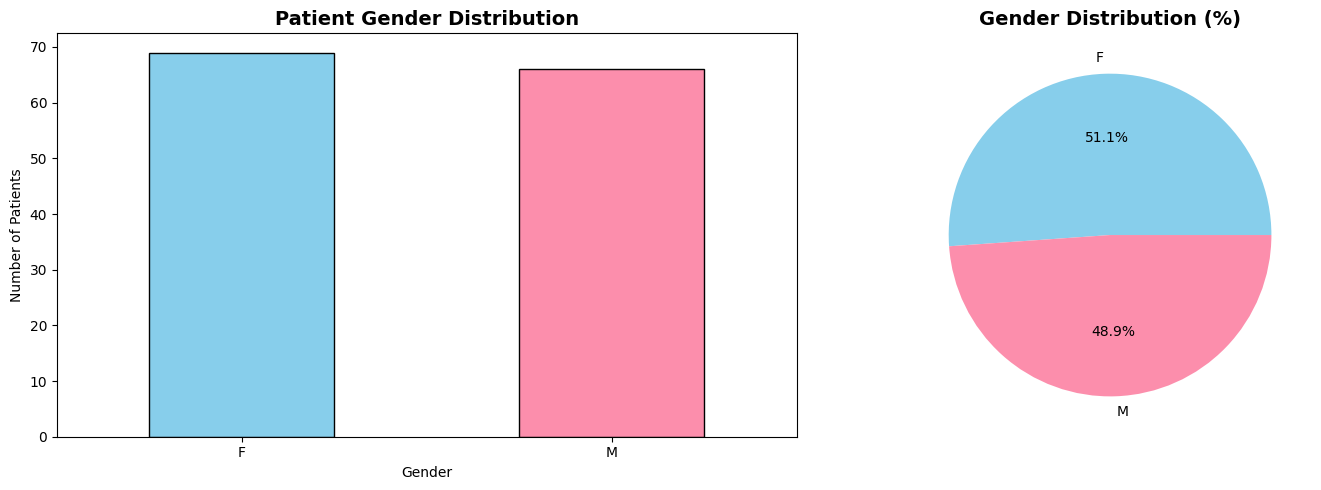


  AGE STATISTICS:
------------------
   • Mean Age: 55.1 years
   • Median Age: 56.1 years
   • Age Range: 1.1 - 89.7 years
   • Standard Deviation: 19.1 years

  AGE GROUP DISTRIBUTION:
--------------------------
   • 65+ (Senior): 45 (33.3%)
   • 50-64 (Middle Age): 43 (31.9%)
   • 35-49 (Adult): 24 (17.8%)
   • 18-34 (Young Adult): 21 (15.6%)
   • 0-17 (Pediatric): 2 (1.5%)


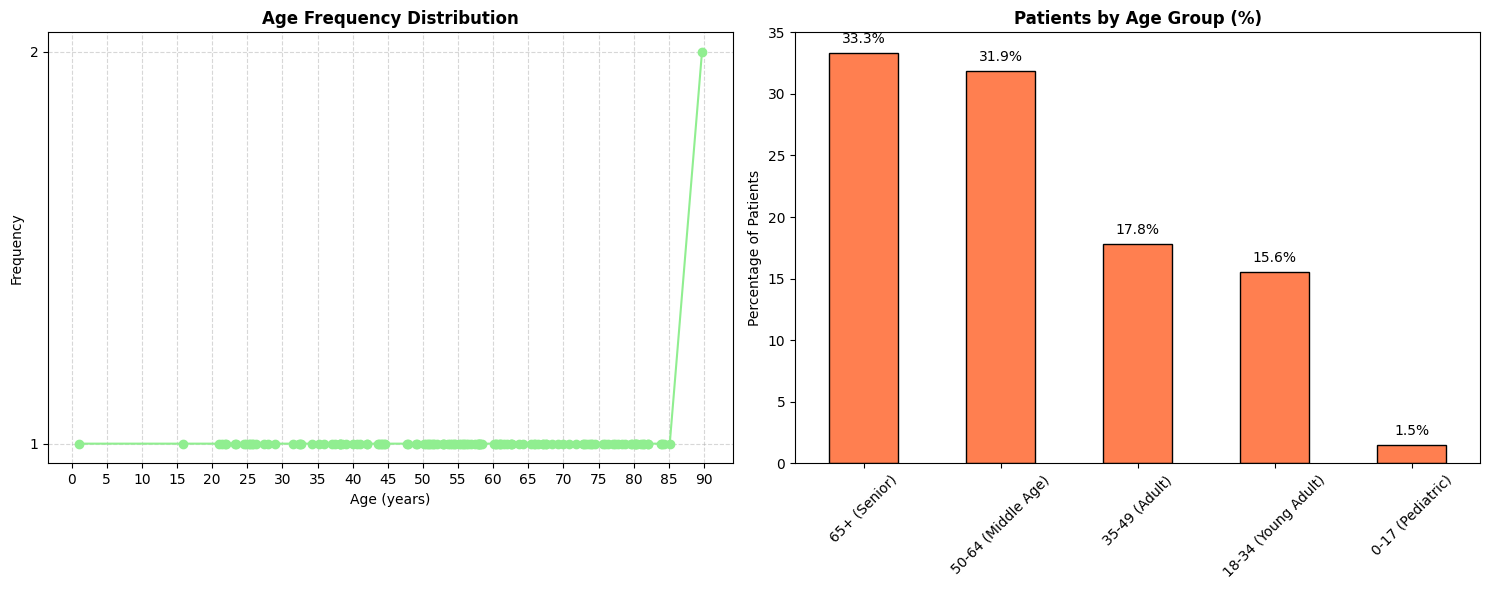

  REGISTRATION PATTERNS:
------------------------
   • Registration Period: 2022 - 2025
   • Peak Registration Year: 2024 (56 patients)

  REGISTRATION PATTERNS-Visualization:
---------------------------------------


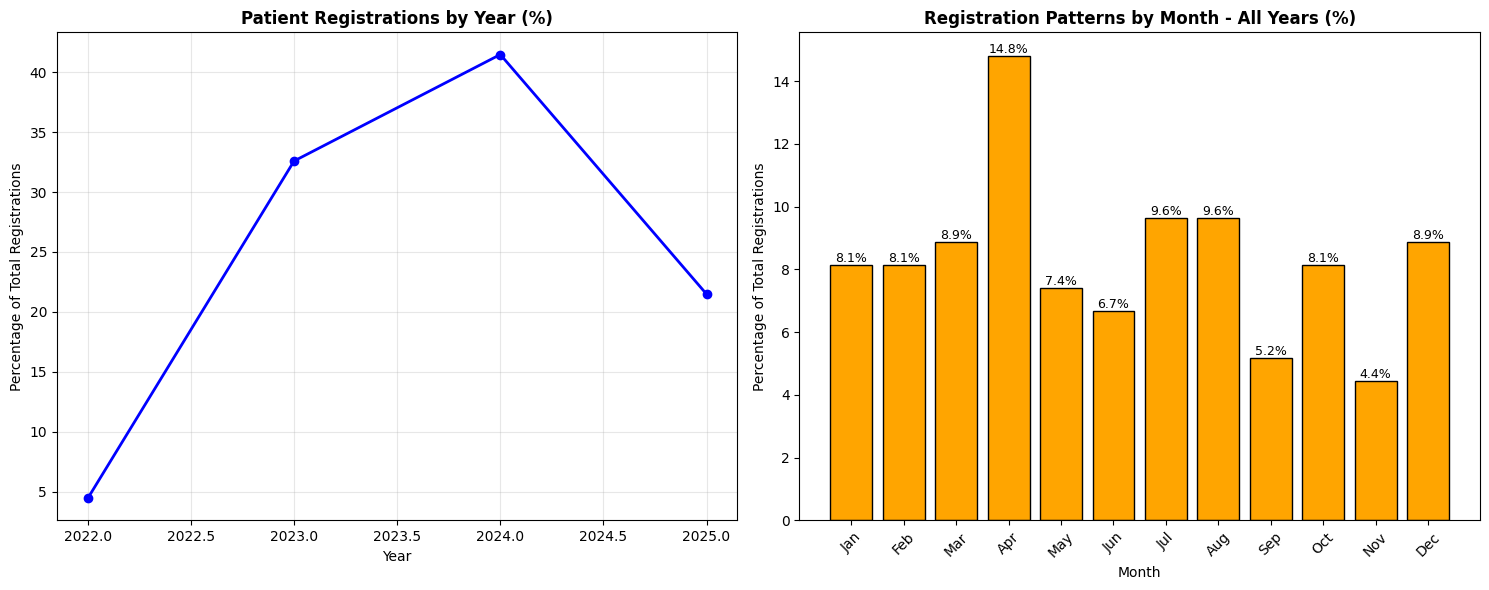


      Medications Data Analysis 

  BASIC DATA PROFILE:
----------------------
   • Table: drugs
   • Shape: 32 rows × 9 columns
   • Memory Usage: 16.60 KB
   • Duplicate Rows: 0 (0.0%)
   • Missing Values: 10.1% (Percentage of null values across all cells)
   • Date Range (created_at): 2023-11-21 14:59:53 to 2024-07-28 19:50:36
   • Date Range (updated_at): 2023-11-21 16:42:28 to 2024-09-16 09:50:48

  DATA TYPES:
--------------
   • object: 6 columns
   • datetime64[ns]: 2 columns
   • int64: 1 columns

  NUMERIC COLUMNS SUMMARY:
---------------------------
   • Column Name: Range [Minimum - Maximum], Mean:
   • id: Range [5.0 - 36.0], Mean: 20.5

  TEXT/CATEGORICAL COLUMNS:
----------------------------
   • name: 32 categories, Most common: 'AUGMENTIN'
   • generic_name: 32 categories, Most common: 'Acetylsalicylic acid'
   • dose: 29 categories, Most common: '5mg'
   • form: 5 categories, Most common: 'tablet'
   • description: 3 categories, Most common: 'B12'
   • path: 32 categ

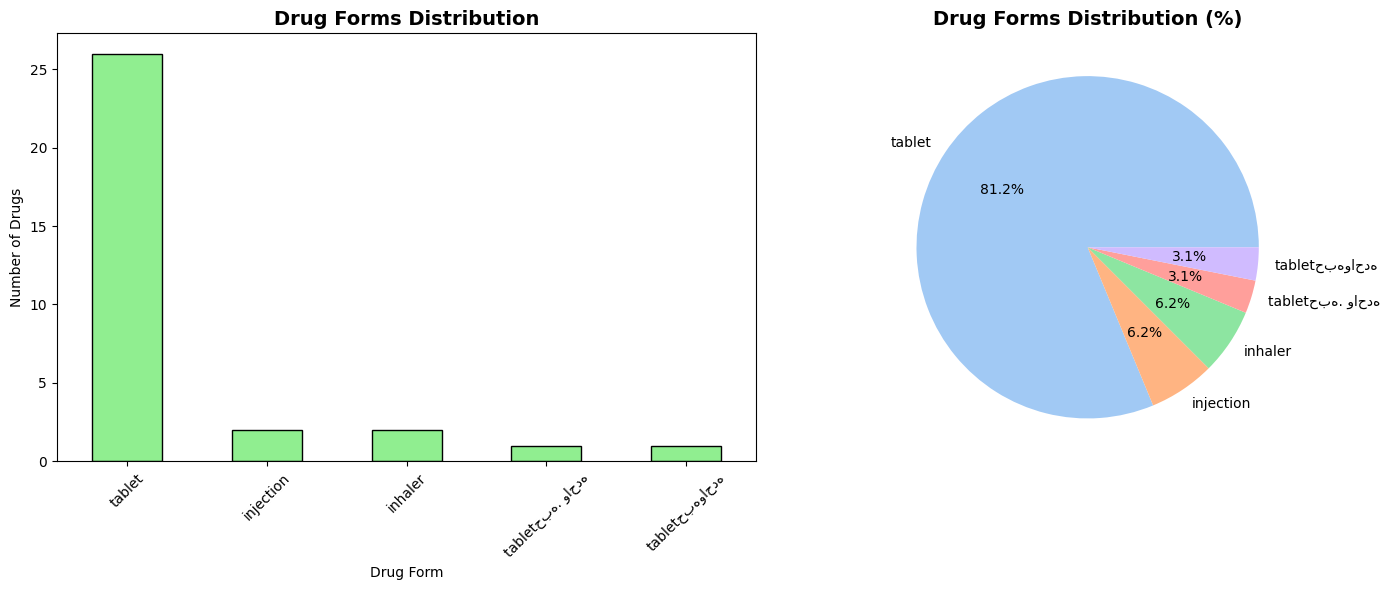


      Vitals Data Analysis 

  BASIC DATA PROFILE:
----------------------
   • Table: vitals
   • Shape: 654 rows × 11 columns
   • Memory Usage: 178.87 KB
   • Duplicate Rows: 0 (0.0%)
   • Missing Values: 9.0% (Percentage of null values across all cells)
   • Date Range (created_at): 2023-01-31 02:00:00 to 2025-08-29 14:24:57
   • Date Range (updated_at): 2023-11-22 08:05:05 to 2025-08-29 14:24:57

  DATA TYPES:
--------------
   • int64: 6 columns
   • object: 2 columns
   • datetime64[ns]: 2 columns
   • float64: 1 columns

  NUMERIC COLUMNS SUMMARY:
---------------------------
   • Column Name: Range [Minimum - Maximum], Mean:
   • id: Range [5.0 - 829.0], Mean: 461.9
   • patient_id: Range [1.0 - 138.0], Mean: 15.7
   • user_id: Range [1.0 - 7.0], Mean: 2.0
   • temperature: Range [0.0 - 367.0], Mean: 37.0
   • heartbeat: Range [0.0 - 147.0], Mean: 69.8
   • oxygen: Range [0.0 - 100.0], Mean: 93.4
   • glucose: Range [0.0 - 10000.0], Mean: 90.6

  TEXT/CATEGORICAL COLUMNS:
-----

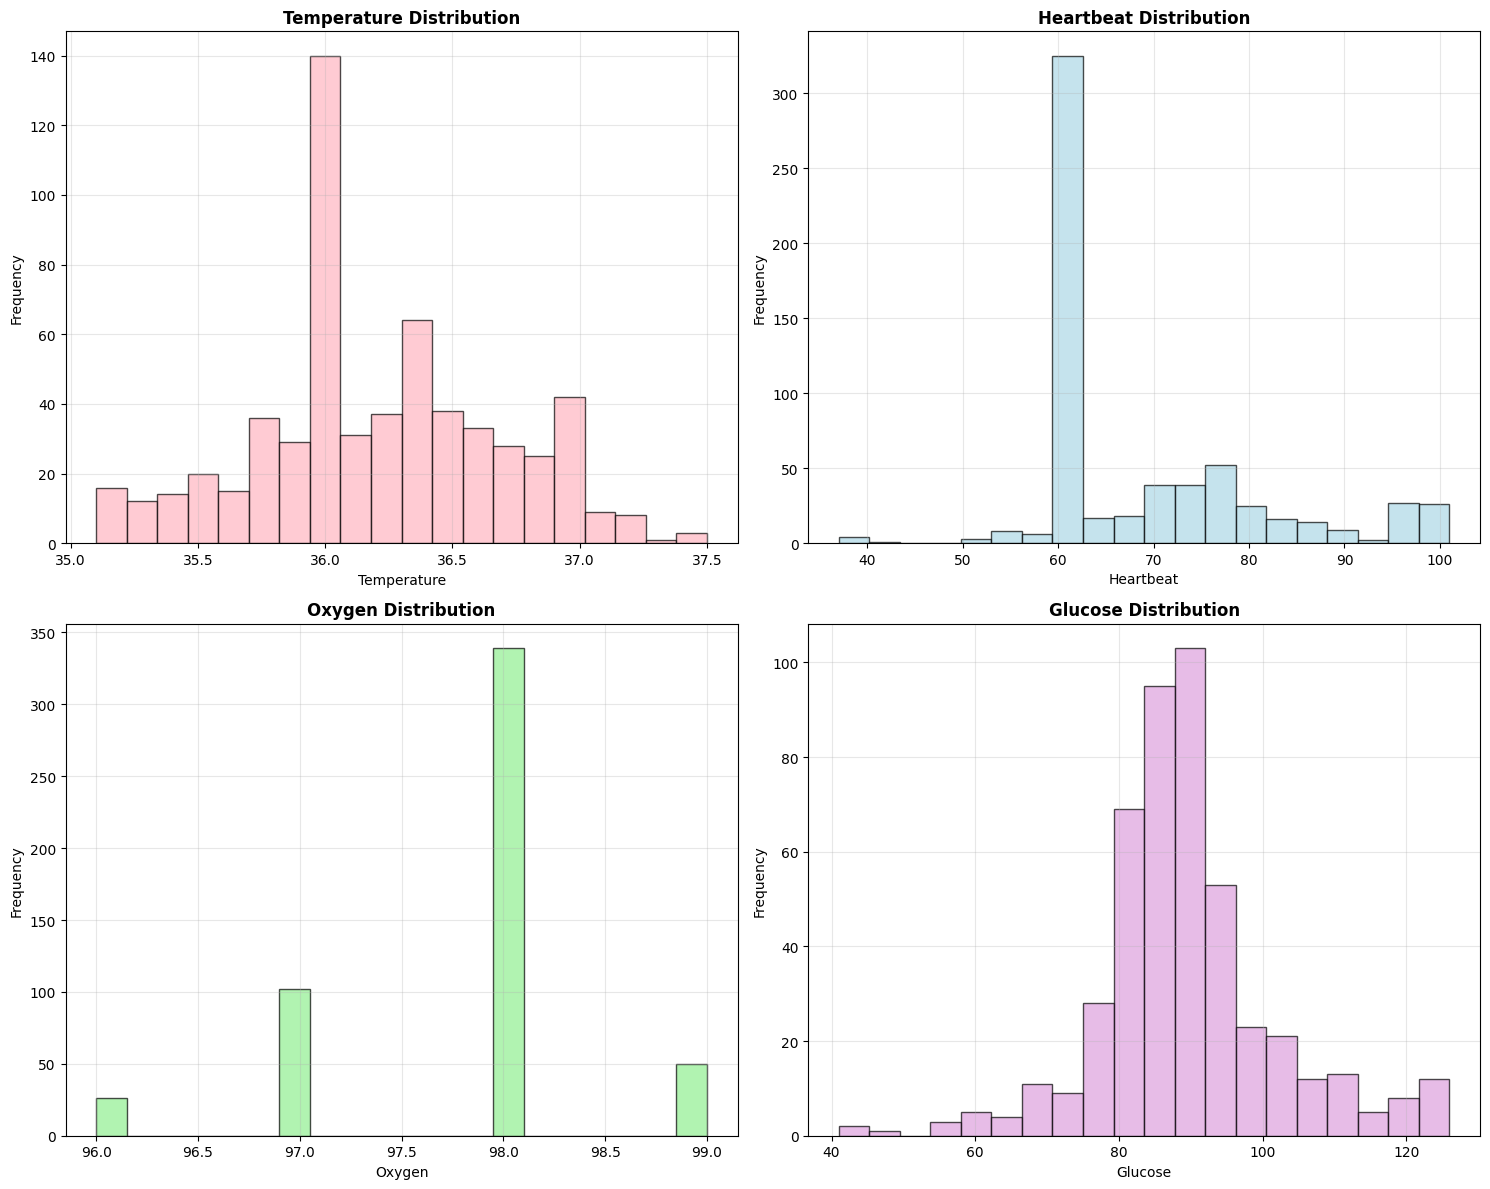


  VITAL MONITORING PATTERNS:
-----------------------------
   • Monitoring Period: 2023-01 to 2025-08
   • Average Monthly Readings: 32.7

  BLOOD PRESSURE ANALYSIS:
---------------------------
   • Valid BP Readings: 333

  BLOOD PRESSURE CATEGORIES:
-----------------------------
   • Stage 1 High: 176 (52.9%)
   • Normal: 96 (28.8%)
   • Elevated: 58 (17.4%)
   • Stage 2 High: 3 (0.9%)

      Visits Data Analysis (Hospital-Patient) 

  BASIC DATA PROFILE:
----------------------
   • Table: hospital_patient
   • Shape: 60 rows × 7 columns
   • Memory Usage: 19.53 KB
   • Duplicate Rows: 0 (0.0%)
   • Missing Values: 0.0% (Percentage of null values across all cells)
   • Date Range (created_at): 2017-04-10 15:00:00 to 2025-08-22 14:24:57
   • Date Range (updated_at): 2023-08-31 14:24:57 to 2025-08-22 14:24:57

  DATA TYPES:
--------------
   • int64: 3 columns
   • object: 2 columns
   • datetime64[ns]: 2 columns

  NUMERIC COLUMNS SUMMARY:
---------------------------
   • Column Name

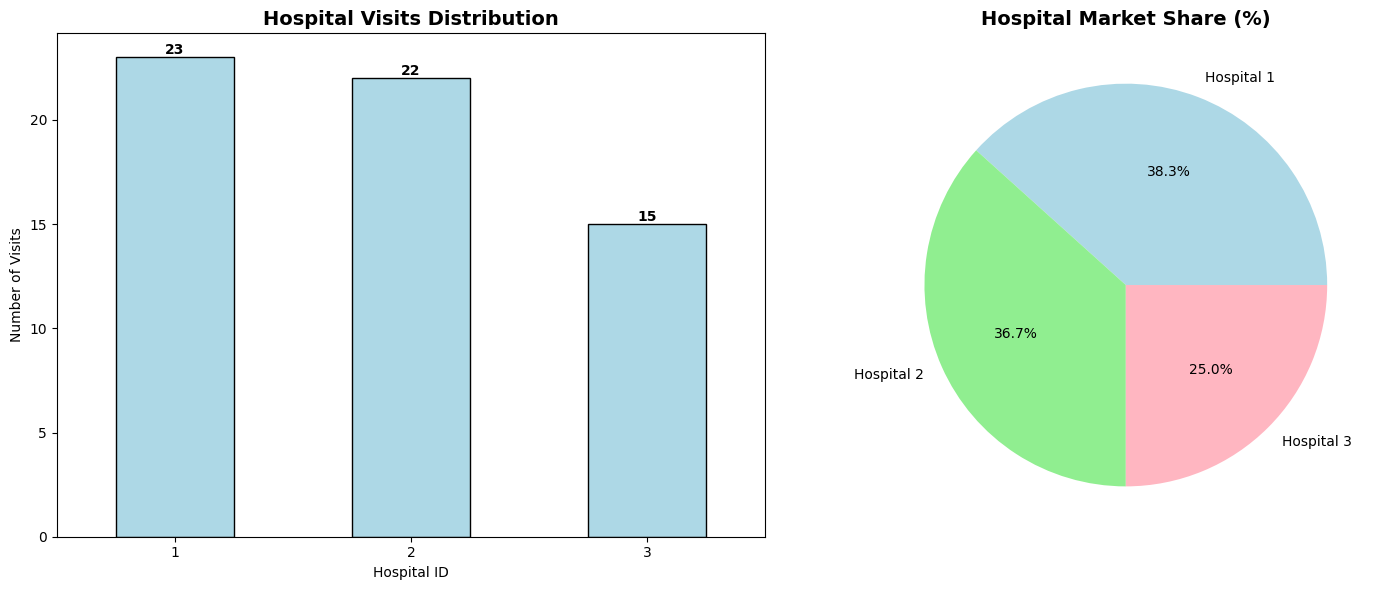


  PATIENT VISIT PATTERNS:
--------------------------
   • Most Frequent Patient: 3 visits (Patient ID: 1)
   • Single-Visit Patients: 37
   • Multi-Visit Patients: 11

  HOSPITAL PROCEDURES ANALYSIS:
--------------------------------
   • Visits with Procedure Notes: 60 (100.0%)

  COMMON PROCEDURES:
---------------------
   1. Cardiac catheterization procedure: 7 cases (11.7%)
   2. Wound care and dressing change: 6 cases (10.0%)
   3. Scheduled surgical procedure: 5 cases (8.3%)
   4. Hypertension treatment and monitoring: 4 cases (6.7%)
   5. Laboratory workup and assessment: 4 cases (6.7%)

  PROCEDURE CATEGORIES:
------------------------
   • Surgery-Related Cases: 2 (3.3%)
   • Cardiac-Related Cases: 11 (18.3%)

  VISIT TIMING PATTERNS:
-------------------------
   • Visit Period: 2017 - 2025
   • Peak Visit Year: 2025 (25 visits)


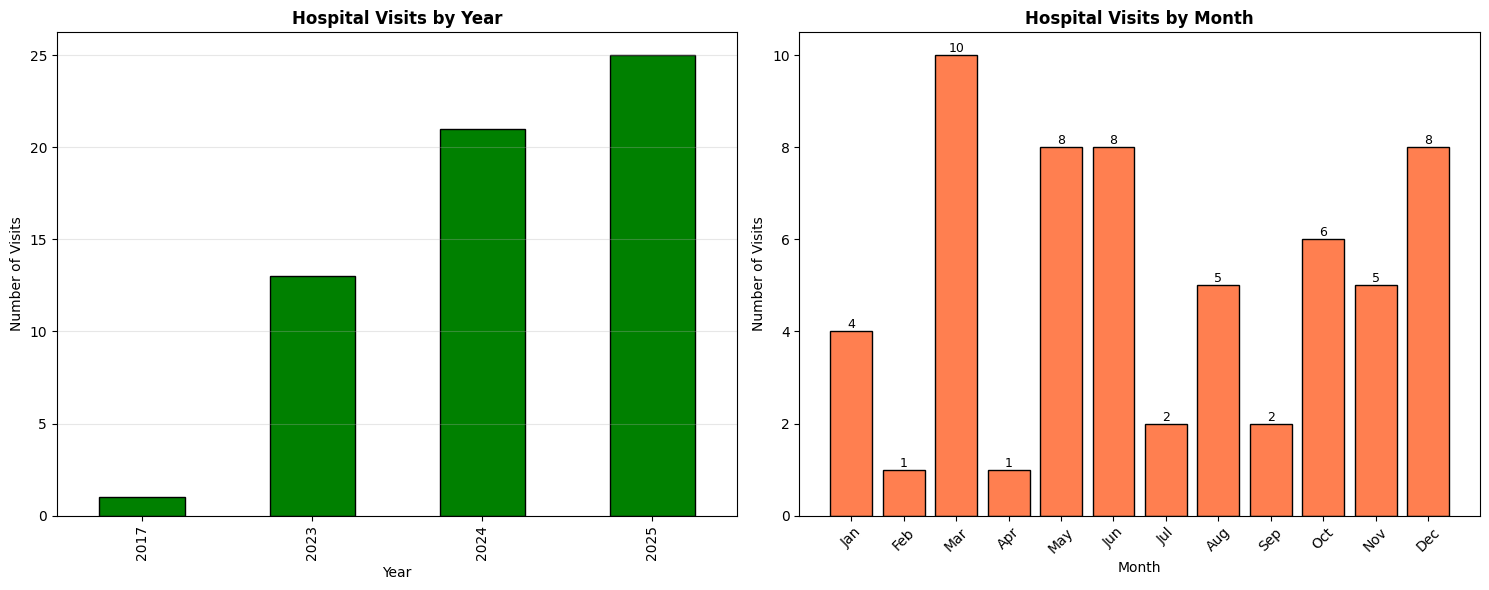


  VISITS BY HOSPITAL NAME:
---------------------------
   • AUMBC: 23 visits (38.3%)
   • Zahraa Hospital: 22 visits (36.7%)
   • Bikhazi Hospital: 15 visits (25.0%)

         Data Profiling Complete: Patients, Medications, Vitals, and Visits Analysis Finished       


In [ ]:
print_header("Phase 1: Part 2: Data Profiling: Analyze patients, medications, vitals, visits data")

tables = {
    "patients": patients,
    "vitals": vitals,
    "drugs": drugs,
    "hospitals": hospitals,
}

# Print primary tables
print_heading_3("\nTable Name(Number of entries):")
for name, df in tables.items():
    print(f"   • {name}({len(df)})")

print_dashed_heading("  Successfully loaded healthcare data tables ro be analyzed")

#basic analysis fucntion for any table:

def basic_data_profile(df, table_name):
    """Generate basic profile for any table]"""
    print_heading_3(f"\n  BASIC DATA PROFILE:")
    #Basic table info: name + shape:
    print(f"   • Table: {table_name}")
    print(f"   • Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

    # Memory usage (handles small datasets properly):
    memory_bytes = df.memory_usage(deep=True).sum()
    if memory_bytes < 1024 * 1024:  # Less than 1 MB
        memory_kb = memory_bytes / 1024
        print(f"   • Memory Usage: {memory_kb:.2f} KB")
    else:
        memory_mb = memory_bytes / (1024 * 1024)
        print(f"   • Memory Usage: {memory_mb:.2f} MB")

    # Duplicate analysis: Check if there are duplicate data
    duplicate_count = df.duplicated().sum()
    duplicate_percentage = (duplicate_count / len(df)) * 100 if len(df) > 0 else 0
    print(f"   • Duplicate Rows: {duplicate_count:,} ({duplicate_percentage:.1f}%)")

    # Missing Values: Check if there are null/missing valuess ad their %
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()
    missing_percentage = (missing_cells / total_cells) * 100 if total_cells > 0 else 0
    print(f"   • Missing Values: {missing_percentage:.1f}% (Percentage of null values across all cells)")

    # Dataset Date range (if datetime columns exist):
      # Convert object columns that look like dates to datetime
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col], errors='raise')
            except (ValueError, TypeError):
                continue
    datetime_cols = df.select_dtypes(include=['datetime64']).columns
    if len(datetime_cols) > 0:
        for col in datetime_cols:
            if df[col].notna().any():
                min_date = df[col].min()
                max_date = df[col].max()
                print(f"   • Date Range ({col}): {min_date} to {max_date}")

    # Data types breakdown(Show the datatypes present in a table):
    print_heading_3(f"\n  DATA TYPES:")
    dtype_summary = df.dtypes.value_counts()
    for dtype, count in dtype_summary.items():
        print(f"   • {dtype}: {count} columns")

    #Basic statistical summary for numeric columns(Showing their min, max, and mean):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print_heading_3(f"\n  NUMERIC COLUMNS SUMMARY:")
        print(f"   • Column Name: Range [Minimum - Maximum], Mean:")
        for col in numeric_cols:
            if df[col].notna().any():
                stats = df[col].describe()
                print(f"   • {col}: Range [{stats['min']:.1f} - {stats['max']:.1f}], Mean: {stats['mean']:.1f}")

    # 5. Text/Categorical columns summary: number of categories + the most common one
    text_cols = df.select_dtypes(include=['object']).columns
    if len(text_cols) > 0:
        print_heading_3(f"\n  TEXT/CATEGORICAL COLUMNS:")
        for col in text_cols:
            unique_count = df[col].nunique()
            most_common = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A'
            print(f"   • {col}: {unique_count} categories, Most common: '{most_common}'")

    # Missing values analysis
    # Count the number and calculate the missing %
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum().values,
        'Missing_Percentage': (df.isnull().sum() / len(df) * 100).values
    }).sort_values('Missing_Percentage', ascending=False)

    if missing_df['Missing_Count'].sum() > 0:
        print_heading_3(f"\n   MISSING VALUES ANALYSIS:")
        missing_data = missing_df[missing_df['Missing_Count'] > 0]
        for _, row in missing_data.iterrows():
            print(f"   • {row['Column']}: {row['Missing_Count']:,} ({row['Missing_Percentage']:.1f}%)")
    else:
        print_heading_3(f"\n  NO MISSING VALUES DETECTED")

    # 6. Data quality flags
    print_heading_3(f"\n  DATA QUALITY FLAGS:")
    flags = []

    if duplicate_count > 0:
        flags.append(f"Duplicates detected ({duplicate_count:,} rows)")

    if missing_percentage > 0:
      flags.append(f"{missing_percentage:.1f}% missing values — potential data quality issue")

    # Check for suspicious values in numeric columns
    for col in numeric_cols:
        if df[col].min() < 0 and col.lower() in ['age', 'heartbeat', 'temperature', 'oxygen', 'glucose']:
            flags.append(f"Negative values in {col} (medical data)")

    if flags:
        for flag in flags:
            print(f"  • {flag}")
    else:
        print(f"  • No obvious data quality issues detected(No suspicious values in numeric columns, no duplicates, no missing values)")
# =============================================================================
# 1. PATIENTS DATA ANALYSIS
# =============================================================================
print_dashed_heading("Patients Data Analysis")

basic_data_profile(patients, "patients")

print_heading_3(f"\n  PATIENT ANALYSIS-Plotting:")

# Gender distribution
if 'gender' in patients.columns:
    print_heading_3(f"\n  GENDER DISTRIBUTION:")
    gender_counts = patients['gender'].value_counts()
    for gender, count in gender_counts.items():
        percentage = (count / len(patients)) * 100
        print(f"   • {gender}: {count:,} ({percentage:.1f}%)")

    # Visualize gender distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Bar chart
    gender_counts.plot(kind='bar', ax=ax1, color=['skyblue', '#FC8EAC'], edgecolor='black')
    ax1.set_title('Patient Gender Distribution', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Number of Patients')
    ax1.set_xlabel('Gender')
    ax1.tick_params(axis='x', rotation=0)

    # Pie chart
    ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
            colors=['skyblue', '#FC8EAC'])
    ax2.set_title('Gender Distribution (%)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Age analysis
if 'dob' in patients.columns:
    try:
        patients['dob'] = pd.to_datetime(patients['dob'], errors='coerce')
        patients['age'] = (datetime.now() - patients['dob']).dt.days / 365.25

        # Remove invalid ages
        valid_ages = patients['age'].dropna()
        valid_ages = valid_ages[(valid_ages >= 0) & (valid_ages <= 120)]

        print_heading_3(f"\n  AGE STATISTICS:")
        print(f"   • Mean Age: {valid_ages.mean():.1f} years")
        print(f"   • Median Age: {valid_ages.median():.1f} years")
        print(f"   • Age Range: {valid_ages.min():.1f} - {valid_ages.max():.1f} years")
        print(f"   • Standard Deviation: {valid_ages.std():.1f} years")

        # Age groups
        age_groups = pd.cut(valid_ages,
                           bins=[0, 18, 35, 50, 65, 100],
                           labels=['0-17 (Pediatric)', '18-34 (Young Adult)',
                                  '35-49 (Adult)', '50-64 (Middle Age)', '65+ (Senior)'],
                           include_lowest=True)
        age_group_counts = age_groups.value_counts()

        print_heading_3(f"\n  AGE GROUP DISTRIBUTION:")
        for group, count in age_group_counts.items():
            percentage = (count / len(valid_ages)) * 100
            print(f"   • {group}: {count:,} ({percentage:.1f}%)")

        #  Age histogram (with optional density plot for better clarity)
        # First plot: Clear age-frequency line plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Frequency count of each age
        age_counts = valid_ages.value_counts().sort_index()
        ax1.plot(age_counts.index, age_counts.values, marker='o', linestyle='-', color='lightgreen')
        ax1.set_title('Age Frequency Distribution', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Age (years)')
        ax1.set_ylabel('Frequency')
        ax1.grid(True, linestyle='--', alpha=0.5)
        # Handle x-axis for many ages
        if len(age_counts) > 25:
          ax1.xaxis.set_major_locator(plt.MultipleLocator(5))

        ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

        # Second plot: Age group bar chart (percentages)
        age_group_percentage = (age_group_counts / age_group_counts.sum()) * 100
        age_group_percentage.plot(kind='bar', ax=ax2, color='coral', edgecolor='black')
        ax2.set_title('Patients by Age Group (%)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Percentage of Patients')
        ax2.tick_params(axis='x', rotation=45)
        ax2.set_xlabel("")  # Removes x-axis label

        # Add % labels on the bars
        for p in ax2.patches:
            ax2.annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                        textcoords='offset points')

        plt.tight_layout()
        plt.show()


    except Exception as e:
        print_dashed_heading(f"      Could not analyze age data: {e}")

# Registration patterns
if 'created_at' in patients.columns:
    try:
        patients['created_at'] = pd.to_datetime(patients['created_at'], errors='coerce')
        patients['reg_year'] = patients['created_at'].dt.year
        patients['reg_month'] = patients['created_at'].dt.month
        patients['reg_weekday'] = patients['created_at'].dt.dayofweek

        print_heading_3(f"  REGISTRATION PATTERNS:")

        # Yearly registrations
        yearly_reg = patients['reg_year'].value_counts().sort_index()
        print(f"   • Registration Period: {yearly_reg.index.min()} - {yearly_reg.index.max()}")
        print(f"   • Peak Registration Year: {yearly_reg.idxmax()} ({yearly_reg.max():,} patients)")

        # Monthly patterns across all years
        monthly_reg = patients['reg_month'].value_counts().sort_index()
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

        print_heading_3(f"\n  REGISTRATION PATTERNS-Visualization:")
        # Registration visualizations - Only first two plots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Yearly trend - using percentages
        yearly_reg_pct = (yearly_reg / yearly_reg.sum()) * 100
        yearly_reg_pct.plot(kind='line', ax=ax1, marker='o', linewidth=2, color='blue')
        ax1.set_title('Patient Registrations by Year (%)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Percentage of Total Registrations')
        ax1.set_xlabel('Year')
        ax1.grid(True, alpha=0.3)

        # Monthly pattern across all years - using percentages
        monthly_counts = [monthly_reg.get(i, 0) for i in range(1, 13)]
        monthly_pct = [(count / len(patients)) * 100 for count in monthly_counts]
        bars = ax2.bar(range(1, 13), monthly_pct, color='orange', edgecolor='black')
        ax2.set_title('Registration Patterns by Month - All Years (%)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Percentage of Total Registrations')
        ax2.set_xlabel('Month')
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(month_names, rotation=45)

        # Add percentage labels on bars
        for bar, pct in zip(bars, monthly_pct):
            if pct > 0:
                ax2.annotate(f'{pct:.1f}%',
                           (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                           ha='center', va='bottom', fontsize=9, color='black')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"      Could not analyze registration patterns: {e}")

# =============================================================================
# 2. MEDICATIONS DATA ANALYSIS
# =============================================================================
print_dashed_heading("Medications Data Analysis")

basic_data_profile(drugs, "drugs")
# Top drugs by name occurrence
if 'name' in drugs.columns:
    print_heading_3(f"\n  TOP 10 DRUGS BY NAME:")
    top_drugs = drugs['name'].value_counts().head(10)
    for idx, (drug, count) in enumerate(top_drugs.items(), 1):
        print(f"   {idx:2d}. {drug}: {count} entries")

# medication insights
print_heading_3(f"\n  KEY MEDICATION INSIGHTS:")
print(f"   • Total Unique Medications: {len(drugs):,}")
print(f"   • Most Common Form: {drugs['form'].mode().iloc[0] if not drugs['form'].mode().empty else 'N/A'}")

print_heading_3(f"\n  MEDICATION ANALYSIS - Visualization:")

# Drug form distribution
if 'form' in drugs.columns:
    print_heading_3(f"\n  DRUG FORM DISTRIBUTION:")
    form_counts = drugs['form'].value_counts()
    for form, count in form_counts.items():
        percentage = (count / len(drugs)) * 100
        print(f"   • {form}: {count:,} ({percentage:.1f}%)")

    # Visualize drug forms
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Bar chart
    form_counts.plot(kind='bar', ax=ax1, color='lightgreen', edgecolor='black')
    ax1.set_title('Drug Forms Distribution', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Number of Drugs')
    ax1.set_xlabel('Drug Form')
    ax1.tick_params(axis='x', rotation=45)

    # Pie chart
    ax2.pie(form_counts.values, labels=form_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette("pastel"))
    ax2.set_title('Drug Forms Distribution (%)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()


# =============================================================================
# 3. VITALS DATA ANALYSIS
# =============================================================================
print_dashed_heading("Vitals Data Analysis")

basic_data_profile(vitals, "vitals")

print_heading_3(f"\n  VITAL SIGNS ANALYSIS:")

# Basic vitals statistics
vital_columns = ['temperature', 'heartbeat', 'oxygen', 'glucose']
numeric_vitals = []

for col in vital_columns:
    if col in vitals.columns:
        numeric_vitals.append(col)

if numeric_vitals:
    print_heading_3(f"\n  VITAL SIGNS STATISTICS:")
    for col in numeric_vitals:
        if vitals[col].notna().any():
            stats = vitals[col].describe()
            print(f"   • {col.capitalize()}: Range [{stats['min']:.1f} - {stats['max']:.1f}], Mean: {stats['mean']:.1f}")

# Patient vital monitoring coverage
if 'patient_id' in vitals.columns:
    print_heading_3(f"\n  PATIENT MONITORING COVERAGE:")
    patients_with_vitals = vitals['patient_id'].nunique()
    total_vital_readings = len(vitals)
    print(f"   • Patients with Vital Records: {patients_with_vitals:,}")
    print(f"   • Total Vital Readings: {total_vital_readings:,}")
    print(f"   • Average Readings per Patient: {total_vital_readings/patients_with_vitals:.1f}")

    # Vital readings per patient distribution
    readings_per_patient = vitals['patient_id'].value_counts()
    print(f"   • Most Monitored Patient: {readings_per_patient.max()} readings")
    print(f"   • Least Monitored Patient: {readings_per_patient.min()} readings")

# Vital signs visualization
if len(numeric_vitals) > 0:
    print_heading_3(f"\n  VITAL SIGNS VISUALIZATION:")

    # Create subplots for vital signs
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    colors = ['#FFB6C1', '#ADD8E6', '#90EE90', '#DDA0DD']

    for i, col in enumerate(numeric_vitals[:4]):  # Limit to 4 vital signs
        if col in vitals.columns and vitals[col].notna().any():
            # Remove outliers for better visualization
            Q1 = vitals[col].quantile(0.25)
            Q3 = vitals[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            clean_data = vitals[col][(vitals[col] >= lower_bound) & (vitals[col] <= upper_bound)]

            axes[i].hist(clean_data, bins=20, color=colors[i], edgecolor='black', alpha=0.7)
            axes[i].set_title(f'{col.capitalize()} Distribution', fontsize=12, fontweight='bold')
            axes[i].set_xlabel(col.capitalize())
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)

    # Hide empty subplots
    for i in range(len(numeric_vitals), 4):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Vital monitoring frequency over time
if 'created_at' in vitals.columns:
    try:
        vitals['created_at'] = pd.to_datetime(vitals['created_at'], errors='coerce')
        vitals['monitoring_date'] = vitals['created_at'].dt.date
        vitals['monitoring_month'] = vitals['created_at'].dt.to_period('M')

        print_heading_3(f"\n  VITAL MONITORING PATTERNS:")

        # Monthly monitoring trends
        monthly_vitals = vitals['monitoring_month'].value_counts().sort_index()
        print(f"   • Monitoring Period: {monthly_vitals.index.min()} to {monthly_vitals.index.max()}")
        print(f"   • Average Monthly Readings: {monthly_vitals.mean():.1f}")

    except Exception as e:
        print(f"     Could not analyze monitoring patterns: {e}")

# Pressure analysis (special handling for blood pressure)
if 'pressure' in vitals.columns:
    print_heading_3(f"\n  BLOOD PRESSURE ANALYSIS:")

    # Extract systolic and diastolic values
    try:
        pressure_data = vitals['pressure'].dropna().astype(str)
        bp_split = pressure_data.str.split('/')

        systolic = []
        diastolic = []

        for bp in bp_split:
            if len(bp) == 2:
                try:
                    sys_val = float(bp[0])
                    dias_val = float(bp[1])
                    if 50 <= sys_val <= 250 and 30 <= dias_val <= 150:  # Reasonable BP ranges
                        systolic.append(sys_val)
                        diastolic.append(dias_val)
                except ValueError:
                    continue

        if systolic and diastolic:
            print(f"   • Valid BP Readings: {len(systolic):,}")

            # BP categories
            bp_categories = []
            for s, d in zip(systolic, diastolic):
                if s < 120 and d < 80:
                    bp_categories.append('Normal')
                elif s < 130 and d < 80:
                    bp_categories.append('Elevated')
                elif s < 140 or d < 90:
                    bp_categories.append('Stage 1 High')
                else:
                    bp_categories.append('Stage 2 High')

            bp_category_counts = pd.Series(bp_categories).value_counts()
            print_heading_3(f"\n  BLOOD PRESSURE CATEGORIES:")
            for category, count in bp_category_counts.items():
                percentage = (count / len(bp_categories)) * 100
                print(f"   • {category}: {count:,} ({percentage:.1f}%)")

    except Exception as e:
        print(f"      Could not analyze blood pressure data: {e}")


# =============================================================================
# 5. VISITS DATA ANALYSIS (Hospital_Patient)
# =============================================================================
print_dashed_heading("Visits Data Analysis (Hospital-Patient)")

basic_data_profile(hospital_patient, "hospital_patient")

print_heading_3(f"\n  HOSPITAL VISITS ANALYSIS:")

# Basic visit statistics
total_visits = len(hospital_patient)
unique_patients = hospital_patient['patient_id'].nunique()
unique_hospitals = hospital_patient['hospital_id'].nunique()

print(f"   • Total Hospital Visits: {total_visits:,}")
print(f"   • Patients with Hospital Visits: {unique_patients:,}")
print(f"   • Hospitals Involved: {unique_hospitals:,}")
print(f"   • Average Visits per Patient: {total_visits/unique_patients:.1f}")

# Hospital utilization analysis
if 'hospital_id' in hospital_patient.columns:
    print_heading_3(f"\n  HOSPITAL UTILIZATION:")
    hospital_visits = hospital_patient['hospital_id'].value_counts().sort_values(ascending=False)

    for i, (hospital_id, count) in enumerate(hospital_visits.items(), 1):
        percentage = (count / total_visits) * 100
        print(f"   {i}. Hospital {hospital_id}: {count:,} visits ({percentage:.1f}%)")

    # Visualize hospital utilization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Bar chart
    hospital_visits.plot(kind='bar', ax=ax1, color='lightblue', edgecolor='black')
    ax1.set_title('Hospital Visits Distribution', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Number of Visits')
    ax1.set_xlabel('Hospital ID')
    ax1.tick_params(axis='x', rotation=0)

    # Add count labels on bars
    for i, v in enumerate(hospital_visits.values):
        ax1.annotate(f'{v}', (i, v), ha='center', va='bottom', fontweight='bold')

    # Pie chart
    ax2.pie(hospital_visits.values, labels=[f'Hospital {id}' for id in hospital_visits.index],
            autopct='%1.1f%%', colors=['#ADD8E6', '#90EE90', '#FFB6C1'])
    ax2.set_title('Hospital Market Share (%)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Patient visit patterns
if 'patient_id' in hospital_patient.columns:
    print_heading_3(f"\n  PATIENT VISIT PATTERNS:")
    patient_visits = hospital_patient['patient_id'].value_counts()

    print(f"   • Most Frequent Patient: {patient_visits.max()} visits (Patient ID: {patient_visits.idxmax()})")
    print(f"   • Single-Visit Patients: {(patient_visits == 1).sum():,}")
    print(f"   • Multi-Visit Patients: {(patient_visits > 1).sum():,}")

# Procedure/Notes analysis
if 'notes' in hospital_patient.columns:
    print_heading_3(f"\n  HOSPITAL PROCEDURES ANALYSIS:")

    # Filter out empty notes
    procedures = hospital_patient['notes'].dropna()
    procedures = procedures[procedures.str.strip() != '']

    if not procedures.empty:
        print(f"   • Visits with Procedure Notes: {len(procedures):,} ({len(procedures)/total_visits*100:.1f}%)")

        # Most common procedures
        procedure_counts = procedures.value_counts()
        print_heading_3(f"\n  COMMON PROCEDURES:")
        for i, (procedure, count) in enumerate(procedure_counts.head(5).items(), 1):
            percentage = (count / len(procedures)) * 100
            print(f"   {i}. {procedure}: {count:,} cases ({percentage:.1f}%)")

        # Procedure categories (basic keyword analysis)
        surgery_keywords = ['surgery', 'amputation', 'bypass', 'implantation', 'operation']
        cardiac_keywords = ['heart', 'cardiac', 'pacemaker', 'bypass', 'coronary']

        surgery_cases = sum(1 for note in procedures if any(keyword.lower() in note.lower() for keyword in surgery_keywords))
        cardiac_cases = sum(1 for note in procedures if any(keyword.lower() in note.lower() for keyword in cardiac_keywords))

        print_heading_3(f"\n  PROCEDURE CATEGORIES:")
        print(f"   • Surgery-Related Cases: {surgery_cases:,} ({surgery_cases/len(procedures)*100:.1f}%)")
        print(f"   • Cardiac-Related Cases: {cardiac_cases:,} ({cardiac_cases/len(procedures)*100:.1f}%)")
    else:
        print(f"   • No procedure notes available")

# Visit timing analysis
if 'created_at' in hospital_patient.columns:
    try:
        hospital_patient['created_at'] = pd.to_datetime(hospital_patient['created_at'], errors='coerce')
        hospital_patient['visit_year'] = hospital_patient['created_at'].dt.year
        hospital_patient['visit_month'] = hospital_patient['created_at'].dt.month
        hospital_patient['visit_weekday'] = hospital_patient['created_at'].dt.dayofweek

        print_heading_3(f"\n  VISIT TIMING PATTERNS:")

        # Yearly visit trends
        yearly_visits = hospital_patient['visit_year'].value_counts().sort_index()
        print(f"   • Visit Period: {yearly_visits.index.min()} - {yearly_visits.index.max()}")
        print(f"   • Peak Visit Year: {yearly_visits.idxmax()} ({yearly_visits.max():,} visits)")

        # Monthly patterns
        monthly_visits = hospital_patient['visit_month'].value_counts().sort_index()
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

        # Visualize visit timing patterns
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Yearly trend
        # Plot yearly hospital visits as a bar chart
        yearly_visits.plot(kind='bar', ax=ax1, color='green', edgecolor='black')

        ax1.set_title('Hospital Visits by Year', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Number of Visits')
        ax1.set_xlabel('Year')
        ax1.grid(True, axis='y', alpha=0.3)  # only horizontal grid lines for bars


        # Monthly pattern
        monthly_counts = [monthly_visits.get(i, 0) for i in range(1, 13)]
        bars = ax2.bar(range(1, 13), monthly_counts, color='coral', edgecolor='black')
        ax2.set_title('Hospital Visits by Month', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Number of Visits')
        ax2.set_xlabel('Month')
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(month_names, rotation=45)

        # Add count labels on bars
        for bar, count in zip(bars, monthly_counts):
            if count > 0:
                ax2.annotate(f'{count}',
                           (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                           ha='center', va='bottom', fontsize=9, color='black')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"      Could not analyze visit timing: {e}")

if 'hospitals' in globals():
    if 'id' in hospitals.columns and 'name' in hospitals.columns:
        hospital_info = hospitals[['id', 'name']].set_index('id')
        print_heading_3(f"\n  VISITS BY HOSPITAL NAME:")
        for hospital_id, visit_count in hospital_visits.items():
            hospital_name = hospital_info.loc[hospital_id, 'name'] if hospital_id in hospital_info.index else f'Hospital {hospital_id}'
            percentage = (visit_count / total_visits) * 100
            print(f"   • {hospital_name}: {visit_count:,} visits ({percentage:.1f}%)")

print_header("  Data Profiling Complete: Patients, Medications, Vitals, and Visits Analysis Finished")

# **Phase 1: Data Quality Analysis**

In [ ]:
print_header("Data Quality Analysis")


# ==================== DATA QUALITY ASSESSMENT FUNCTIONS ====================

def data_recap(dataframes_dict):
    """
    Provides a comprehensive overview of data quality issues across all datasets.

    Parameters:
    dataframes_dict: dict - Dictionary with table names as keys and DataFrames as values
    """
    print_header("COMPREHENSIVE DATA QUALITY REPORT")

    total_issues = 0

    for table_name, df in dataframes_dict.items():
        print_dashed_heading(f"Table: {table_name}")

        # Basic info
        rows, cols = df.shape
        print(f"Dataset Shape: {rows} rows × {cols} columns")

        # Missing data analysis
        missing_data = df.isnull().sum()
        missing_columns = missing_data[missing_data > 0]

        if len(missing_columns) > 0:
            print(f"\nMissing Data Issues:")
            for col, missing_count in missing_columns.items():
                percentage = (missing_count / rows) * 100
                print(f"   • {col}: {missing_count}/{rows} missing ({percentage:.1f}%)")
            total_issues += len(missing_columns)
        else:
            print(f"\nNo missing data found")

        # Duplicate analysis
        duplicates = df.duplicated().sum()
        if duplicates > 0:
            print(f"\nDuplicate Issues:")
            print(f"   • {duplicates} duplicate rows found ({(duplicates/rows)*100:.1f}%)")
            total_issues += 1
        else:
            print(f"\nNo duplicate rows found")

        print("-" * 80)

    print_header(f"SUMMARY: {total_issues} data quality issues identified across all tables")

# ==================== CHECK IF DATA IS CLEAN  ====================
# dictionary of all dataframes
dataframes = {
    'patients': patients,
    'hospitals': hospitals,
    'medical_parameters': medical_parameters,
    'medical_tests': medical_tests,
    'surgeries': surgeries,
    'users': users,
    'allergies': allergies,
    'devices': devices,
    'drug_patient': drug_patient,
    'drug_records': drug_records,
    'drugs': drugs,
    'hospital_patient': hospital_patient,
    'vitals': vitals,
    'medical_results': medical_results
}

# Comprehensive data quality check for all tables
data_recap(dataframes)

"""
medical_parameters
  Missing Data Issues:
   • unit: 3/92 missing (3.3%)
   • description: 45/92 missing (48.9%)
surgeries
  Missing Data Issues:
    • path: 2/3 missing (66.7%)

"""

print_header("Analysis:")
print_dashed_heading("The main data quality issues:")
print_heading_3(" Missing data in:\n Medical Parameters(unit, description), Surgeries(path), drug_patient(created_at, updated_at), drug_records(notes), drugs(description), vitals(notes)")
print_dashed_heading("Such data could not be substituted by mean or mode since it is medical data, also some of them have the whole column/almost all of it as null.")
print_header("Data Quality Analysis Complete")


                                       Data Quality Analysis                                        

                                 COMPREHENSIVE DATA QUALITY REPORT                                  

      Table: patients 
Dataset Shape: 135 rows × 14 columns

No missing data found

No duplicate rows found
--------------------------------------------------------------------------------

      Table: hospitals 
Dataset Shape: 3 rows × 9 columns

Missing Data Issues:
   • path: 3/3 missing (100.0%)

No duplicate rows found
--------------------------------------------------------------------------------

      Table: medical_parameters 
Dataset Shape: 92 rows × 9 columns

Missing Data Issues:
   • unit: 3/92 missing (3.3%)
   • description: 45/92 missing (48.9%)

No duplicate rows found
--------------------------------------------------------------------------------

      Table: medical_tests 
Dataset Shape: 63 rows × 7 columns

No missing data found

No duplicate rows found
-------

# **Phase 2: Data Analysis**

---



# **Phase 2: 1. Patient monitoring analysis - Vital trends over time, abnormal readings**


      4. Patient Monitoring Analysis - Vital Trends & Abnormal Readings 
VITAL SIGNS TREND ANALYSIS
--------------------------

ABNORMAL READINGS DETECTION
----------------------------
   • Temperature:
     - Below Normal (<36.1): 302 (46.2%)
     - Above Normal (>37.2): 37 (5.7%)
     - Total Abnormal: 339 (51.8%)
   • Heartbeat:
     - Below Normal (<60): 28 (4.3%)
     - Above Normal (>100): 18 (2.8%)
     - Total Abnormal: 46 (7.0%)
   • Oxygen:
     - Below Normal (<95): 108 (16.5%)
     - Above Normal (>100): 0 (0.0%)
     - Total Abnormal: 108 (16.5%)
   • Glucose:
     - Below Normal (<70): 161 (24.6%)
     - Above Normal (>140): 25 (3.8%)
     - Total Abnormal: 186 (28.4%)

PATIENTS WITH FREQUENT ABNORMAL READINGS
-----------------------------------------

   • Top 5 patients with abnormal temperature readings:
     - Sami Fleifel: 279/383 abnormal (72.8%)
     - Ibrahim Fleifel: 16/17 abnormal (94.1%)
     - Mohamad Fleifel: 1/4 abnormal (25.0%)
     - Lana Naboulsi: 1/1 ab

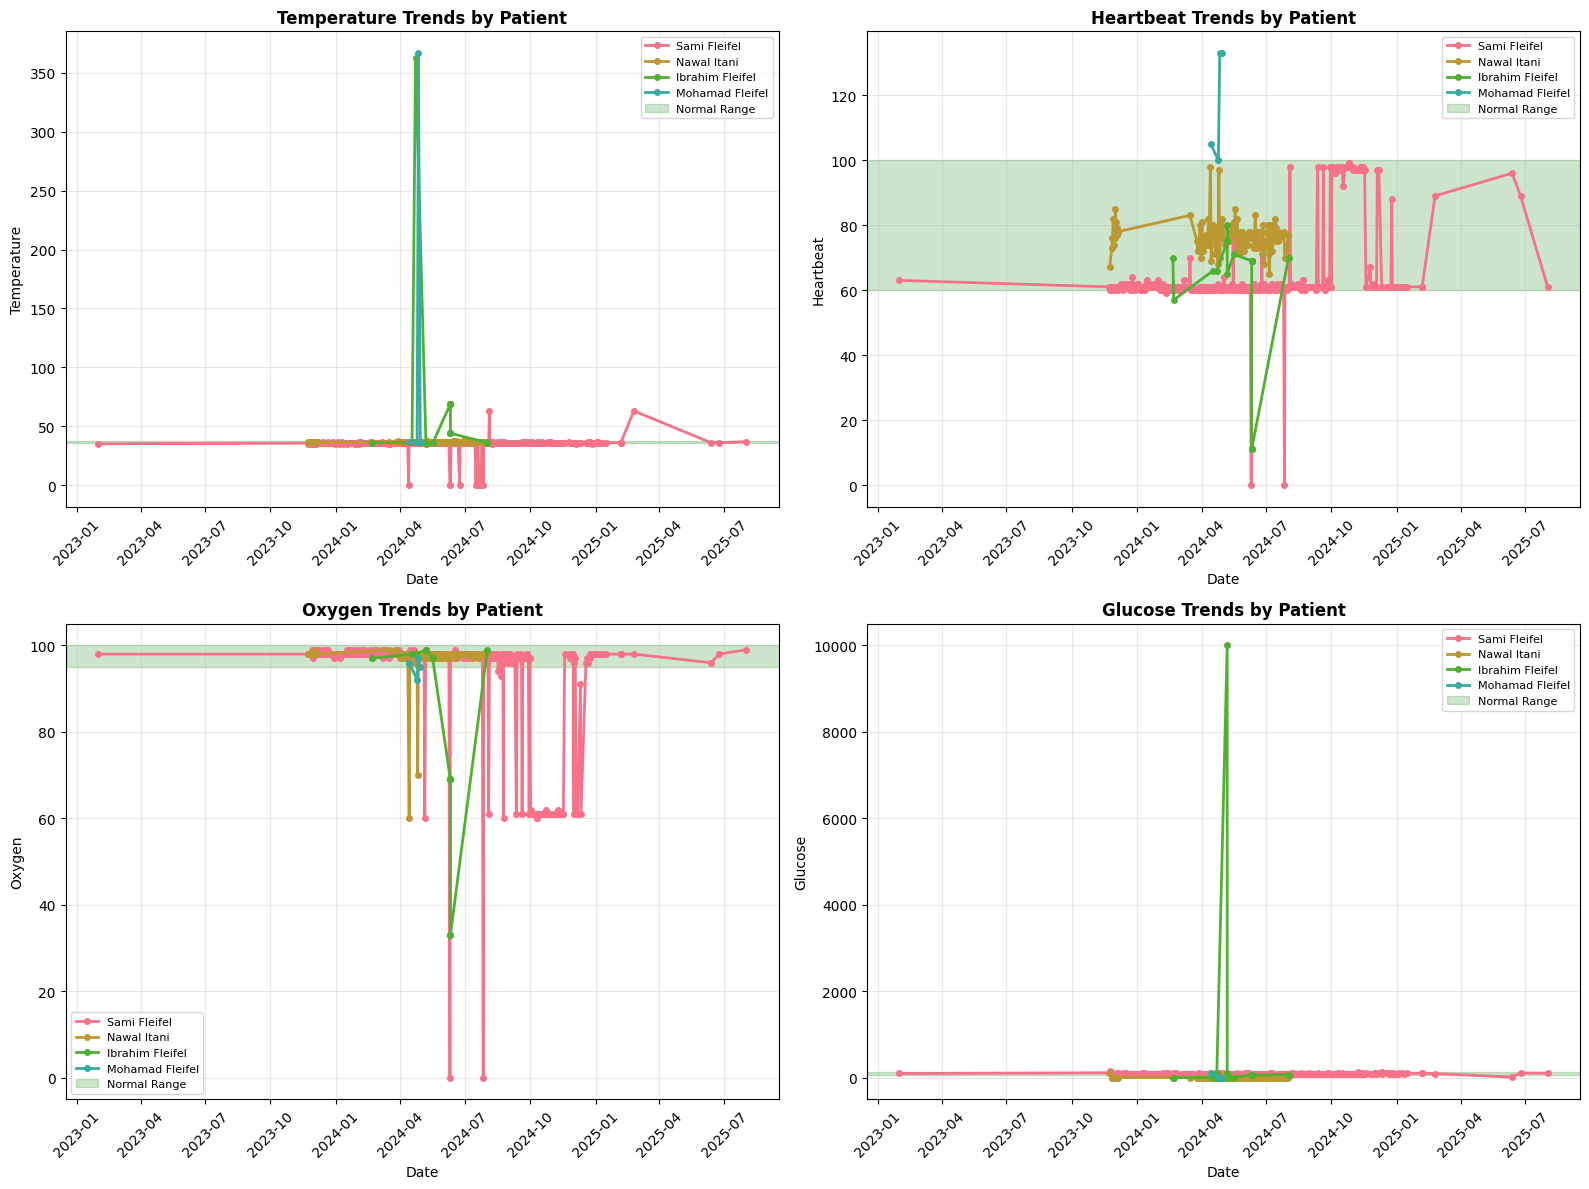


2. Detailed Temperature Trends - Top 6 Monitored Patients
----------------------------------------------------------
   Creating individual patient trend analysis...


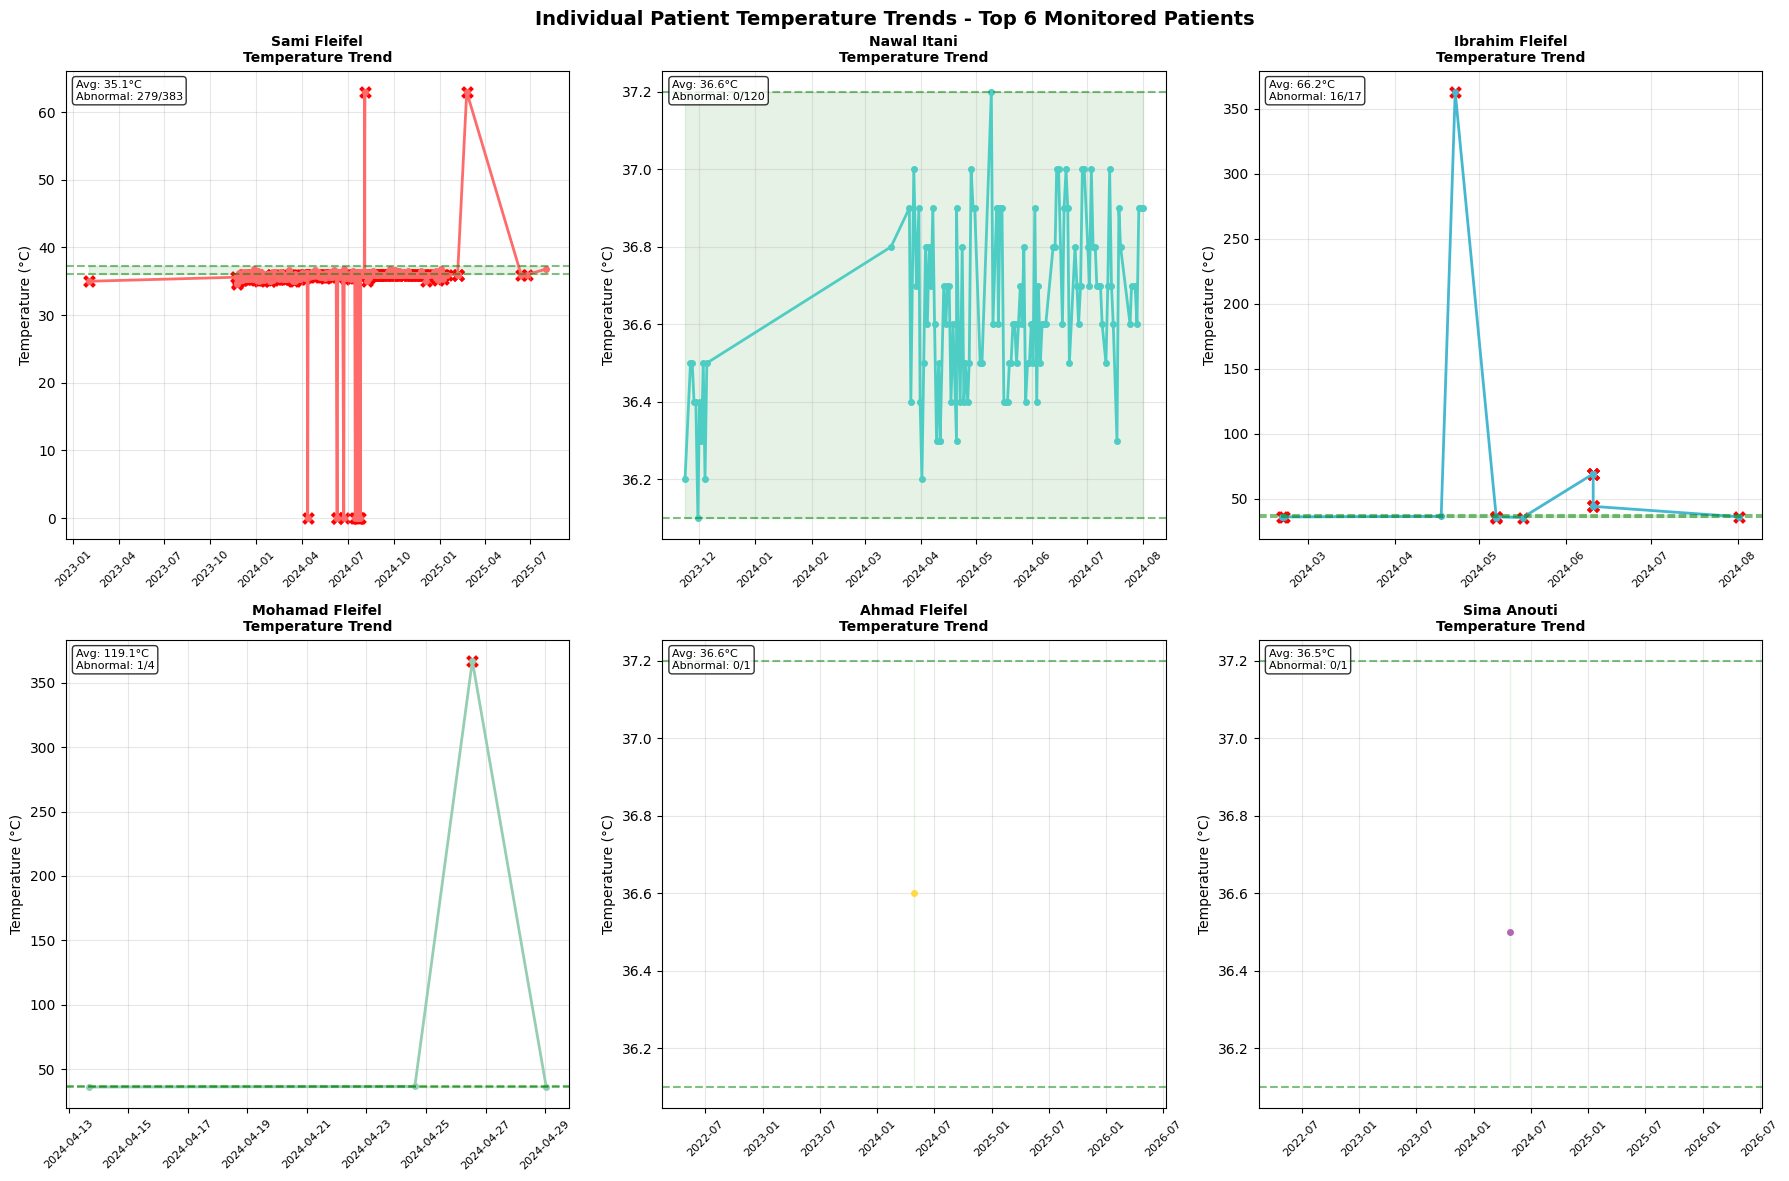


3. Abnormal Vital Signs Prevalence Over Time
---------------------------------------------
   Creating abnormal vital signs prevalence analysis...


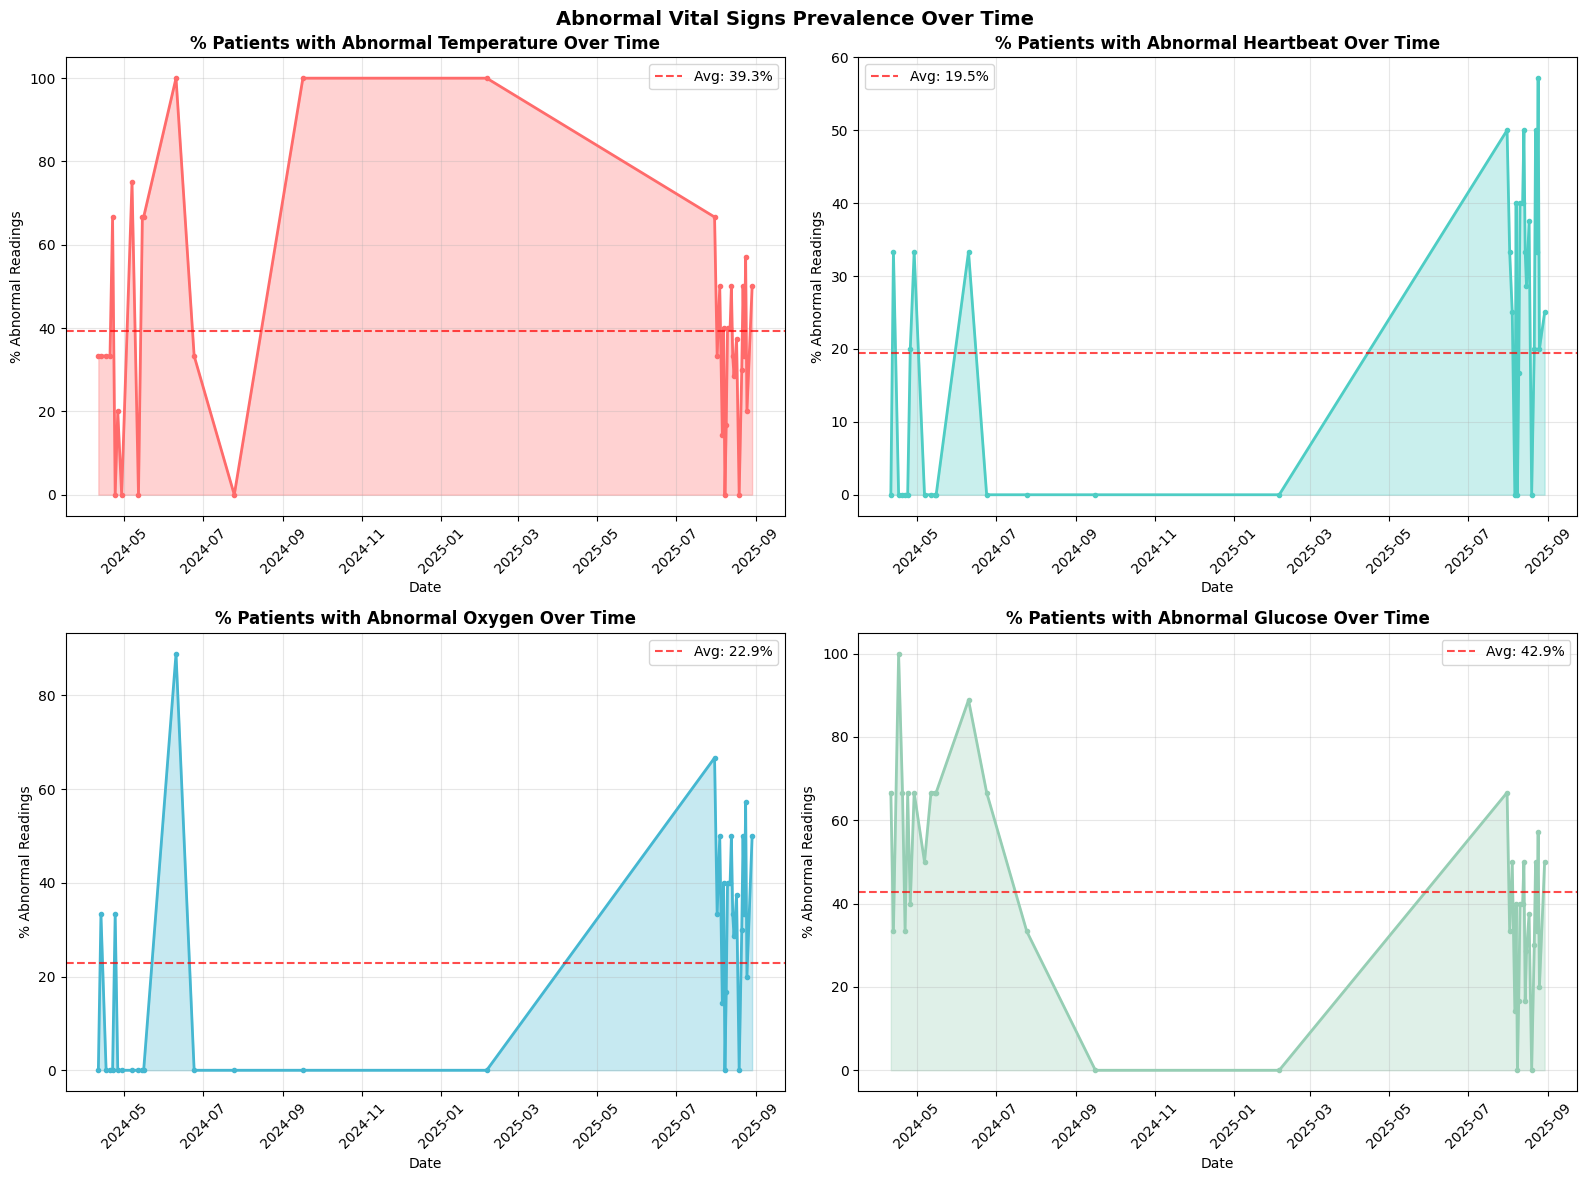

In [ ]:
# =============================================================================
# PATIENT MONITORING ANALYSIS - Vital Trends & Abnormal Readings
# =============================================================================
print_dashed_heading("Patient Monitoring Analysis - Vital Trends & Abnormal Readings")

def analyze_vital_trends():
    """Analyze vital signs trends and identify abnormal readings"""

    print_heading_3("VITAL SIGNS TREND ANALYSIS")

    try:
        # Merge vitals with patient names
        if 'first_name' in patients.columns and 'last_name' in patients.columns:
            vitals_with_names = vitals.merge(
                patients[['id', 'first_name', 'last_name']],
                left_on='patient_id',
                right_on='id',
                how='left'
            )
            vitals_with_names['patient_name'] = vitals_with_names['first_name'] + ' ' + vitals_with_names['last_name']
            # Create patient_names dictionary for the enhanced visualization
            patient_names = dict(zip(vitals_with_names['patient_id'], vitals_with_names['patient_name']))
        else:
            vitals_with_names = vitals.copy()
            vitals_with_names['patient_name'] = 'Patient ' + vitals_with_names['patient_id'].astype(str)
            patient_names = {pid: f'Patient {pid}' for pid in vitals_with_names['patient_id'].unique()}
    except:
        vitals_with_names = vitals.copy()
        vitals_with_names['patient_name'] = 'Patient ' + vitals_with_names['patient_id'].astype(str)
        patient_names = {pid: f'Patient {pid}' for pid in vitals_with_names['patient_id'].unique()}

    # Define normal ranges for vital signs
    normal_ranges = {
        'temperature': (36.1, 37.2),  # Celsius
        'heartbeat': (60, 100),       # BPM
        'oxygen': (95, 100),          # SpO2 percentage
        'glucose': (70, 140)          # mg/dL
    }

    vital_columns = [col for col in normal_ranges.keys() if col in vitals.columns]

    if not vital_columns:
        print("   • No vital sign columns found")
        return

    # Convert created_at to datetime for trend analysis
    vitals_with_names['created_at'] = pd.to_datetime(vitals_with_names['created_at'], errors='coerce')
    vitals_with_names['monitoring_date'] = vitals_with_names['created_at'].dt.date
    vitals_with_names['monitoring_datetime'] = vitals_with_names['created_at']

    # Also add monitoring_datetime to the original vitals dataframe for the new visualization
    vitals['monitoring_datetime'] = pd.to_datetime(vitals['created_at'], errors='coerce')

    print_heading_3("\nABNORMAL READINGS DETECTION")

    abnormal_stats = {}
    for vital in vital_columns:
        if vitals_with_names[vital].notna().any():
            min_normal, max_normal = normal_ranges[vital]

            # Count abnormal readings
            below_normal = (vitals_with_names[vital] < min_normal).sum()
            above_normal = (vitals_with_names[vital] > max_normal).sum()
            total_readings = vitals_with_names[vital].notna().sum()
            abnormal_total = below_normal + above_normal

            abnormal_stats[vital] = {
                'below': below_normal,
                'above': above_normal,
                'total_abnormal': abnormal_total,
                'total_readings': total_readings,
                'abnormal_percentage': (abnormal_total / total_readings) * 100
            }

            print(f"   • {vital.capitalize()}:")
            print(f"     - Below Normal (<{min_normal}): {below_normal:,} ({below_normal/total_readings*100:.1f}%)")
            print(f"     - Above Normal (>{max_normal}): {above_normal:,} ({above_normal/total_readings*100:.1f}%)")
            print(f"     - Total Abnormal: {abnormal_total:,} ({abnormal_total/total_readings*100:.1f}%)")

    # Identify patients with frequent abnormal readings using patient names
    print_heading_3("\nPATIENTS WITH FREQUENT ABNORMAL READINGS")

    for vital in vital_columns:
        if vital in abnormal_stats and abnormal_stats[vital]['total_abnormal'] > 0:
            min_normal, max_normal = normal_ranges[vital]

            # Count abnormal readings per patient with names
            abnormal_data = vitals_with_names[
                (vitals_with_names[vital] < min_normal) | (vitals_with_names[vital] > max_normal)
            ]

            if not abnormal_data.empty:
                patient_abnormal = abnormal_data.groupby(['patient_id', 'patient_name']).size().sort_values(ascending=False)

                print(f"\n   • Top 5 patients with abnormal {vital} readings:")
                for (patient_id, patient_name), count in patient_abnormal.head(5).items():
                    total_readings = vitals_with_names[vitals_with_names['patient_id'] == patient_id][vital].notna().sum()
                    percentage = (count / total_readings) * 100 if total_readings > 0 else 0
                    print(f"     - {patient_name}: {count}/{total_readings} abnormal ({percentage:.1f}%)")

    # =============================================================================
    # ENHANCED ADVANCED VITAL SIGNS VISUALIZATIONS
    # =============================================================================
    print_dashed_heading("Advanced Vital Signs Visualizations")

    # 1. Individual Patient Trends + Annotations
    print_heading_3("1. Individual Patient Vital Trends Over Time")

    # Get patients with substantial vital data
    patient_reading_counts = vitals['patient_id'].value_counts()
    top_patients = patient_reading_counts.head(4).index  # Top 4 patients with most readings

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    vital_names = ['temperature', 'heartbeat', 'oxygen', 'glucose']
    colors_individual = ['red', 'blue', 'green', 'orange']

    for i, vital in enumerate(vital_names):
        if vital in vitals.columns:
            ax = axes[i]

            for j, patient_id in enumerate(top_patients):
                patient_data = vitals[vitals['patient_id'] == patient_id].sort_values('monitoring_datetime')
                patient_name = patient_names.get(patient_id, f"Patient {patient_id}")

                if not patient_data.empty and patient_data[vital].notna().any():
                    ax.plot(patient_data['monitoring_datetime'], patient_data[vital],
                           marker='o', label=patient_name, linewidth=2, markersize=4)

            # Add normal range shading
            if vital in normal_ranges:
                min_val, max_val = normal_ranges[vital]
                ax.axhspan(min_val, max_val, alpha=0.2, color='green', label='Normal Range')

            ax.set_title(f'{vital.capitalize()} Trends by Patient', fontweight='bold', fontsize=12)
            ax.set_ylabel(vital.capitalize())
            ax.set_xlabel('Date')
            ax.legend(fontsize=8)
            ax.grid(True, alpha=0.3)
            ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 2. Individual Patient Trends for Top 6 Most Monitored Patients (Original Advanced Analysis)
    print_heading_3("\n2. Detailed Temperature Trends - Top 6 Monitored Patients")
    print("   Creating individual patient trend analysis...")

    # Get top monitored patients
    patient_monitoring_frequency = vitals_with_names['patient_id'].value_counts()
    top_patients_detailed = patient_monitoring_frequency.head(6).index

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4','#FFDA44', '#B266B2']

    for idx, patient_id in enumerate(top_patients_detailed):
        patient_data = vitals_with_names[vitals_with_names['patient_id'] == patient_id].sort_values('monitoring_datetime')
        patient_name = patient_data['patient_name'].iloc[0] if not patient_data.empty else f'Patient {patient_id}'

        # Plot temperature trend (most critical vital)
        if 'temperature' in vital_columns and patient_data['temperature'].notna().any():
            temp_data = patient_data.dropna(subset=['temperature'])

            axes[idx].plot(temp_data['monitoring_datetime'], temp_data['temperature'],
                          marker='o', color=colors[idx], linewidth=2, markersize=4)

            # Add normal range
            axes[idx].axhline(y=36.1, color='green', linestyle='--', alpha=0.5, label='Normal Range')
            axes[idx].axhline(y=37.2, color='green', linestyle='--', alpha=0.5)
            axes[idx].fill_between(temp_data['monitoring_datetime'], 36.1, 37.2, alpha=0.1, color='green')

            # Highlight abnormal readings
            abnormal_temp = temp_data[(temp_data['temperature'] < 36.1) | (temp_data['temperature'] > 37.2)]
            if not abnormal_temp.empty:
                axes[idx].scatter(abnormal_temp['monitoring_datetime'], abnormal_temp['temperature'],
                                color='red', s=50, marker='x', linewidth=3, label='Abnormal')

            axes[idx].set_title(f'{patient_name}\nTemperature Trend', fontweight='bold', fontsize=10)
            axes[idx].set_ylabel('Temperature (°C)')
            axes[idx].grid(True, alpha=0.3)
            axes[idx].tick_params(axis='x', rotation=45, labelsize=8)

            # Add statistics
            avg_temp = temp_data['temperature'].mean()
            abnormal_count = len(abnormal_temp)
            total_readings = len(temp_data)
            axes[idx].text(0.02, 0.98, f'Avg: {avg_temp:.1f}°C\nAbnormal: {abnormal_count}/{total_readings}',
                          transform=axes[idx].transAxes, verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=8)

    plt.suptitle('Individual Patient Temperature Trends - Top 6 Monitored Patients', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 3. Proportion Outside Normal Range Over Time
    print_heading_3("\n3. Abnormal Vital Signs Prevalence Over Time")
    print("   Creating abnormal vital signs prevalence analysis...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for idx, vital in enumerate(vital_columns[:4]):
        if vitals_with_names[vital].notna().any():
            min_normal, max_normal = normal_ranges[vital]

            # Group by date and calculate percentage abnormal
            daily_stats = vitals_with_names.groupby('monitoring_date').agg({
                vital: ['count', lambda x: ((x < min_normal) | (x > max_normal)).sum()]
            }).round(2)

            daily_stats.columns = ['total_readings', 'abnormal_readings']
            daily_stats['abnormal_percentage'] = (daily_stats['abnormal_readings'] / daily_stats['total_readings']) * 100
            daily_stats = daily_stats[daily_stats['total_readings'] >= 3]  # Only days with 3+ readings

            if not daily_stats.empty:
                axes[idx].plot(daily_stats.index, daily_stats['abnormal_percentage'],
                              marker='o', linewidth=2, markersize=3, color=colors[idx])
                axes[idx].fill_between(daily_stats.index, 0, daily_stats['abnormal_percentage'],
                                      alpha=0.3, color=colors[idx])

                axes[idx].set_title(f'% Patients with Abnormal {vital.capitalize()} Over Time', fontweight='bold')
                axes[idx].set_ylabel('% Abnormal Readings')
                axes[idx].set_xlabel('Date')
                axes[idx].grid(True, alpha=0.3)
                axes[idx].tick_params(axis='x', rotation=45)

                # Add average line
                avg_abnormal = daily_stats['abnormal_percentage'].mean()
                axes[idx].axhline(y=avg_abnormal, color='red', linestyle='--', alpha=0.7,
                                 label=f'Avg: {avg_abnormal:.1f}%')
                axes[idx].legend()

    # Hide unused subplots
    for i in range(len(vital_columns), 4):
        axes[i].set_visible(False)

    plt.suptitle('Abnormal Vital Signs Prevalence Over Time', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Execute the analysis
analyze_vital_trends()

# **Phase 2: 2. Medication analysis - Most prescribed, adherence, interactions**


          Phase 2: Part 2: Medication Analysis - Most Prescribed, Adherence, Interactions           

Tables:
--------
   • drug_patient: 186 entries
   • drug_records: 2 entries
   • drugs: 32 entries
   • patients: 45 entries

      Note: drug-patients assignments are considered the current active medications (what patients are currently taking), while drug-records is for the prescriptions 

      5.1 Most Prescribed Medications Analysis 
DRUG-PATIENT ASSIGNMENTS (Current Active Medications)
-----------------------------------------------------
   • Total Drug-Patient Assignments: 186
   • Unique Drugs Assigned: 32
   • Unique Patients with Assigned Drugs: 44

TOP 10 MOST MEDICATIONS TAKEN BY PATIENTS (Current Active):
------------------------------------------------------------
    1. Amlor (Amlodipine) - tablet
       Prescribed to: 10 patients
    2. MenaQ-7 (Menaquinone-7) - tablet
       Prescribed to: 9 patients
    3. AUGMENTIN (amoxicilline et acide clavulanique.) - tablet
 

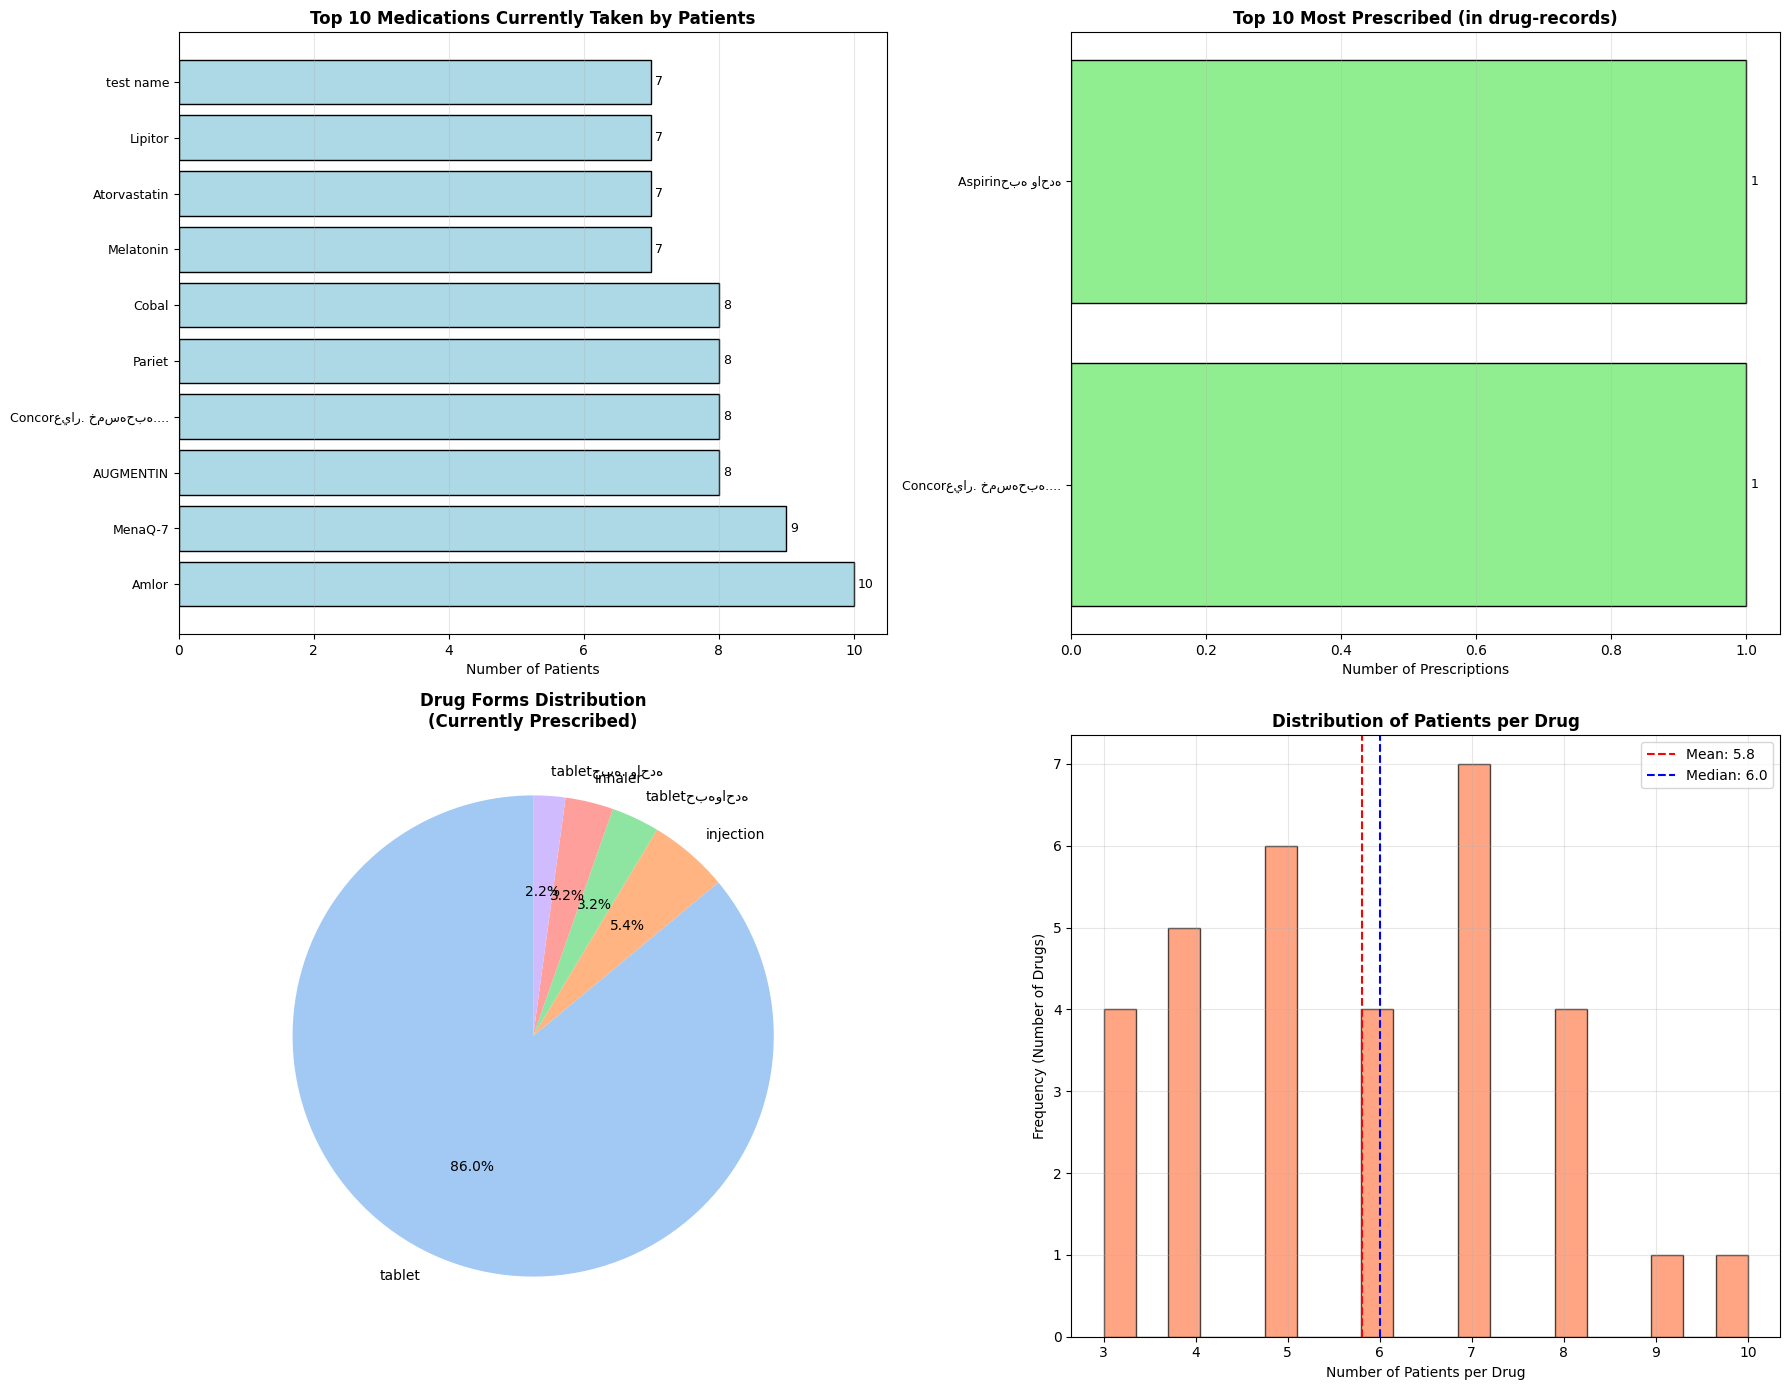


      5.3 Drug-Drug Interactions Analysis 
POTENTIAL DRUG INTERACTIONS DETECTION
-------------------------------------

PATIENTS ON MULTIPLE MEDICATIONS:
----------------------------------
   • Patients on 1 medication: 4
   • Patients on 2-4 medications: 26
   • Patients on 5+ medications: 14
   • Maximum medications per patient: 20

TOP 10 PATIENTS WITH MOST MEDICATIONS:
---------------------------------------
   • Sami Fleifel: 20 medications
   • Ahmad Fleifel: 15 medications
   • Dina Marwani: 9 medications
   • Maryam Omar: 7 medications
   • Omar Mohammad: 6 medications
   • Dina Itani: 6 medications
   • Ibrahim Omar: 6 medications
   • Fadi Badran: 6 medications
   • Samir Fleifel: 6 medications
   • Mohamad Fleifel: 5 medications

DRUG INTERACTION ANALYSIS:
---------------------------

   POTENTIAL DRUG INTERACTIONS FOUND:
--------------------------------------
   • Sami Fleifel:
     - Drugs: Acetylsalicylic acid + Sulodexide
     - Risk: Aspirin + Anticoagulant - Increased

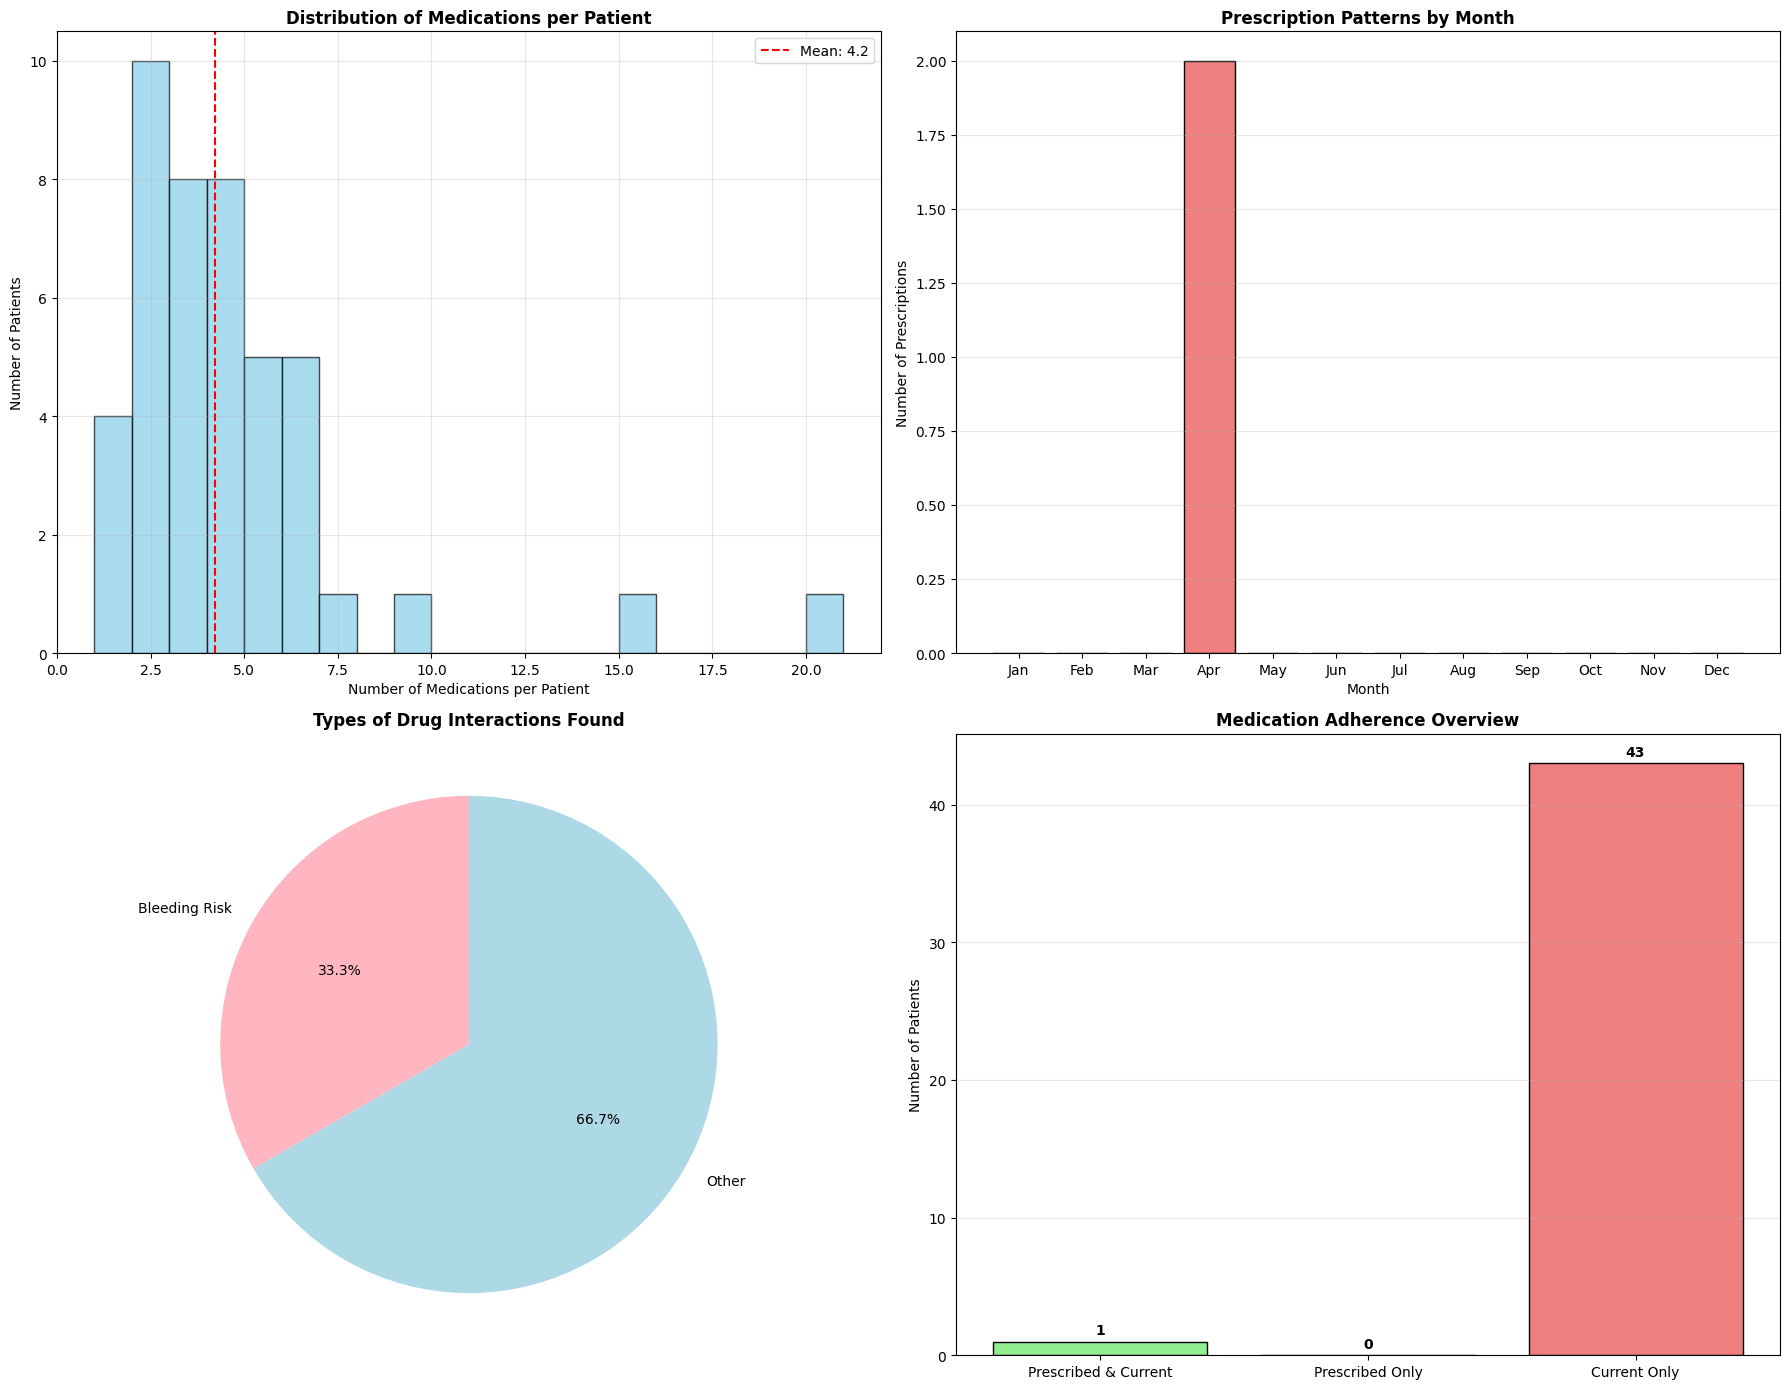


                                 MEDICATION ANALYSIS SUMMARY REPORT                                 
KEY FINDINGS:
-------------
    CURRENT MEDICATIONS:
   • Total active drug assignments: 186
   • Patients on multiple medications: 40
   • Most medications per patient: 20

    PRESCRIPTION HISTORY:
   • Total prescription records: 2
   • Unique drugs prescribed: 2

     DRUG INTERACTIONS:
   • Potential interactions found: 3
   • Patients at risk: 2

    ADHERENCE INSIGHTS:
   • Basic adherence rate: 100.0%
   • Patients needing follow-up: 0

                                    Medication Analysis Complete                                    


In [ ]:
# =============================================================================
# 5. MEDICATION ANALYSIS - Most Prescribed, Adherence, Interactions
# =============================================================================
print_header("Phase 2: Part 2: Medication Analysis - Most Prescribed, Adherence, Interactions")

print_heading_3("\nTables:")
print(f"   • drug_patient: {len(drug_patient):,} entries")
print(f"   • drug_records: {len(drug_records):,} entries")
print(f"   • drugs: {len(drugs):,} entries")
print(f"   • patients: {len(patients):,} entries")
print_dashed_heading("Note: drug-patients assignments are considered the current active medications (what patients are currently taking), while drug-records is for the prescriptions")
# =============================================================================
# 5.1 MOST PRESCRIBED MEDICATIONS ANALYSIS
# =============================================================================
print_dashed_heading("5.1 Most Prescribed Medications Analysis")

print_heading_3("DRUG-PATIENT ASSIGNMENTS (Current Active Medications)")

# Analyze drug-patient relationships
if not drug_patient.empty:
    # Most prescribed medications from drug_patient table
    drug_patient_counts = drug_patient['drug_id'].value_counts()

    # Merge with drug names
    most_prescribed_current = drug_patient_counts.reset_index()
    most_prescribed_current.columns = ['drug_id', 'patient_count']
    most_prescribed_current = most_prescribed_current.merge(
        drugs[['id', 'name', 'generic_name', 'form']],
        left_on='drug_id',
        right_on='id',
        how='left'
    )

    print(f"   • Total Drug-Patient Assignments: {len(drug_patient):,}")
    print(f"   • Unique Drugs Assigned: {drug_patient['drug_id'].nunique():,}")
    print(f"   • Unique Patients with Assigned Drugs: {drug_patient['patient_id'].nunique():,}")

    print_heading_3("\nTOP 10 MOST MEDICATIONS TAKEN BY PATIENTS (Current Active):")
    for idx, row in most_prescribed_current.head(10).iterrows():
        drug_name = row['name'] if pd.notna(row['name']) else f"Drug ID {row['drug_id']}"
        generic_name = row['generic_name'] if pd.notna(row['generic_name']) else "Unknown"
        form = row['form'] if pd.notna(row['form']) else "Unknown"
        print(f"   {idx+1:2d}. {drug_name} ({generic_name}) - {form}")
        print(f"       Prescribed to: {row['patient_count']:,} patients")

# Analyze drug records (prescription history)
print_heading_3("\nDRUG RECORDS (Prescription History- Based on drug-records table)")

if not drug_records.empty:
    # Most prescribed medications from drug_records table
    drug_records_counts = drug_records['drug_id'].value_counts()

    # Merge with drug names
    most_prescribed_records = drug_records_counts.reset_index()
    most_prescribed_records.columns = ['drug_id', 'prescription_count']
    most_prescribed_records = most_prescribed_records.merge(
        drugs[['id', 'name', 'generic_name', 'form']],
        left_on='drug_id',
        right_on='id',
        how='left'
    )

    print(f"   • Total Prescription Records: {len(drug_records):,}")
    print(f"   • Unique Drugs in Records: {drug_records['drug_id'].nunique():,}")
    print(f"   • Unique Patients in Records: {drug_records['patient_id'].nunique():,}")

    print_heading_3("\nMOST PRESCRIBED MEDICATIONS (Based on Drug Records):")
    for idx, row in most_prescribed_records.head(10).iterrows():
        drug_name = row['name'] if pd.notna(row['name']) else f"Drug ID {row['drug_id']}"
        generic_name = row['generic_name'] if pd.notna(row['generic_name']) else "Unknown"
        form = row['form'] if pd.notna(row['form']) else "Unknown"
        print(f"   {idx+1:2d}. {drug_name} ({generic_name}) - {form}")
        print(f"       Total Prescriptions: {row['prescription_count']:,}")

# =============================================================================
# 5.2 MEDICATION VISUALIZATIONS
# =============================================================================
print_dashed_heading("5.2 Medication Prescription Visualizations")

# Create comprehensive medication visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Top 10 Currently Prescribed Medications
if not drug_patient.empty:
    ax1 = axes[0, 0]
    top_current = most_prescribed_current.head(10)
    bars1 = ax1.barh(range(len(top_current)), top_current['patient_count'],
                     color='lightblue', edgecolor='black')
    ax1.set_yticks(range(len(top_current)))
    ax1.set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                        for name in top_current['name'].fillna('Unknown')], fontsize=9)
    ax1.set_xlabel('Number of Patients')
    ax1.set_title('Top 10 Medications Currently Taken by Patients', fontweight='bold', fontsize=12)
    ax1.grid(True, axis='x', alpha=0.3)

    # Add value labels
    for i, bar in enumerate(bars1):
        width = bar.get_width()
        ax1.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height()/2),
                    xytext=(3, 0), textcoords="offset points", ha='left', va='center', fontsize=9)

# 2. Top 10 Historical Prescriptions
if not drug_records.empty:
    ax2 = axes[0, 1]
    top_records = most_prescribed_records.head(10)
    bars2 = ax2.barh(range(len(top_records)), top_records['prescription_count'],
                     color='lightgreen', edgecolor='black')
    ax2.set_yticks(range(len(top_records)))
    ax2.set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                        for name in top_records['name'].fillna('Unknown')], fontsize=9)
    ax2.set_xlabel('Number of Prescriptions')
    ax2.set_title('Top 10 Most Prescribed (in drug-records)', fontweight='bold', fontsize=12)
    ax2.grid(True, axis='x', alpha=0.3)

    # Add value labels
    for i, bar in enumerate(bars2):
        width = bar.get_width()
        ax2.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height()/2),
                    xytext=(3, 0), textcoords="offset points", ha='left', va='center', fontsize=9)

# 3. Drug Form Distribution (Current Prescriptions)
if not drug_patient.empty:
    ax3 = axes[1, 0]
    # Get forms of currently prescribed drugs
    current_drug_forms = drug_patient.merge(
        drugs[['id', 'form']], left_on='drug_id', right_on='id', how='left'
    )['form'].value_counts()

    wedges, texts, autotexts = ax3.pie(current_drug_forms.values,
                                      labels=current_drug_forms.index,
                                      autopct='%1.1f%%', startangle=90,
                                      colors=sns.color_palette("pastel"))
    ax3.set_title('Drug Forms Distribution\n(Currently Prescribed)', fontweight='bold', fontsize=12)

# 4. Patients per Drug Distribution
ax4 = axes[1, 1]
if not drug_patient.empty:
    patients_per_drug = drug_patient['drug_id'].value_counts()
    ax4.hist(patients_per_drug.values, bins=20, color='coral', edgecolor='black', alpha=0.7)
    ax4.set_xlabel('Number of Patients per Drug')
    ax4.set_ylabel('Frequency (Number of Drugs)')
    ax4.set_title('Distribution of Patients per Drug', fontweight='bold', fontsize=12)
    ax4.grid(True, alpha=0.3)

    # Add statistics
    ax4.axvline(patients_per_drug.mean(), color='red', linestyle='--',
               label=f'Mean: {patients_per_drug.mean():.1f}')
    ax4.axvline(patients_per_drug.median(), color='blue', linestyle='--',
               label=f'Median: {patients_per_drug.median():.1f}')
    ax4.legend()

plt.tight_layout()
plt.show()

# =============================================================================
# 5.3 DRUG-DRUG INTERACTIONS ANALYSIS
# =============================================================================
print_dashed_heading("5.3 Drug-Drug Interactions Analysis")

print_heading_3("POTENTIAL DRUG INTERACTIONS DETECTION")

# Define known dangerous drug combinations based on the uploaded drugs
dangerous_combinations = {
    # Blood pressure medications + Heart medications
    ('Bisoprolol', 'Amlodipine'): "Beta-blocker + Calcium channel blocker - Monitor BP carefully",
    ('Bisoprolol', 'Irbesartan'): "Beta-blocker + ARB - Enhanced hypotensive effect",
    ('Amlodipine', 'Irbesartan'): "Calcium channel blocker + ARB - Additive hypotensive effect",

    # Diabetes medications
    ('Metformin', 'Insulin glargine'): "Monitor for hypoglycemia - Enhanced glucose lowering",
    ('Dulaglutide', 'Insulin glargine'): "GLP-1 agonist + Insulin - Risk of hypoglycemia",
    ('Metformin', 'Dulaglutide'): "Monitor glucose levels - Enhanced effect",

    # Anticoagulants/Blood thinners
    ('Acetylsalicylic acid', 'Sulodexide'): "Aspirin + Anticoagulant - Increased bleeding risk",

    # Respiratory medications
    ('Montelukast', 'Symbicort'): "Generally safe but monitor respiratory status",

    # Psychiatric medications with others
    ('Escitalopram', 'Melatonin'): "SSRI + Melatonin - Monitor for serotonin effects",

    # Antibiotics considerations
    ('Ciprofloxacine', 'Warfarin'): "Fluoroquinolone increases anticoagulant effect",
    ('Clindamycine', 'Ciprofloxacine'): "Monitor for C. difficile with multiple antibiotics",
}

# Get patients taking multiple medications
print_heading_3("\nPATIENTS ON MULTIPLE MEDICATIONS:")

if not drug_patient.empty:
    # Count medications per patient
    patient_drug_counts = drug_patient['patient_id'].value_counts().sort_values(ascending=False)

    print(f"   • Patients on 1 medication: {(patient_drug_counts == 1).sum():,}")
    print(f"   • Patients on 2-4 medications: {((patient_drug_counts >= 2) & (patient_drug_counts <= 4)).sum():,}")
    print(f"   • Patients on 5+ medications: {(patient_drug_counts >= 5).sum():,}")
    print(f"   • Maximum medications per patient: {patient_drug_counts.max()}")

    # Get patients with multiple medications for interaction analysis
    multi_med_patients = patient_drug_counts[patient_drug_counts >= 2].index

    print_heading_3(f"\nTOP 10 PATIENTS WITH MOST MEDICATIONS:")

    # Merge with patient names if available
    if 'first_name' in patients.columns and 'last_name' in patients.columns:
        patient_names = patients[['id', 'first_name', 'last_name']].copy()
        patient_names['full_name'] = patient_names['first_name'] + ' ' + patient_names['last_name']
        patient_name_dict = dict(zip(patient_names['id'], patient_names['full_name']))
    else:
        patient_name_dict = {}

    for patient_id in patient_drug_counts.head(10).index:
        patient_name = patient_name_dict.get(patient_id, f"Patient {patient_id}")
        med_count = patient_drug_counts[patient_id]
        print(f"   • {patient_name}: {med_count} medications")

# Analyze specific drug combinations
print_heading_3("\nDRUG INTERACTION ANALYSIS:")

interaction_findings = []

if not drug_patient.empty:
    # Get all drug combinations for each patient
    for patient_id in multi_med_patients[:20]:  # Analyze top 20 patients with multiple meds
        patient_drugs = drug_patient[drug_patient['patient_id'] == patient_id]['drug_id'].tolist()

        # Get drug names for this patient
        patient_drug_info = drugs[drugs['id'].isin(patient_drugs)][['id', 'name', 'generic_name']]

        # Check all combinations of drugs for this patient
        for i in range(len(patient_drug_info)):
            for j in range(i+1, len(patient_drug_info)):
                drug1_name = patient_drug_info.iloc[i]['generic_name']
                drug2_name = patient_drug_info.iloc[j]['generic_name']

                if pd.isna(drug1_name): drug1_name = patient_drug_info.iloc[i]['name']
                if pd.isna(drug2_name): drug2_name = patient_drug_info.iloc[j]['name']

                # Check for known interactions
                combination = tuple(sorted([drug1_name, drug2_name]))
                reverse_combination = tuple(sorted([drug2_name, drug1_name]))

                if combination in dangerous_combinations:
                    patient_name = patient_name_dict.get(patient_id, f"Patient {patient_id}")
                    interaction_findings.append({
                        'patient_id': patient_id,
                        'patient_name': patient_name,
                        'drug1': drug1_name,
                        'drug2': drug2_name,
                        'interaction': dangerous_combinations[combination]
                    })
                elif reverse_combination in dangerous_combinations:
                    patient_name = patient_name_dict.get(patient_id, f"Patient {patient_id}")
                    interaction_findings.append({
                        'patient_id': patient_id,
                        'patient_name': patient_name,
                        'drug1': drug1_name,
                        'drug2': drug2_name,
                        'interaction': dangerous_combinations[reverse_combination]
                    })

# Display interaction findings
if interaction_findings:
    print_heading_3(f"\n   POTENTIAL DRUG INTERACTIONS FOUND:")
    for finding in interaction_findings:
        print(f"   • {finding['patient_name']}:")
        print(f"     - Drugs: {finding['drug1']} + {finding['drug2']}")
        print(f"     - Risk: {finding['interaction']}")
        print()
else:
    print("   • No major drug interactions detected in the analyzed sample")
    print("   • Note: Analysis limited to known dangerous combinations")

# =============================================================================
# 5.4 MEDICATION ADHERENCE ANALYSIS
# =============================================================================
print_dashed_heading("5.4 Medication Adherence Analysis")

print_heading_3("PRESCRIPTION vs CURRENT MEDICATION ANALYSIS")

# Compare drug_records (what was prescribed) vs drug_patient (what patient is currently on)
if not drug_records.empty and not drug_patient.empty:

    # Patients in both tables (prescribed and currently taking)
    prescribed_patients = set(drug_records['patient_id'].unique())
    current_patients = set(drug_patient['patient_id'].unique())

    patients_both = prescribed_patients.intersection(current_patients)
    patients_prescribed_only = prescribed_patients - current_patients
    patients_current_only = current_patients - prescribed_patients

    print(f"   • Patients with prescriptions: {len(prescribed_patients):,}")
    print(f"   • Patients currently on medications: {len(current_patients):,}")
    print(f"   • Patients in both (adherent): {len(patients_both):,}")
    print(f"   • Patients that have prescriptions but are not currrently taking any medications: {len(patients_prescribed_only):,}")
    print(f"   • Patients current taking any medications but no prescription record: {len(patients_current_only):,}")

    # Adherence rate calculation
    adherence_rate = len(patients_both) / len(prescribed_patients) * 100 if prescribed_patients else 0
    print(f"   • Basic Adherence Rate: {adherence_rate:.1f}% (Adherence % shows % of patients who have a prescription record are also in the current medications table)")

# Timing analysis of prescriptions
if 'created_at' in drug_records.columns:
    print_heading_3("\nPRESCRIPTION TIMING PATTERNS:")

    drug_records['created_at'] = pd.to_datetime(drug_records['created_at'], errors='coerce')
    drug_records['prescription_year'] = drug_records['created_at'].dt.year
    drug_records['prescription_month'] = drug_records['created_at'].dt.month

    # Prescription trends by year
    yearly_prescriptions = drug_records['prescription_year'].value_counts().sort_index()
    print(f"   • Prescription period: {yearly_prescriptions.index.min()} - {yearly_prescriptions.index.max()}")
    print(f"   • Peak prescription year: {yearly_prescriptions.idxmax()} ({yearly_prescriptions.max():,} prescriptions)")

    # Monthly patterns
    monthly_prescriptions = drug_records['prescription_month'].value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# =============================================================================
# 5.5 MEDICATION ANALYSIS VISUALIZATIONS
# =============================================================================
print_dashed_heading("5.5 Medication Analysis Visualizations")

# Create comprehensive medication analysis visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Medications per Patient Distribution
ax1 = axes[0, 0]
if not drug_patient.empty:
    med_per_patient = drug_patient['patient_id'].value_counts()
    ax1.hist(med_per_patient.values, bins=range(1, med_per_patient.max()+2),
             color='skyblue', edgecolor='black', alpha=0.7)
    ax1.set_xlabel('Number of Medications per Patient')
    ax1.set_ylabel('Number of Patients')
    ax1.set_title('Distribution of Medications per Patient', fontweight='bold', fontsize=12)
    ax1.grid(True, alpha=0.3)

    # Add statistics
    mean_meds = med_per_patient.mean()
    ax1.axvline(mean_meds, color='red', linestyle='--', label=f'Mean: {mean_meds:.1f}')
    ax1.legend()

# 2. Prescription Timeline
ax2 = axes[0, 1]
if 'created_at' in drug_records.columns and not drug_records.empty:
    monthly_prescriptions = drug_records.groupby('prescription_month').size()
    month_names_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    bars = ax2.bar(range(1, 13), [monthly_prescriptions.get(i, 0) for i in range(1, 13)],
                   color='lightcoral', edgecolor='black')
    ax2.set_xticks(range(1, 13))
    ax2.set_xticklabels(month_names_short)
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Number of Prescriptions')
    ax2.set_title('Prescription Patterns by Month', fontweight='bold', fontsize=12)
    ax2.grid(True, axis='y', alpha=0.3)

# 3. Drug Interaction Risk Levels
ax3 = axes[1, 0]
if interaction_findings:
    # Count interaction types
    interaction_types = {}
    for finding in interaction_findings:
        interaction = finding['interaction']
        if 'hypotensive' in interaction.lower() or 'bp' in interaction.lower():
            interaction_types['Blood Pressure'] = interaction_types.get('Blood Pressure', 0) + 1
        elif 'glucose' in interaction.lower() or 'hypoglycemia' in interaction.lower():
            interaction_types['Glucose/Diabetes'] = interaction_types.get('Glucose/Diabetes', 0) + 1
        elif 'bleeding' in interaction.lower():
            interaction_types['Bleeding Risk'] = interaction_types.get('Bleeding Risk', 0) + 1
        else:
            interaction_types['Other'] = interaction_types.get('Other', 0) + 1

    colors_pie = ['#FFB6C1', '#ADD8E6', '#90EE90', '#DDA0DD']
    wedges, texts, autotexts = ax3.pie(interaction_types.values(),
                                      labels=interaction_types.keys(),
                                      autopct='%1.1f%%', startangle=90,
                                      colors=colors_pie[:len(interaction_types)])
    ax3.set_title('Types of Drug Interactions Found', fontweight='bold', fontsize=12)
else:
    ax3.text(0.5, 0.5, 'No major drug\ninteractions detected\nin analyzed sample',
             ha='center', va='center', transform=ax3.transAxes, fontsize=14,
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    ax3.set_title('Drug Interaction Analysis', fontweight='bold', fontsize=12)

# 4. Adherence Analysis
ax4 = axes[1, 1]
if not drug_records.empty and not drug_patient.empty:
    adherence_data = {
        'Prescribed & Current': len(patients_both),
        'Prescribed Only': len(patients_prescribed_only),
        'Current Only': len(patients_current_only)
    }

    colors_adherence = ['lightgreen', 'orange', 'lightcoral']
    bars = ax4.bar(adherence_data.keys(), adherence_data.values(),
                   color=colors_adherence, edgecolor='black')
    ax4.set_ylabel('Number of Patients')
    ax4.set_title('Medication Adherence Overview', fontweight='bold', fontsize=12)
    ax4.grid(True, axis='y', alpha=0.3)

    # Add value labels on bars
    for bar, value in zip(bars, adherence_data.values()):
        ax4.annotate(f'{value}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom',
                    fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# SUMMARY REPORT
# =============================================================================
print_header("MEDICATION ANALYSIS SUMMARY REPORT")

print_heading_3("KEY FINDINGS:")

if not drug_patient.empty:
    print(f"    CURRENT MEDICATIONS:")
    print(f"   • Total active drug assignments: {len(drug_patient):,}")
    print(f"   • Patients on multiple medications: {(patient_drug_counts >= 2).sum():,}")
    print(f"   • Most medications per patient: {patient_drug_counts.max()}")

if not drug_records.empty:
    print(f"\n    PRESCRIPTION HISTORY:")
    print(f"   • Total prescription records: {len(drug_records):,}")
    print(f"   • Unique drugs prescribed: {drug_records['drug_id'].nunique():,}")

if interaction_findings:
    print(f"\n     DRUG INTERACTIONS:")
    print(f"   • Potential interactions found: {len(interaction_findings)}")
    print(f"   • Patients at risk: {len(set(f['patient_id'] for f in interaction_findings))}")

if not drug_records.empty and not drug_patient.empty:
    print(f"\n    ADHERENCE INSIGHTS:")
    print(f"   • Basic adherence rate: {adherence_rate:.1f}%")
    print(f"   • Patients needing follow-up: {len(patients_prescribed_only):,}")

print_header("Medication Analysis Complete")

# **Phase 2: 3. Doctor performance - Visits, consultation time, case types**


            Phase 2: Doctor Performance Analysis - Visits, Consultation Time, Case Types            

Tables:
--------
   • doctors: 18 entries
   • appointments: 220 entries
   • surgeries: 45 entries
   • doctor_hospital: 33 entries
   • medical_tests: 63 entries

      1. Doctor Workload Analysis 
APPOINTMENT ANALYSIS
--------------------
   • Total Appointments: 220
   • Unique Doctors with Appointments: 18
   • Unique Patients with Appointments: 138
   • Average Appointments per Doctor: 12.2

TOP 10 DOCTORS BY APPOINTMENT VOLUME:
--------------------------------------
    1. Dr. Omar Fares (Cardiac Surgery)
       Total Appointments: 18
    2. Dr. Nour Ahmad (Radiology)
       Total Appointments: 16
    3. Dr. Ibrahim Itani (Radiology)
       Total Appointments: 15
    4. Dr. Ahmad Khalil (Cardiology)
       Total Appointments: 15
    5. Dr. Hassan Nour (General Surgery)
       Total Appointments: 15
    6. Dr. Mahmoud Khalil (Neurology)
       Total Appointments: 15
    7. Dr. M

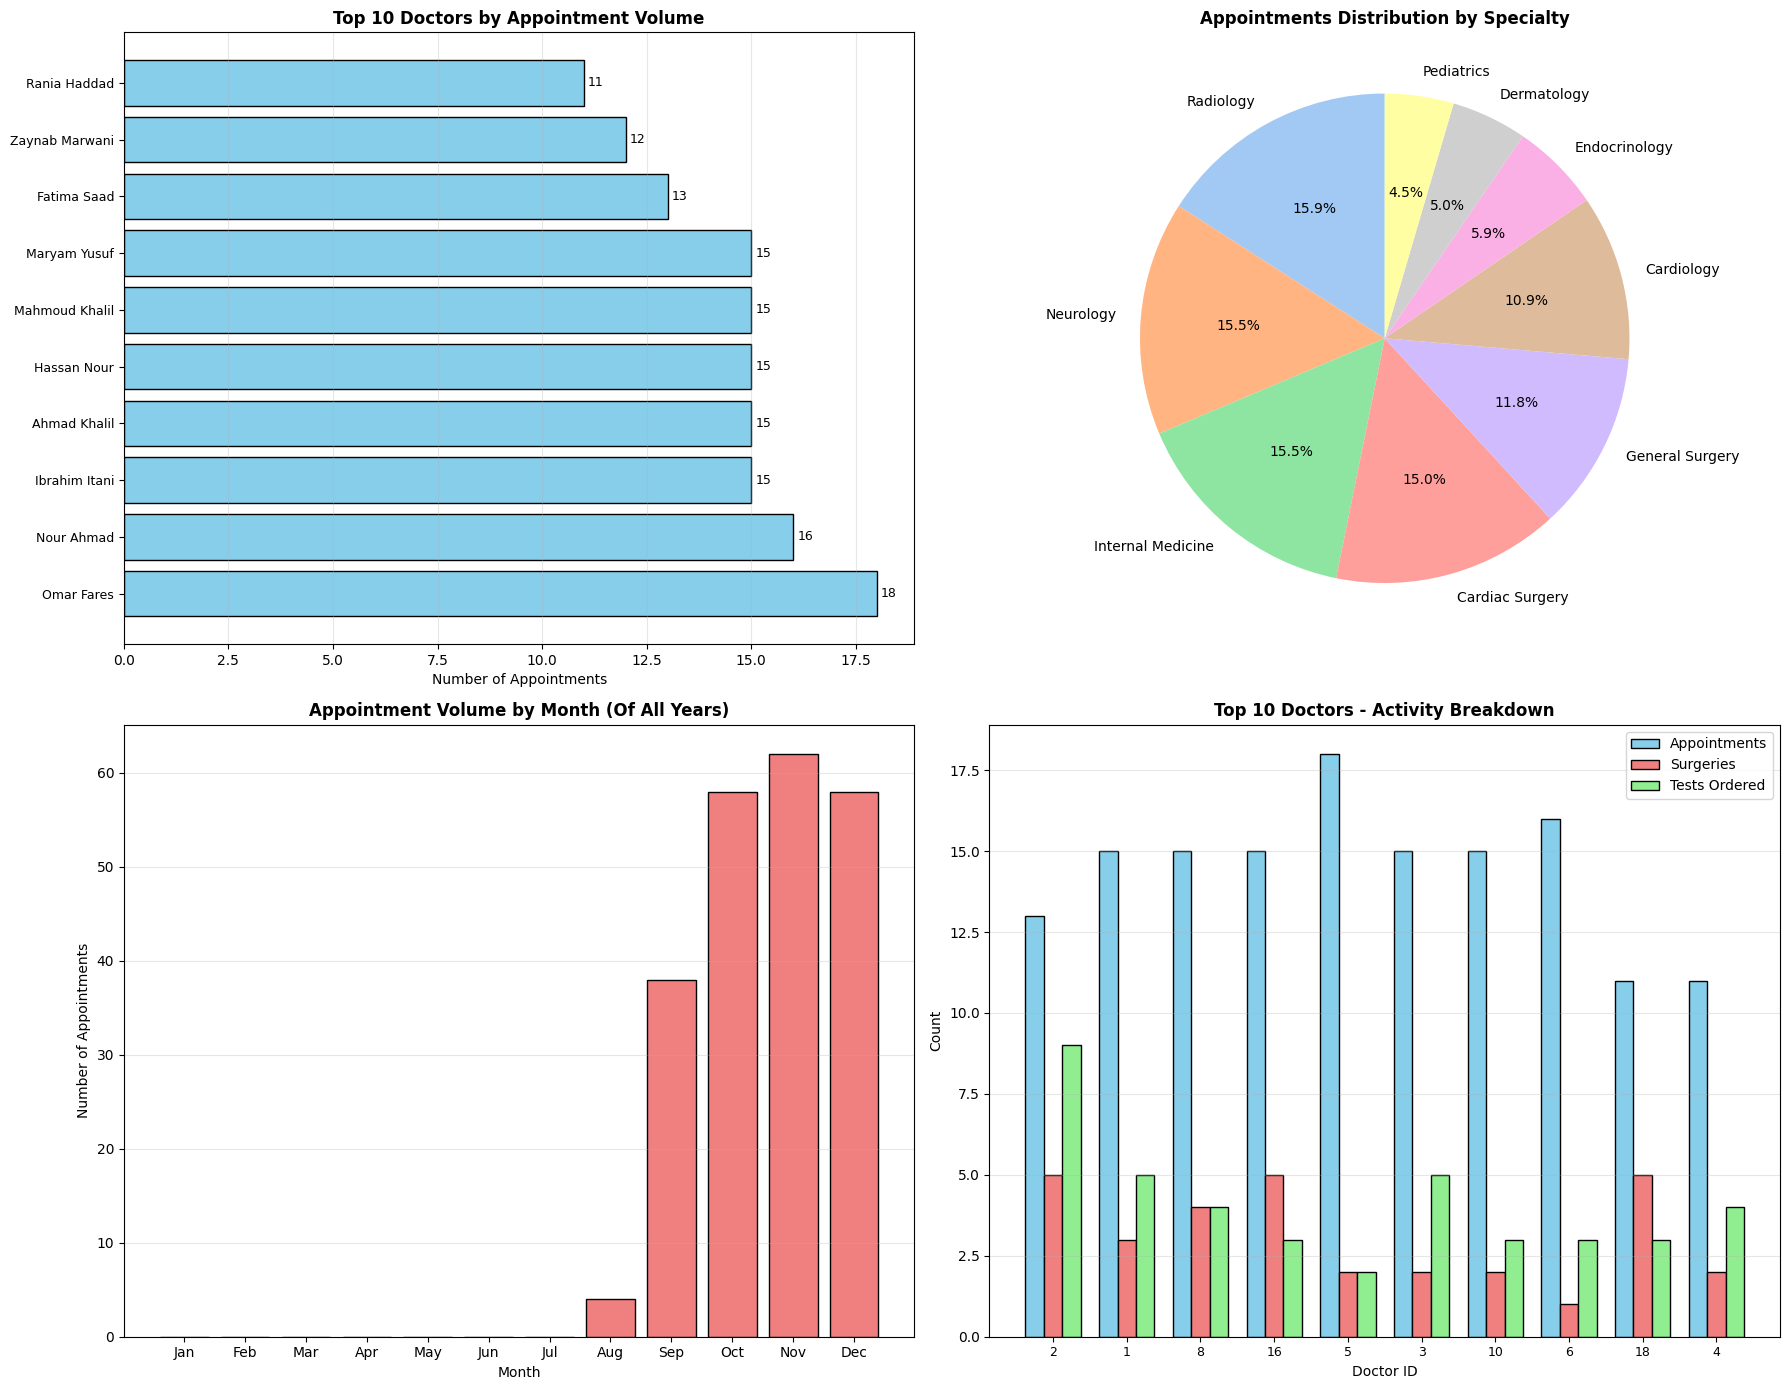


      8. Additional Performance Visualizations 


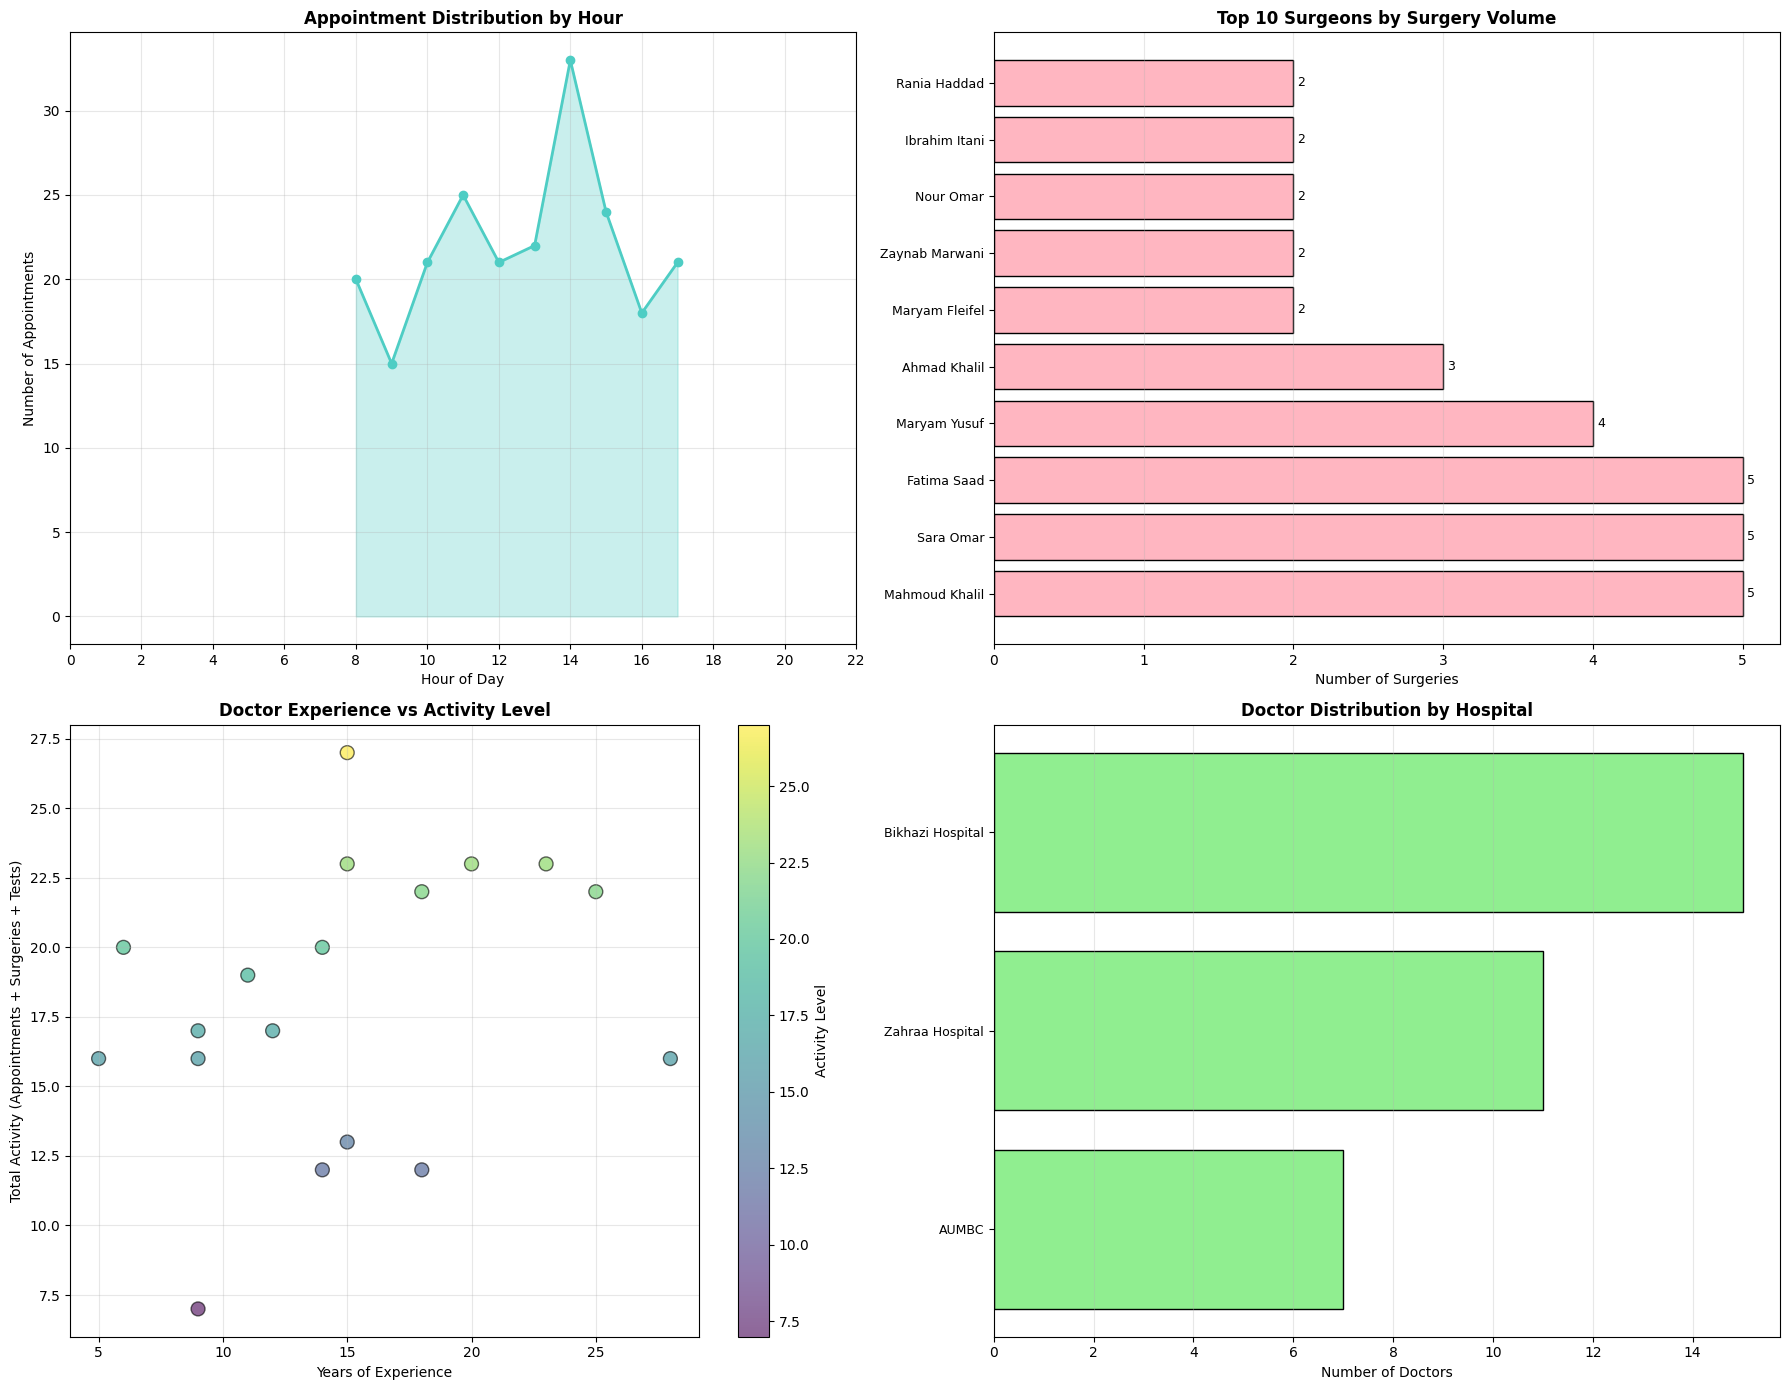


                                DOCTOR PERFORMANCE ANALYSIS SUMMARY                                 
KEY FINDINGS:
-------------

    WORKLOAD METRICS:
   • Total appointments conducted: 220
   • Average appointments per doctor: 12.2
   • Most active doctor (appointments): Dr. Omar Fares (18 appointments)
   • Total surgeries performed: 45
   • Average surgeries per doctor: 2.6
   • Most active surgeon: Dr. Mahmoud Khalil (5 surgeries)

    SPECIALTY INSIGHTS:
   • Total specialties represented: 9
   • Busiest specialty (by appointments): Radiology

    TEMPORAL PATTERNS:
   • Peak appointment hour: 14:00 - 15:00

    HOSPITAL COVERAGE:
   • Total doctor-hospital affiliations: 33
   • Doctors with multiple affiliations: 11

                                Doctor Performance Analysis Complete                                


In [ ]:
# =============================================================================
# DOCTOR PERFORMANCE ANALYSIS - Visits, Consultation Time, Case Types
# =============================================================================
print_header("Phase 2: Doctor Performance Analysis - Visits, Consultation Time, Case Types")

print_heading_3("\nTables:")
print(f"   • doctors: {len(doctors):,} entries")
print(f"   • appointments: {len(appointments):,} entries")
print(f"   • surgeries: {len(surgeries):,} entries")
print(f"   • doctor_hospital: {len(doctor_hospital):,} entries")
print(f"   • medical_tests: {len(medical_tests):,} entries")

# =============================================================================
# 1. DOCTOR WORKLOAD ANALYSIS
# =============================================================================
print_dashed_heading("1. Doctor Workload Analysis")

# Prepare doctor names
if 'first_name' in doctors.columns and 'last_name' in doctors.columns:
    doctors['full_name'] = doctors['first_name'] + ' ' + doctors['last_name']
else:
    doctors['full_name'] = 'Doctor ' + doctors['id'].astype(str)

print_heading_3("APPOINTMENT ANALYSIS")

if not appointments.empty:
    # Convert appointment datetime
    appointments['appointment_datetime'] = pd.to_datetime(appointments['appointment_datetime'], errors='coerce')
    appointments['appointment_date'] = appointments['appointment_datetime'].dt.date
    appointments['appointment_year'] = appointments['appointment_datetime'].dt.year
    appointments['appointment_month'] = appointments['appointment_datetime'].dt.month
    appointments['appointment_hour'] = appointments['appointment_datetime'].dt.hour

    # Appointments per doctor
    appointments_per_doctor = appointments['doctor_id'].value_counts().reset_index()
    appointments_per_doctor.columns = ['doctor_id', 'appointment_count']
    appointments_per_doctor = appointments_per_doctor.merge(
        doctors[['id', 'full_name', 'specialty']],
        left_on='doctor_id',
        right_on='id',
        how='left'
    )

    print(f"   • Total Appointments: {len(appointments):,}")
    print(f"   • Unique Doctors with Appointments: {appointments['doctor_id'].nunique():,}")
    print(f"   • Unique Patients with Appointments: {appointments['patient_id'].nunique():,}")
    print(f"   • Average Appointments per Doctor: {appointments_per_doctor['appointment_count'].mean():.1f}")

    print_heading_3("\nTOP 10 DOCTORS BY APPOINTMENT VOLUME:")
    for idx, row in appointments_per_doctor.head(10).iterrows():
        doctor_name = row['full_name'] if pd.notna(row['full_name']) else f"Doctor {row['doctor_id']}"
        specialty = row['specialty'] if pd.notna(row['specialty']) else "Unknown"
        print(f"   {idx+1:2d}. Dr. {doctor_name} ({specialty})")
        print(f"       Total Appointments: {row['appointment_count']:,}")

print_heading_3("\nSURGERY ANALYSIS")

if not surgeries.empty:
    # Convert surgery datetime
    surgeries['created_at'] = pd.to_datetime(surgeries['created_at'], errors='coerce')
    surgeries['surgery_date'] = surgeries['created_at'].dt.date
    surgeries['surgery_year'] = surgeries['created_at'].dt.year

    # Surgeries per doctor
    surgeries_per_doctor = surgeries['doctor_id'].value_counts().reset_index()
    surgeries_per_doctor.columns = ['doctor_id', 'surgery_count']
    surgeries_per_doctor = surgeries_per_doctor.merge(
        doctors[['id', 'full_name', 'specialty']],
        left_on='doctor_id',
        right_on='id',
        how='left'
    )

    print(f"   • Total Surgeries: {len(surgeries):,}")
    print(f"   • Unique Doctors performing Surgeries: {surgeries['doctor_id'].nunique():,}")
    print(f"   • Unique Patients with Surgeries: {surgeries['patient_id'].nunique():,}")
    print(f"   • Average Surgeries per Doctor: {surgeries_per_doctor['surgery_count'].mean():.1f}")

    print_heading_3("\nTOP SURGEONS BY SURGERY VOLUME:")
    for idx, row in surgeries_per_doctor.head(10).iterrows():
        doctor_name = row['full_name'] if pd.notna(row['full_name']) else f"Doctor {row['doctor_id']}"
        specialty = row['specialty'] if pd.notna(row['specialty']) else "Unknown"
        print(f"   {idx+1:2d}. Dr. {doctor_name} ({specialty})")
        print(f"       Total Surgeries: {row['surgery_count']:,}")

# =============================================================================
# 2. DOCTOR SPECIALTY ANALYSIS
# =============================================================================
print_dashed_heading("2. Doctor Specialty Analysis")

print_heading_3("SPECIALTY DISTRIBUTION")

if 'specialty' in doctors.columns:
    specialty_counts = doctors['specialty'].value_counts()

    print(f"   • Total Specialties: {doctors['specialty'].nunique():,}")
    print_heading_3("\nDOCTORS PER SPECIALTY:")
    for specialty, count in specialty_counts.items():
        print(f"   • {specialty}: {count} doctor(s)")

    # Appointments by specialty
    if not appointments.empty:
        appointments_with_specialty = appointments.merge(
            doctors[['id', 'specialty']],
            left_on='doctor_id',
            right_on='id',
            how='left'
        )

        appointments_by_specialty = appointments_with_specialty['specialty'].value_counts()

        print_heading_3("\nAPPOINTMENTS BY SPECIALTY:")
        for specialty, count in appointments_by_specialty.items():
            percentage = (count / len(appointments)) * 100
            print(f"   • {specialty}: {count:,} appointments ({percentage:.1f}%)")

    # Surgeries by specialty
    if not surgeries.empty:
        surgeries_with_specialty = surgeries.merge(
            doctors[['id', 'specialty']],
            left_on='doctor_id',
            right_on='id',
            how='left'
        )

        surgeries_by_specialty = surgeries_with_specialty['specialty'].value_counts()

        print_heading_3("\nSURGERIES BY SPECIALTY:")
        for specialty, count in surgeries_by_specialty.items():
            percentage = (count / len(surgeries)) * 100
            print(f"   • {specialty}: {count:,} surgeries ({percentage:.1f}%)")

# =============================================================================
# 3. TEMPORAL PATTERNS ANALYSIS
# =============================================================================
print_dashed_heading("3. Temporal Patterns Analysis")

print_heading_3("APPOINTMENT TIMING PATTERNS")

if not appointments.empty and 'appointment_datetime' in appointments.columns:
    # Yearly trend
    yearly_appointments = appointments['appointment_year'].value_counts().sort_index()
    print(f"   • Appointment period: {yearly_appointments.index.min()} - {yearly_appointments.index.max()}")
    print(f"   • Peak appointment year: {yearly_appointments.idxmax()} ({yearly_appointments.max():,} appointments)")

    # Monthly patterns
    monthly_appointments = appointments['appointment_month'].value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    print_heading_3("\nAPPOINTMENTS BY MONTH:")
    for month, count in monthly_appointments.items():
        if 1 <= month <= 12:
            print(f"   • {month_names[month-1]}: {count:,} appointments")

    # Hour distribution
    if 'appointment_hour' in appointments.columns:
        hourly_appointments = appointments['appointment_hour'].value_counts().sort_index()
        print_heading_3("\nBUSIEST APPOINTMENT HOURS:")
        for hour, count in hourly_appointments.head(5).items():
            print(f"   • {hour:02d}:00 - {hour+1:02d}:00: {count:,} appointments")

# =============================================================================
# 4. HOSPITAL AFFILIATION ANALYSIS
# =============================================================================
print_dashed_heading("4. Hospital Affiliation Analysis")

print_heading_3("DOCTOR-HOSPITAL RELATIONSHIPS")

if not doctor_hospital.empty:
    # Doctors per hospital
    doctors_per_hospital = doctor_hospital['hospital_id'].value_counts().reset_index()
    doctors_per_hospital.columns = ['hospital_id', 'doctor_count']
    doctors_per_hospital = doctors_per_hospital.merge(
        hospitals[['id', 'name']],
        left_on='hospital_id',
        right_on='id',
        how='left'
    )

    # Hospitals per doctor
    hospitals_per_doctor = doctor_hospital['doctor_id'].value_counts()

    print(f"   • Total Doctor-Hospital Affiliations: {len(doctor_hospital):,}")
    print(f"   • Average Hospitals per Doctor: {hospitals_per_doctor.mean():.1f}")
    print(f"   • Doctors with Multiple Hospital Affiliations: {(hospitals_per_doctor > 1).sum()}")

    print_heading_3("\nDOCTORS PER HOSPITAL:")
    for idx, row in doctors_per_hospital.iterrows():
        hospital_name = row['name'] if pd.notna(row['name']) else f"Hospital {row['hospital_id']}"
        print(f"   • {hospital_name}: {row['doctor_count']} doctor(s)")

# =============================================================================
# 5. CASE TYPE ANALYSIS
# =============================================================================
print_dashed_heading("5. Case Type Analysis")

print_heading_3("SURGERY TYPES ANALYSIS")

if not surgeries.empty and 'procedure_name' in surgeries.columns:
    surgery_types = surgeries['procedure_name'].value_counts()

    print(f"   • Total Unique Surgery Types: {surgeries['procedure_name'].nunique():,}")

    print_heading_3("\nMOST COMMON SURGICAL PROCEDURES:")
    for idx, (procedure, count) in enumerate(surgery_types.head(10).items(), 1):
        percentage = (count / len(surgeries)) * 100
        print(f"   {idx:2d}. {procedure}")
        print(f"       Count: {count:,} ({percentage:.1f}%)")

# Medical tests ordered by doctors
if not medical_tests.empty and 'doctor_id' in medical_tests.columns:
    tests_per_doctor = medical_tests['doctor_id'].value_counts().reset_index()
    tests_per_doctor.columns = ['doctor_id', 'test_count']
    tests_per_doctor = tests_per_doctor.merge(
        doctors[['id', 'full_name', 'specialty']],
        left_on='doctor_id',
        right_on='id',
        how='left'
    )

    print_heading_3("\nTOP 5 DOCTORS BY MEDICAL TESTS ORDERED:")
    for idx, row in tests_per_doctor.head(5).iterrows():
        doctor_name = row['full_name'] if pd.notna(row['full_name']) else f"Doctor {row['doctor_id']}"
        specialty = row['specialty'] if pd.notna(row['specialty']) else "Unknown"
        print(f"   {idx+1}. Dr. {doctor_name} ({specialty}): {row['test_count']:,} tests")

# =============================================================================
# 6. COMPREHENSIVE DOCTOR ACTIVITY SUMMARY
# =============================================================================
print_dashed_heading("6. Comprehensive Doctor Activity Summary")

print_heading_3("COMBINED DOCTOR PERFORMANCE METRICS")

# Create comprehensive summary
doctor_summary = doctors[['id', 'full_name', 'specialty', 'years_of_experience']].copy()

# Add appointment counts
if not appointments.empty:
    appointment_counts = appointments['doctor_id'].value_counts().reset_index()
    appointment_counts.columns = ['id', 'appointment_count']
    doctor_summary = doctor_summary.merge(appointment_counts, on='id', how='left')
    doctor_summary['appointment_count'] = doctor_summary['appointment_count'].fillna(0).astype(int)
else:
    doctor_summary['appointment_count'] = 0

# Add surgery counts
if not surgeries.empty:
    surgery_counts = surgeries['doctor_id'].value_counts().reset_index()
    surgery_counts.columns = ['id', 'surgery_count']
    doctor_summary = doctor_summary.merge(surgery_counts, on='id', how='left')
    doctor_summary['surgery_count'] = doctor_summary['surgery_count'].fillna(0).astype(int)
else:
    doctor_summary['surgery_count'] = 0

# Add medical test counts
if not medical_tests.empty and 'doctor_id' in medical_tests.columns:
    test_counts = medical_tests['doctor_id'].value_counts().reset_index()
    test_counts.columns = ['id', 'test_count']
    doctor_summary = doctor_summary.merge(test_counts, on='id', how='left')
    doctor_summary['test_count'] = doctor_summary['test_count'].fillna(0).astype(int)
else:
    doctor_summary['test_count'] = 0

# Calculate total activity
doctor_summary['total_activity'] = (
    doctor_summary['appointment_count'] +
    doctor_summary['surgery_count'] +
    doctor_summary['test_count']
)

# Sort by total activity
doctor_summary = doctor_summary.sort_values('total_activity', ascending=False)

print_heading_3("\nTOP 10 MOST ACTIVE DOCTORS (Combined Metrics):")
for idx, row in doctor_summary.head(10).iterrows():
    print(f"\n   {list(doctor_summary.head(10).index).index(idx)+1}. Dr. {row['full_name']}")
    print(f"      Specialty: {row['specialty']}")
    print(f"      Experience: {row['years_of_experience']} years")
    print(f"      Appointments: {row['appointment_count']:,}")
    print(f"      Surgeries: {row['surgery_count']:,}")
    print(f"      Tests Ordered: {row['test_count']:,}")
    print(f"      Total Activity Score: {row['total_activity']:,}")

# =============================================================================
# 7. VISUALIZATION - DOCTOR PERFORMANCE METRICS
# =============================================================================
print_dashed_heading("7. Doctor Performance Visualizations")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Top 10 Doctors by Appointments
ax1 = axes[0, 0]
if not appointments.empty:
    top_appt_doctors = appointments_per_doctor.head(10)
    bars1 = ax1.barh(range(len(top_appt_doctors)), top_appt_doctors['appointment_count'],
                     color='skyblue', edgecolor='black')
    ax1.set_yticks(range(len(top_appt_doctors)))
    ax1.set_yticklabels([name[:25] + '...' if len(name) > 25 else name
                         for name in top_appt_doctors['full_name'].fillna('Unknown')], fontsize=9)
    ax1.set_xlabel('Number of Appointments')
    ax1.set_title('Top 10 Doctors by Appointment Volume', fontweight='bold', fontsize=12)
    ax1.grid(True, axis='x', alpha=0.3)

    for i, bar in enumerate(bars1):
        width = bar.get_width()
        ax1.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height()/2),
                    xytext=(3, 0), textcoords="offset points", ha='left', va='center', fontsize=9)

# 2. Appointments by Specialty
ax2 = axes[0, 1]
if not appointments.empty and 'specialty' in doctors.columns:
    specialty_appts = appointments_with_specialty['specialty'].value_counts()
    colors_specialty = sns.color_palette("pastel", n_colors=len(specialty_appts))
    wedges, texts, autotexts = ax2.pie(specialty_appts.values, labels=specialty_appts.index,
                                       autopct='%1.1f%%', startangle=90, colors=colors_specialty)
    ax2.set_title('Appointments Distribution by Specialty', fontweight='bold', fontsize=12)

# 3. Monthly Appointment Trends
ax3 = axes[1, 0]
if not appointments.empty and 'appointment_month' in appointments.columns:
    monthly_data = appointments['appointment_month'].value_counts().sort_index()
    month_names_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    bars3 = ax3.bar(range(1, 13), [monthly_data.get(i, 0) for i in range(1, 13)],
                   color='lightcoral', edgecolor='black')
    ax3.set_xticks(range(1, 13))
    ax3.set_xticklabels(month_names_short)
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Number of Appointments')
    ax3.set_title('Appointment Volume by Month (Of All Years)', fontweight='bold', fontsize=12)
    ax3.grid(True, axis='y', alpha=0.3)

# 4. Doctor Activity Comparison
ax4 = axes[1, 1]
top_doctors = doctor_summary.head(10)
x = np.arange(len(top_doctors))
width = 0.25

bars1 = ax4.bar(x - width, top_doctors['appointment_count'], width,
                label='Appointments', color='skyblue', edgecolor='black')
bars2 = ax4.bar(x, top_doctors['surgery_count'], width,
                label='Surgeries', color='lightcoral', edgecolor='black')
bars3 = ax4.bar(x + width, top_doctors['test_count'], width,
                label='Tests Ordered', color='lightgreen', edgecolor='black')

ax4.set_xlabel('Doctor ID')
ax4.set_ylabel('Count')
ax4.set_title('Top 10 Doctors - Activity Breakdown', fontweight='bold', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels([f"{id}" for id in top_doctors['id']], fontsize=9)
ax4.legend()
ax4.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 8. ADDITIONAL VISUALIZATIONS - TEMPORAL & WORKLOAD PATTERNS
# =============================================================================
print_dashed_heading("8. Additional Performance Visualizations")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Hourly Appointment Distribution
ax1 = axes[0, 0]
if not appointments.empty and 'appointment_hour' in appointments.columns:
    hourly_data = appointments['appointment_hour'].value_counts().sort_index()
    ax1.plot(hourly_data.index, hourly_data.values, marker='o', linewidth=2,
             markersize=6, color='#4ECDC4')
    ax1.fill_between(hourly_data.index, hourly_data.values, alpha=0.3, color='#4ECDC4')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Number of Appointments')
    ax1.set_title('Appointment Distribution by Hour', fontweight='bold', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(range(0, 24, 2))

# 2. Surgery Volume by Doctor
ax2 = axes[0, 1]
if not surgeries.empty:
    top_surgeons = surgeries_per_doctor.head(10)
    bars2 = ax2.barh(range(len(top_surgeons)), top_surgeons['surgery_count'],
                     color='#FFB6C1', edgecolor='black')
    ax2.set_yticks(range(len(top_surgeons)))
    ax2.set_yticklabels([name[:25] + '...' if len(name) > 25 else name
                         for name in top_surgeons['full_name'].fillna('Unknown')], fontsize=9)
    ax2.set_xlabel('Number of Surgeries')
    ax2.set_title('Top 10 Surgeons by Surgery Volume', fontweight='bold', fontsize=12)
    ax2.grid(True, axis='x', alpha=0.3)

    for i, bar in enumerate(bars2):
        width = bar.get_width()
        ax2.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height()/2),
                    xytext=(3, 0), textcoords="offset points", ha='left', va='center', fontsize=9)

# 3. Doctor Experience vs Activity
ax3 = axes[1, 0]
if 'years_of_experience' in doctor_summary.columns:
    scatter_data = doctor_summary[doctor_summary['total_activity'] > 0]
    scatter = ax3.scatter(scatter_data['years_of_experience'],
                         scatter_data['total_activity'],
                         s=100, alpha=0.6, c=scatter_data['total_activity'],
                         cmap='viridis', edgecolor='black')
    ax3.set_xlabel('Years of Experience')
    ax3.set_ylabel('Total Activity (Appointments + Surgeries + Tests)')
    ax3.set_title('Doctor Experience vs Activity Level', fontweight='bold', fontsize=12)
    ax3.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax3, label='Activity Level')

# 4. Hospital-wise Doctor Distribution
ax4 = axes[1, 1]
if not doctor_hospital.empty:
    hospital_dist = doctors_per_hospital.sort_values('doctor_count', ascending=True)
    bars4 = ax4.barh(range(len(hospital_dist)), hospital_dist['doctor_count'],
                     color='#90EE90', edgecolor='black')
    ax4.set_yticks(range(len(hospital_dist)))
    ax4.set_yticklabels([name[:30] + '...' if len(name) > 30 else name
                         for name in hospital_dist['name'].fillna('Unknown')], fontsize=9)
    ax4.set_xlabel('Number of Doctors')
    ax4.set_title('Doctor Distribution by Hospital', fontweight='bold', fontsize=12)
    ax4.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# SUMMARY REPORT
# =============================================================================
print_header("DOCTOR PERFORMANCE ANALYSIS SUMMARY")

print_heading_3("KEY FINDINGS:")

print(f"\n    WORKLOAD METRICS:")
if not appointments.empty:
    print(f"   • Total appointments conducted: {len(appointments):,}")
    print(f"   • Average appointments per doctor: {appointments_per_doctor['appointment_count'].mean():.1f}")
    print(f"   • Most active doctor (appointments): Dr. {appointments_per_doctor.iloc[0]['full_name']} " +
          f"({appointments_per_doctor.iloc[0]['appointment_count']:,} appointments)")

if not surgeries.empty:
    print(f"   • Total surgeries performed: {len(surgeries):,}")
    print(f"   • Average surgeries per doctor: {surgeries_per_doctor['surgery_count'].mean():.1f}")
    print(f"   • Most active surgeon: Dr. {surgeries_per_doctor.iloc[0]['full_name']} " +
          f"({surgeries_per_doctor.iloc[0]['surgery_count']:,} surgeries)")

print(f"\n    SPECIALTY INSIGHTS:")
if 'specialty' in doctors.columns:
    print(f"   • Total specialties represented: {doctors['specialty'].nunique():,}")
    if not appointments.empty:
        most_busy_specialty = appointments_with_specialty['specialty'].value_counts().index[0]
        print(f"   • Busiest specialty (by appointments): {most_busy_specialty}")

print(f"\n    TEMPORAL PATTERNS:")
if not appointments.empty and 'appointment_hour' in appointments.columns:
    peak_hour = appointments['appointment_hour'].value_counts().index[0]
    print(f"   • Peak appointment hour: {peak_hour:02d}:00 - {peak_hour+1:02d}:00")

print(f"\n    HOSPITAL COVERAGE:")
if not doctor_hospital.empty:
    print(f"   • Total doctor-hospital affiliations: {len(doctor_hospital):,}")
    print(f"   • Doctors with multiple affiliations: {(hospitals_per_doctor > 1).sum()}")
# =============================================================================
# ANALYSIS METHODOLOGY NOTE
# =============================================================================
print_dashed_heading("Analysis Methodology Note")

print("""
   CORE REQUIREMENTS:
   • VISITS: Analyzed using appointments table (appointment volume per doctor)
   • CONSULTATION TIME: Analyzed using appointment timing patterns (hourly/monthly trends)
   • CASE TYPES: Analyzed using surgeries table and doctor specialties

   ADDITIONAL ANALYSIS (Related to Doctors' Performance):
   • Top surgeons and doctors by activity
   • Hospital affiliation analysis (multi-hospital coverage per doctor)
   • Appointments and surgeries distribution by specialty
   • Doctor experience vs activity level correlation
""")

print_header("Doctor Performance Analysis Complete")

# **Phase2: 4. Care cycle analytics - Patient journey from admission to discharge**


    Phase 2: Part 3: Enhanced Care Cycle Analytics - Patient Journey from Admission to Discharge    

Loaded Care Cycle Tables:
--------------------------
   • hospital_patient: 3 entries (admissions)
   • surgeries: 12 entries
   • medical_tests: 42 entries
   • medical_results: 348 entries
   • vitals: 528 entries (monitoring)

      6.1 Hospital Admissions & Stay Analysis 
ADMISSION PATTERNS
------------------
   • Total Hospital Admissions: 3
   • Unique Patients Admitted: 1
   • Hospitals in Network: 3
   • Average Admissions per Patient: 3.0

READMISSION ANALYSIS:
----------------------
   • Patients with Single Admission: 0
   • Patients with Re-admissions: 1 (100.0%)
   • Average Re-admissions: 3.0 per patient
   • Maximum Re-admissions: 3 (Patient ID: 1)

      6.2 Length of Stay Analysis 
   • Length of stay data not available or invalid

      6.3 Surgical Procedures Analysis 
SURGICAL ACTIVITY OVERVIEW:
---------------------------
   • Total Surgical Procedures: 12
   • Un

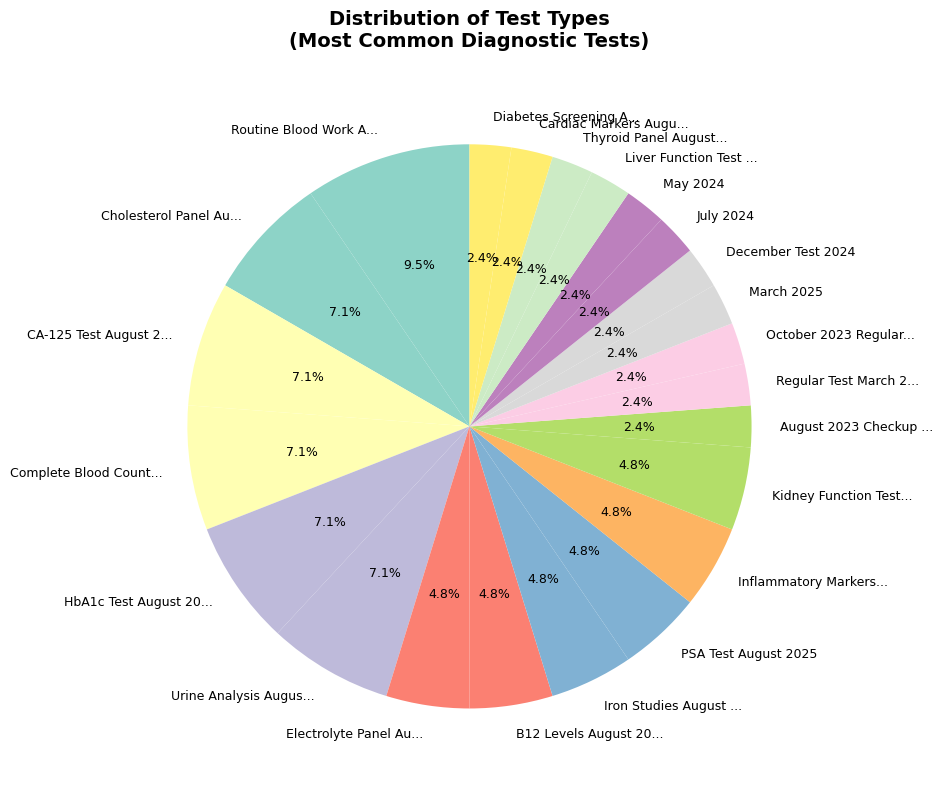


TEST TYPES SUMMARY:
--------------------
   • Total unique test types: 23
   • Most frequent test: Routine Blood Work August 2025 (4 occurrences)
   • Test distribution: Evenly distributed

      6.5 Patient Monitoring During Stay 
VITAL SIGNS MONITORING:
-----------------------
   • Patients with Vital Signs: 8
   • Average Vital Checks per Patient: 66.0
   • Maximum Vital Checks per Patient: 383
   • Average Daily Vital Checks: 1.5
   • Peak Daily Monitoring: 9 checks

      6.6 Enhanced Care Cycle Visualizations 


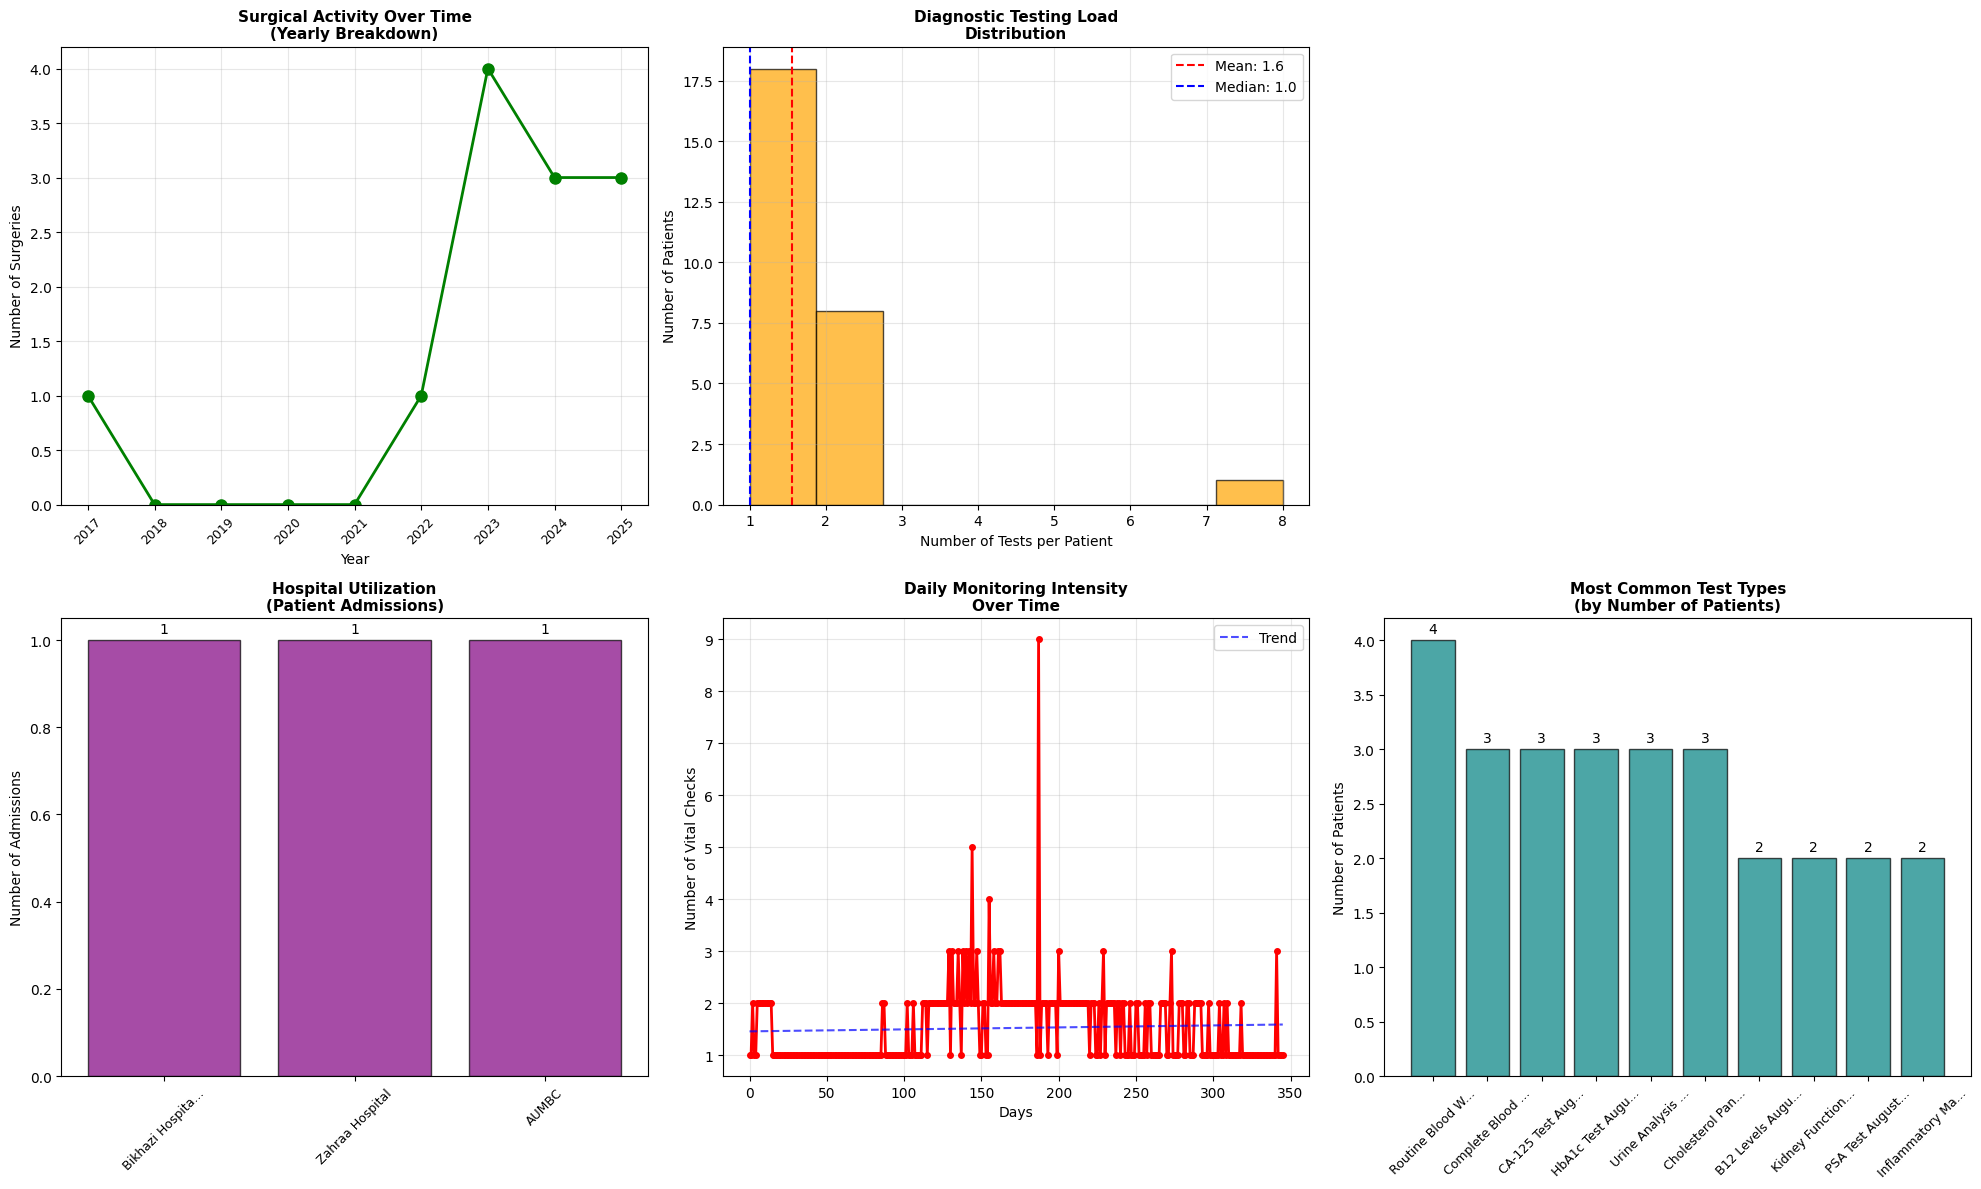


      6.7 Comprehensive Patient Journey Flow Analysis 
PATIENT CARE JOURNEY INSIGHTS:
------------------------------
   • Total Unique Patients in System: 32

COMPREHENSIVE PATIENT CARE JOURNEYS:
-------------------------------------
   • Average Care Intensity Score: 40.7
   • Highest Care Intensity Score: 397.5
   • Patients with High Intensity (>50): 6
   • Patients with Medium Intensity (10-50): 24
   • Patients with Low Intensity (<10): 2

      Note: Calculation: Care Intensity Score = (admissions × 10) + (surgeries × 20) + (tests × 2) + (vitals × 0.5) + (medications × 5) 

                                CARE CYCLE ANALYTICS SUMMARY REPORT                                 
    HOSPITAL UTILIZATION:
-------------------------
   • Total admissions: 3
   • Unique patients served: 1
   • Readmission rate: 100.0%

    SURGICAL SERVICES:
-----------------------
   • Total procedures: 12
   • Patients requiring surgery: 10
   • Surgery-to-patient ratio: 1.2 procedures per surgical pati

In [ ]:
# =============================================================================
# 6. ENHANCED CARE CYCLE ANALYTICS - Patient Journey from Admission to Discharge
# =============================================================================
print_header("Phase 2: Part 3: Enhanced Care Cycle Analytics - Patient Journey from Admission to Discharge")


print_heading_3("\nLoaded Care Cycle Tables:")
print(f"   • hospital_patient: {len(hospital_patient):,} entries (admissions)")
print(f"   • surgeries: {len(surgeries):,} entries")
print(f"   • medical_tests: {len(medical_tests):,} entries")
print(f"   • medical_results: {len(medical_results):,} entries")
print(f"   • vitals: {len(vitals):,} entries (monitoring)")

# =============================================================================
# 6.1 HOSPITAL ADMISSIONS ANALYSIS
# =============================================================================
print_dashed_heading("6.1 Hospital Admissions & Stay Analysis")

print_heading_3("ADMISSION PATTERNS")

if not hospital_patient.empty:
    # Convert timestamps
    hospital_patient['created_at'] = pd.to_datetime(hospital_patient['created_at'], errors='coerce')
    hospital_patient['updated_at'] = pd.to_datetime(hospital_patient['updated_at'], errors='coerce')

    # Calculate length of stay (approximation using created_at to updated_at)
    hospital_patient['length_of_stay'] = (hospital_patient['updated_at'] - hospital_patient['created_at']).dt.days
    hospital_patient['length_of_stay'] = hospital_patient['length_of_stay'].fillna(0)  # Handle missing values

    # Basic admission statistics
    total_admissions = len(hospital_patient)
    unique_patients_admitted = hospital_patient['patient_id'].nunique()
    unique_hospitals = hospital_patient['hospital_id'].nunique()

    print(f"   • Total Hospital Admissions: {total_admissions:,}")
    print(f"   • Unique Patients Admitted: {unique_patients_admitted:,}")
    print(f"   • Hospitals in Network: {unique_hospitals:,}")
    print(f"   • Average Admissions per Patient: {total_admissions/unique_patients_admitted:.1f}")

    # Readmission analysis
    readmission_patients = hospital_patient['patient_id'].value_counts()
    readmissions = readmission_patients[readmission_patients > 1]

    print_heading_3("\nREADMISSION ANALYSIS:")
    print(f"   • Patients with Single Admission: {(readmission_patients == 1).sum():,}")
    print(f"   • Patients with Re-admissions: {len(readmissions):,} ({len(readmissions)/unique_patients_admitted*100:.1f}%)")
    if not readmissions.empty:
        print(f"   • Average Re-admissions: {readmissions.mean():.1f} per patient")
        print(f"   • Maximum Re-admissions: {readmissions.max()} (Patient ID: {readmissions.idxmax()})")

# =============================================================================
# 6.2 LENGTH OF STAY ANALYSIS
# =============================================================================
print_dashed_heading("6.2 Length of Stay Analysis")

if not hospital_patient.empty and 'length_of_stay' in hospital_patient.columns:
    # Filter realistic length of stay values (0-365 days)
    valid_los = hospital_patient['length_of_stay'][(hospital_patient['length_of_stay'] >= 0) &
                                                  (hospital_patient['length_of_stay'] <= 365)]

    if not valid_los.empty and valid_los.sum() > 0:
        print_heading_3("LENGTH OF STAY STATISTICS:")
        print(f"   • Average Length of Stay: {valid_los.mean():.1f} days")
        print(f"   • Median Length of Stay: {valid_los.median():.1f} days")
        print(f"   • Shortest Stay: {valid_los.min():.0f} days")
        print(f"   • Longest Stay: {valid_los.max():.0f} days")
        print(f"   • Standard Deviation: {valid_los.std():.1f} days")

        # Length of stay categories
        print_heading_3("\nLENGTH OF STAY CATEGORIES:")
        same_day = (valid_los == 0).sum()
        short_stay = ((valid_los > 0) & (valid_los <= 3)).sum()
        medium_stay = ((valid_los > 3) & (valid_los <= 7)).sum()
        long_stay = ((valid_los > 7) & (valid_los <= 30)).sum()
        extended_stay = (valid_los > 30).sum()

        total_valid = len(valid_los)
        print(f"   • Same Day (0 days): {same_day:,} ({same_day/total_valid*100:.1f}%)")
        print(f"   • Short Stay (1-3 days): {short_stay:,} ({short_stay/total_valid*100:.1f}%)")
        print(f"   • Medium Stay (4-7 days): {medium_stay:,} ({medium_stay/total_valid*100:.1f}%)")
        print(f"   • Long Stay (8-30 days): {long_stay:,} ({long_stay/total_valid*100:.1f}%)")
        print(f"   • Extended Stay (30+ days): {extended_stay:,} ({extended_stay/total_valid*100:.1f}%)")
    else:
        print("   • Length of stay data not available or invalid")

# =============================================================================
# 6.3 SURGICAL PROCEDURES ANALYSIS
# =============================================================================
print_dashed_heading("6.3 Surgical Procedures Analysis")

if not surgeries.empty:
    # Convert timestamps
    surgeries['created_at'] = pd.to_datetime(surgeries['created_at'], errors='coerce')
    surgeries['updated_at'] = pd.to_datetime(surgeries['updated_at'], errors='coerce')

    print_heading_3("SURGICAL ACTIVITY OVERVIEW:")
    print(f"   • Total Surgical Procedures: {len(surgeries):,}")
    print(f"   • Unique Patients with Surgery: {surgeries['patient_id'].nunique():,}")

    # Surgery types analysis
    if 'procedure_name' in surgeries.columns:
        surgery_types = surgeries['procedure_name'].value_counts()
        print_heading_3("\nSURGICAL PROCEDURES BREAKDOWN:")
        for idx, (procedure, count) in enumerate(surgery_types.items(), 1):
            percentage = (count / len(surgeries)) * 100
            print(f"   {idx:2d}. {procedure}: {count:,} cases ({percentage:.1f}%)")

    # Surgical complexity analysis (if description available)
    if 'description' in surgeries.columns:
        emergency_keywords = ['emergency', 'urgent', 'stat', 'trauma']
        complex_keywords = ['bypass', 'transplant', 'resection', 'reconstruction', 'grafting', 'cabg']
        #Note if a surgery is emergency and complex at the same time then both counts are increased
        emergency_surgeries = surgeries[surgeries['description'].str.contains(
            '|'.join(emergency_keywords), case=False, na=False)].shape[0]
        complex_surgeries = surgeries[surgeries['description'].str.contains(
            '|'.join(complex_keywords), case=False, na=False)].shape[0]
        standard_surgeries = len(surgeries) - surgeries['description'].str.contains(
            '|'.join(emergency_keywords + complex_keywords), case=False, na=False).sum()

        print_heading_3("\nSURGICAL COMPLEXITY ANALYSIS:")
        print(f"   • Emergency/Urgent Procedures: {emergency_surgeries:,} ({emergency_surgeries/len(surgeries)*100:.1f}%)")
        print(f"   • Complex Procedures (Bypass/Grafting/etc): {complex_surgeries:,} ({complex_surgeries/len(surgeries)*100:.1f}%)")
        print(f"   • Standard Procedures: {standard_surgeries:,}")

# =============================================================================
# 6.4 ENHANCED DIAGNOSTIC TESTING ANALYSIS
# =============================================================================
print_dashed_heading("6.4 Enhanced Diagnostic Testing Analysis")

if not medical_tests.empty:
    # Convert timestamps
    medical_tests['created_at'] = pd.to_datetime(medical_tests['created_at'], errors='coerce')

    print_heading_3("DIAGNOSTIC TESTING OVERVIEW:")
    print(f"   • Total Medical Tests Ordered: {len(medical_tests):,}")
    print(f"   • Unique Patients Tested: {medical_tests['patient_id'].nunique():,}")

    # Tests per patient analysis
    tests_per_patient = medical_tests['patient_id'].value_counts()
    print(f"   • Average Tests per Patient: {tests_per_patient.mean():.1f}")
    print(f"   • Maximum Tests per Patient: {tests_per_patient.max()}")
    print(f"   • Minimum Tests per Patient: {tests_per_patient.min()}")

    # Test frequency analysis
    print_heading_3("\nTEST FREQUENCY DISTRIBUTION:")
    freq_1_test = (tests_per_patient == 1).sum()
    freq_2_5_tests = ((tests_per_patient >= 2) & (tests_per_patient <= 5)).sum()
    freq_6_10_tests = ((tests_per_patient >= 6) & (tests_per_patient <= 10)).sum()
    freq_more_10_tests = (tests_per_patient > 10).sum()

    total_patients = len(tests_per_patient)
    print(f"   • Patients with 1 test: {freq_1_test:,} ({freq_1_test/total_patients*100:.1f}%)")
    print(f"   • Patients with 2-5 tests: {freq_2_5_tests:,} ({freq_2_5_tests/total_patients*100:.1f}%)")
    print(f"   • Patients with 6-10 tests: {freq_6_10_tests:,} ({freq_6_10_tests/total_patients*100:.1f}%)")
    print(f"   • Patients with >10 tests: {freq_more_10_tests:,} ({freq_more_10_tests/total_patients*100:.1f}%)")

    # Temporal analysis of testing
    print_heading_3("\nTESTING TEMPORAL PATTERNS:")
    medical_tests_clean = medical_tests.dropna(subset=['created_at'])
    if not medical_tests_clean.empty:
        # Monthly testing pattern
        medical_tests_clean['test_month'] = medical_tests_clean['created_at'].dt.to_period('M')
        monthly_tests = medical_tests_clean['test_month'].value_counts().sort_index()

        # Yearly testing pattern
        medical_tests_clean['test_year'] = medical_tests_clean['created_at'].dt.year
        yearly_tests = medical_tests_clean['test_year'].value_counts().sort_index()

        print(f"   • Testing Period Range: {monthly_tests.index.min()} to {monthly_tests.index.max()}")
        print(f"   • Average Monthly Tests: {monthly_tests.mean():.1f}")
        print(f"   • Peak Testing Month: {monthly_tests.idxmax()} ({monthly_tests.max()} tests)")

        if len(yearly_tests) > 1:
            print(f"   • Testing Trend: {yearly_tests.index.max() - yearly_tests.index.min()} year span")
            print(f"   • Most Active Testing Year: {yearly_tests.idxmax()} ({yearly_tests.max()} tests)")

    # Test types analysis with more detail
    if 'test_name' in medical_tests.columns:
        test_types = medical_tests['test_name'].value_counts()
        print_heading_3("\nTEST TYPES AND PATTERNS:")

        # Categorize tests
        routine_keywords = ['regular', 'checkup', 'routine', 'follow', 'screening']
        emergency_keywords = ['emergency', 'urgent', 'stat', 'acute']
        specific_keywords = ['cardiac', 'blood', 'urine', 'lab', 'imaging']

        routine_tests = 0
        emergency_tests = 0
        specific_tests = 0

        for test_name in medical_tests['test_name'].str.lower().fillna(''):
            if any(keyword in test_name for keyword in routine_keywords):
                routine_tests += 1
            elif any(keyword in test_name for keyword in emergency_keywords):
                emergency_tests += 1
            elif any(keyword in test_name for keyword in specific_keywords):
                specific_tests += 1

        print(f"   • Routine/Regular Tests: {routine_tests:,} ({routine_tests/len(medical_tests)*100:.1f}%)")
        print(f"   • Emergency/Urgent Tests: {emergency_tests:,} ({emergency_tests/len(medical_tests)*100:.1f}%)")
        print(f"   • Specific Diagnostic Tests: {specific_tests:,} ({specific_tests/len(medical_tests)*100:.1f}%)")

        print_heading_3("\nMOST COMMON TEST TYPES:")
        # Test types analysis with pie chart
        if 'test_name' in medical_tests.columns:
            test_types = medical_tests['test_name'].value_counts()

            # Create a separate figure for the test types pie chart
            plt.figure(figsize=(10, 8))

            # Create pie chart
            colors = plt.cm.Set3(np.linspace(0, 1, len(test_types)))
            wedges, texts, autotexts = plt.pie(test_types.values,
                                              labels=[name[:20] + '...' if len(name) > 20 else name for name in test_types.index],
                                              colors=colors,
                                              autopct='%1.1f%%',
                                              startangle=90,
                                              textprops={'fontsize': 9})

            plt.title('Distribution of Test Types\n(Most Common Diagnostic Tests)',
                      fontweight='bold', fontsize=14, pad=20)

            # Adjust layout to prevent label cutoff
            plt.tight_layout()
            plt.show()

            print_heading_3("\nTEST TYPES SUMMARY:")
            print(f"   • Total unique test types: {len(test_types)}")
            print(f"   • Most frequent test: {test_types.index[0]} ({test_types.iloc[0]} occurrences)")
            print(f"   • Test distribution: {'Evenly distributed' if test_types.std() < 1 else 'Varied distribution'}")


# =============================================================================
# 6.5 PATIENT MONITORING DURING STAY
# =============================================================================
print_dashed_heading("6.5 Patient Monitoring During Stay")

# Analyze vital signs monitoring frequency
if not vitals.empty and not hospital_patient.empty:
    # Convert timestamps
    vitals['created_at'] = pd.to_datetime(vitals['created_at'], errors='coerce')

    print_heading_3("VITAL SIGNS MONITORING:")

    # Monitoring frequency per patient
    vitals_per_patient = vitals['patient_id'].value_counts()
    print(f"   • Patients with Vital Signs: {len(vitals_per_patient):,}")
    print(f"   • Average Vital Checks per Patient: {vitals_per_patient.mean():.1f}")
    print(f"   • Maximum Vital Checks per Patient: {vitals_per_patient.max()}")

    # Daily monitoring patterns
    vitals['monitoring_date'] = vitals['created_at'].dt.date
    daily_monitoring = vitals.groupby('monitoring_date').size()

    if not daily_monitoring.empty:
        print(f"   • Average Daily Vital Checks: {daily_monitoring.mean():.1f}")
        print(f"   • Peak Daily Monitoring: {daily_monitoring.max()} checks")
# =============================================================================
# 6.6 ENHANCED CARE CYCLE VISUALIZATIONS
# =============================================================================
print_dashed_heading("6.6 Enhanced Care Cycle Visualizations")

# Create comprehensive care cycle visualizations (5 charts)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. MODIFIED: Surgical Procedures Timeline by YEAR (showing all years including zeros)
ax1 = axes[0, 0]
if not surgeries.empty and 'created_at' in surgeries.columns:
    surgeries_clean = surgeries.dropna(subset=['created_at'])
    if not surgeries_clean.empty:
        # Create YEARLY timeline with all years from min to max
        surgeries_clean['surgery_year'] = surgeries_clean['created_at'].dt.year
        surgery_yearly = surgeries_clean['surgery_year'].value_counts().sort_index()

        # Create complete year range from min to max year
        min_year = surgery_yearly.index.min()
        max_year = surgery_yearly.index.max()
        all_years = list(range(min_year, max_year + 1))

        # Fill in missing years with 0 surgeries
        complete_surgery_data = []
        for year in all_years:
            if year in surgery_yearly.index:
                complete_surgery_data.append(surgery_yearly[year])
            else:
                complete_surgery_data.append(0)

        # Plot with all years including zeros
        years = [str(year) for year in all_years]
        ax1.plot(range(len(all_years)), complete_surgery_data,
                marker='o', linewidth=2, color='green', markersize=8)
        ax1.set_xticks(range(len(all_years)))
        ax1.set_xticklabels(years, rotation=45, fontsize=9)
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Number of Surgeries')
        ax1.set_title('Surgical Activity Over Time\n(Yearly Breakdown)', fontweight='bold', fontsize=11)
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(bottom=0)  # Ensure y-axis starts at 0

# 2. Diagnostic Tests per Patient Distribution
ax2 = axes[0, 1]
if not medical_tests.empty:
    tests_per_patient = medical_tests['patient_id'].value_counts()
    ax2.hist(tests_per_patient.values, bins=max(3, min(15, tests_per_patient.max())),
             color='orange', edgecolor='black', alpha=0.7)
    ax2.axvline(tests_per_patient.mean(), color='red', linestyle='--',
               label=f'Mean: {tests_per_patient.mean():.1f}')
    ax2.axvline(tests_per_patient.median(), color='blue', linestyle='--',
               label=f'Median: {tests_per_patient.median():.1f}')
    ax2.set_xlabel('Number of Tests per Patient')
    ax2.set_ylabel('Number of Patients')
    ax2.set_title('Diagnostic Testing Load\nDistribution', fontweight='bold', fontsize=11)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

# 3. REMOVED: Test Results Completion Rate (as requested)
ax3 = axes[0, 2]
ax3.axis('off')  # Hide the third chart

# 4. Care Activity by Hospital
ax4 = axes[1, 0]
if not hospital_patient.empty and 'hospitals' in globals() and not hospitals.empty:
    hospital_activity = hospital_patient['hospital_id'].value_counts()

    # Try to get hospital names
    hospital_names = []
    if 'name' in hospitals.columns:
        for hospital_id in hospital_activity.index:
            name = hospitals[hospitals['id'] == hospital_id]['name'].values
            if len(name) > 0:
                hospital_names.append(name[0][:15] + '...' if len(name[0]) > 15 else name[0])
            else:
                hospital_names.append(f'Hospital {hospital_id}')
    else:
        hospital_names = [f'Hospital {hid}' for hid in hospital_activity.index]

    bars = ax4.bar(range(len(hospital_activity)), hospital_activity.values,
                   color='purple', alpha=0.7, edgecolor='black')
    ax4.set_xticks(range(len(hospital_activity)))
    ax4.set_xticklabels(hospital_names, rotation=45, fontsize=9)
    ax4.set_ylabel('Number of Admissions')
    ax4.set_title('Hospital Utilization\n(Patient Admissions)', fontweight='bold', fontsize=11)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax4.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# 5. Daily Monitoring Intensity
ax5 = axes[1, 1]
if not vitals.empty:
    vitals_clean = vitals.dropna(subset=['created_at'])
    if not vitals_clean.empty:
        daily_vitals = vitals_clean['created_at'].dt.date.value_counts().sort_index()
        if len(daily_vitals) > 1:
            ax5.plot(range(len(daily_vitals)), daily_vitals.values,
                    marker='o', linewidth=2, color='red', markersize=4)
            ax5.set_xlabel('Days')
            ax5.set_ylabel('Number of Vital Checks')
            ax5.set_title('Daily Monitoring Intensity\nOver Time', fontweight='bold', fontsize=11)
            ax5.grid(True, alpha=0.3)

            # Add trend line
            if len(daily_vitals) > 5:
                z = np.polyfit(range(len(daily_vitals)), daily_vitals.values, 1)
                p = np.poly1d(z)
                ax5.plot(range(len(daily_vitals)), p(range(len(daily_vitals))),
                        "--", color='blue', alpha=0.7, label='Trend')
                ax5.legend()

# 6. MODIFIED: Most Common Test Types by Name vs Number of Patients
ax6 = axes[1, 2]
if not medical_tests.empty and 'test_name' in medical_tests.columns:
    # Get test types and count unique patients for each test type
    test_patient_counts = medical_tests.groupby('test_name')['patient_id'].nunique().sort_values(ascending=False).head(10)

    bars = ax6.bar(range(len(test_patient_counts)), test_patient_counts.values,
                   color='teal', alpha=0.7, edgecolor='black')
    ax6.set_xticks(range(len(test_patient_counts)))
    # Truncate long test names
    test_names = [name[:15] + '...' if len(name) > 15 else name for name in test_patient_counts.index]
    ax6.set_xticklabels(test_names, rotation=45, fontsize=9)
    ax6.set_ylabel('Number of Patients')
    ax6.set_title('Most Common Test Types\n(by Number of Patients)', fontweight='bold', fontsize=11)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax6.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# =============================================================================
# 6.7 COMPREHENSIVE PATIENT JOURNEY FLOW ANALYSIS
# =============================================================================
print_dashed_heading("6.7 Comprehensive Patient Journey Flow Analysis")

print_heading_3("PATIENT CARE JOURNEY INSIGHTS:")

# Analyze complete patient journeys for ALL patients (not just top 10)
if not hospital_patient.empty:
    journey_analysis = []

    # Analyze all unique patients in the system
    all_patients = set()
    if not hospital_patient.empty:
        all_patients.update(hospital_patient['patient_id'].unique())
    if not surgeries.empty:
        all_patients.update(surgeries['patient_id'].unique())
    if not medical_tests.empty:
        all_patients.update(medical_tests['patient_id'].unique())
    if not vitals.empty:
        all_patients.update(vitals['patient_id'].unique())

    print(f"   • Total Unique Patients in System: {len(all_patients):,}")

    # Analyze each patient's journey
    for patient_id in all_patients:
        journey = {
            'patient_id': patient_id,
            'admissions': len(hospital_patient[hospital_patient['patient_id'] == patient_id]) if not hospital_patient.empty else 0,
            'surgeries': len(surgeries[surgeries['patient_id'] == patient_id]) if not surgeries.empty else 0,
            'tests': len(medical_tests[medical_tests['patient_id'] == patient_id]) if not medical_tests.empty else 0,
            'vitals': len(vitals[vitals['patient_id'] == patient_id]) if not vitals.empty else 0,
            'medications': len(drug_patient[drug_patient['patient_id'] == patient_id]) if 'drug_patient' in globals() and not drug_patient.empty else 0
        }
        journey_analysis.append(journey)

    # Display comprehensive patient journeys (sort by care intensity)
    print_heading_3("\nCOMPREHENSIVE PATIENT CARE JOURNEYS:")

    # Calculate care intensity scores and sort
    for journey in journey_analysis:
        care_score = (journey['admissions'] * 10 + journey['surgeries'] * 20 +
                     journey['tests'] * 2 + journey['vitals'] * 0.5 + journey['medications'] * 5)
        journey['care_score'] = care_score

    # Sort by care intensity and display all patients
    sorted_journeys = sorted(journey_analysis, key=lambda x: x['care_score'], reverse=True)

    # Summary statistics
    care_scores = [j['care_score'] for j in sorted_journeys]
    print(f"   • Average Care Intensity Score: {np.mean(care_scores):.1f}")
    print(f"   • Highest Care Intensity Score: {max(care_scores):.1f}")
    print(f"   • Patients with High Intensity (>50): {sum(1 for score in care_scores if score > 50):,}")
    print(f"   • Patients with Medium Intensity (10-50): {sum(1 for score in care_scores if 10 <= score <= 50):,}")
    print(f"   • Patients with Low Intensity (<10): {sum(1 for score in care_scores if score < 10):,}")

    print_dashed_heading("Note: Calculation: Care Intensity Score = (admissions × 10) + (surgeries × 20) + (tests × 2) + (vitals × 0.5) + (medications × 5)")

# =============================================================================
# CARE CYCLE SUMMARY REPORT
# =============================================================================
print_header("CARE CYCLE ANALYTICS SUMMARY REPORT")

if not hospital_patient.empty:
    print_heading_3(f"    HOSPITAL UTILIZATION:")
    print(f"   • Total admissions: {len(hospital_patient):,}")
    print(f"   • Unique patients served: {hospital_patient['patient_id'].nunique():,}")
    if 'readmissions' in locals() and not readmissions.empty:
        print(f"   • Readmission rate: {len(readmissions)/unique_patients_admitted*100:.1f}%")

    if 'valid_los' in locals() and not valid_los.empty:
        print(f"   • Average length of stay: {valid_los.mean():.1f} days")

if not surgeries.empty:
    print_heading_3(f"\n    SURGICAL SERVICES:")
    print(f"   • Total procedures: {len(surgeries):,}")
    print(f"   • Patients requiring surgery: {surgeries['patient_id'].nunique():,}")
    print(f"   • Surgery-to-patient ratio: {len(surgeries)/surgeries['patient_id'].nunique():.1f} procedures per surgical patient")

if not medical_tests.empty:
    print_heading_3(f"\n    DIAGNOSTIC SERVICES:")
    print(f"   • Total tests ordered: {len(medical_tests):,}")
    print(f"   • Average tests per patient: {tests_per_patient.mean():.1f}")
    print(f"   • Test completion rate: {completion_rate:.1f}%" if 'completion_rate' in locals() else "   • Test completion rate: Calculating...")

    # Additional diagnostic insights
    if not medical_results.empty:
        print(f"   • Total test parameters measured: {len(medical_results):,}")
        print(f"   • Average parameters per test: {len(medical_results)/len(medical_tests):.1f}")

if not vitals.empty:
    print_heading_3(f"\n    MONITORING INTENSITY:")
    print(f"   • Total vital checks: {len(vitals):,}")
    print(f"   • Patients monitored: {vitals['patient_id'].nunique():,}")
    print(f"   • Average checks per patient: {vitals_per_patient.mean():.1f}")
    print(f"   • Monitoring coverage: {vitals['patient_id'].nunique()/len(all_patients)*100:.1f}% of all patients" if 'all_patients' in locals() else "")

# Care journey insights
if 'sorted_journeys' in locals() and sorted_journeys:
    print_heading_3(f"\n    PATIENT CARE JOURNEYS:")
    print(f"   • Total patients analyzed: {len(sorted_journeys):,}")
    print(f"   • Average care intensity score: {np.mean([j['care_score'] for j in sorted_journeys]):.1f}")
    print(f"   • High-intensity patients (>50 score): {sum(1 for j in sorted_journeys if j['care_score'] > 50):,}")
    print(f"   • Patients requiring multiple services: {sum(1 for j in sorted_journeys if sum([j['admissions'], j['surgeries'], j['tests']]) > 3):,}")

print_header("All Care Cycle Analytics Complete")